# Exploring Disney Land Wait Time Data Set 

In [2]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"

import sklearn.decomposition as skld

import matplotlib.pyplot as plt
import seaborn as sns

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

In [3]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
5,01/01/2012,2012-01-01 12:38:00,35.0,NaN
6,01/01/2012,2012-01-01 12:44:00,25.0,NaN


# Splash Mountain Analysis

In [4]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)


In [5]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [6]:
#avg of posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.max()


date        2019-04-30 00:00:00
SPOSTMIN                    135
dtype: object

In [7]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_splash2.head(n = 3)


,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
1,2012-01-02,43.750000,NaN,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
2,2012-01-03,5.000000,NaN,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN


In [8]:
#fill na for new meta splash data
meta_splash2 = meta_splash2.fillna(0)

#### Wait time by Week 

[Text(0, 0.5, 'Average Attendance by Minute'),
 Text(0.5, 0, 'Week of the Year')]

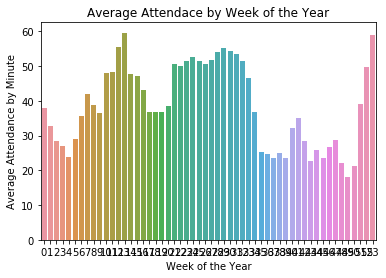

In [9]:
week_avg = meta_splash2.groupby("WEEKOFYEAR")["SPOSTMIN"].mean()
week_avg = week_avg.reset_index()
week_avg = pd.DataFrame(week_avg,columns=['WEEKOFYEAR','SPOSTMIN'])
ax = sns.barplot(x = "WEEKOFYEAR", y = "SPOSTMIN", data = week_avg)
ax.set_title("Average Attendace by Week of the Year")
ax.set(xlabel='Week of the Year', ylabel='Average Attendance by Minute')

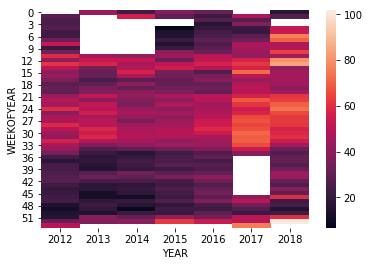

In [10]:
# Grouping by week and year

#aggregate by month
week_splash2 = meta_splash2.groupby(['WEEKOFYEAR', 'YEAR'])['SPOSTMIN'].mean().reset_index()

week_splash2 = week_splash2.pivot("WEEKOFYEAR", "YEAR", "SPOSTMIN").iloc[:,0:7]
ax = sns.heatmap(week_splash2)

#### Temperature vs Wait Time

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Temperature')]

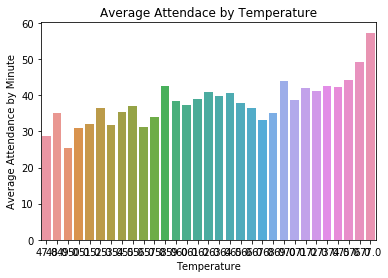

In [11]:
meta_splash2.WDWMINTEMP_mean = meta_splash2.WDWMINTEMP_mean.round()
avg_temp = meta_splash2.groupby("WDWMINTEMP_mean")["SPOSTMIN"].mean()
avg_temp = avg_temp.reset_index()
avg_temp = pd.DataFrame(avg_temp,columns=['WDWMINTEMP_mean','SPOSTMIN'])


ax = sns.barplot(x = "WDWMINTEMP_mean", y = "SPOSTMIN", data = avg_temp)
ax.set_title("Average Attendace by Temperature")
ax.set(xlabel='Temperature', ylabel='Average Attendance by Minute')

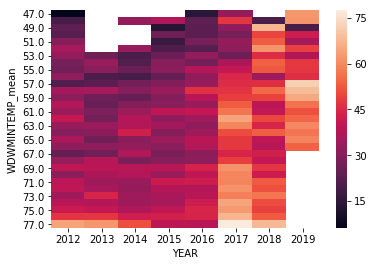

In [12]:
# Grouping by temperature and year

#aggregate by month
temp_splash2 = meta_splash2.groupby(['WDWMINTEMP_mean', 'YEAR'])['SPOSTMIN'].mean().reset_index()

temp_splash2 = temp_splash2.pivot("WDWMINTEMP_mean", "YEAR", "SPOSTMIN")
temp_splash2
ax = sns.heatmap(temp_splash2)

#### Park Hour vs Wait Time 

In [13]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 14.91666667]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 23.98333333]
park_hour_df.MKHOURS = park_hour_df.MKHOURS.round()
park_hour_df.MKHOURS.unique()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array([16., 15., 14., 13., 11., 12., 17., 10., 18., 24.,  9.,  8.])

[Text(0, 0.5, 'Average Attendance by Minute'), Text(0.5, 0, 'Park Hour')]

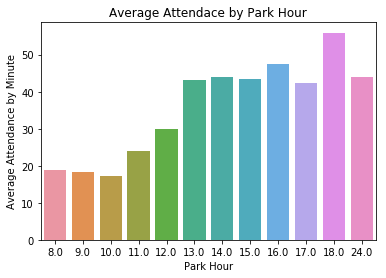

In [14]:
park_hour_df = meta_splash2[['SPOSTMIN','MKHOURS','MKOPEN','MKCLOSE','SEASON']]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 14.91666667]
#park_hour_df = park_hour_df[park_hour_df.MKHOURS != 23.98333333]
park_hour_df.MKHOURS = park_hour_df.MKHOURS.round()
park_hour_df.MKHOURS.unique()

park_hour_df = park_hour_df.groupby("MKHOURS")["SPOSTMIN"].mean()
park_hour_df = park_hour_df.reset_index()
park_hour_df.head(n=3)
#park_hour_df = pd.DataFrame(avg_temp,columns=['MKHOURS','SPOSTMIN','SEASON'])


ax = sns.barplot(x = "MKHOURS", y = "SPOSTMIN", data = park_hour_df)
ax.set_title("Average Attendace by Park Hour")
ax.set(xlabel='Park Hour', ylabel='Average Attendance by Minute')

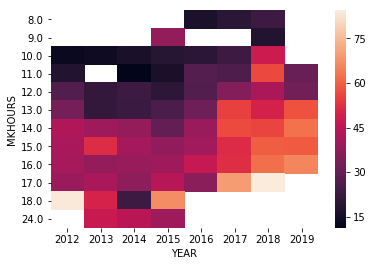

In [15]:
meta_splash3 = meta_splash2
meta_splash3.MKHOURS = meta_splash3.MKHOURS.round()
park_h_splash2 = meta_splash3.groupby(['MKHOURS', 'YEAR'])['SPOSTMIN'].mean().reset_index()

park_h_splash2 = park_h_splash2.pivot("MKHOURS", "YEAR", "SPOSTMIN")
ax = sns.heatmap(park_h_splash2)

#### Time Series 

In [16]:
avg = meta_splash2
avg.head(n=3)

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


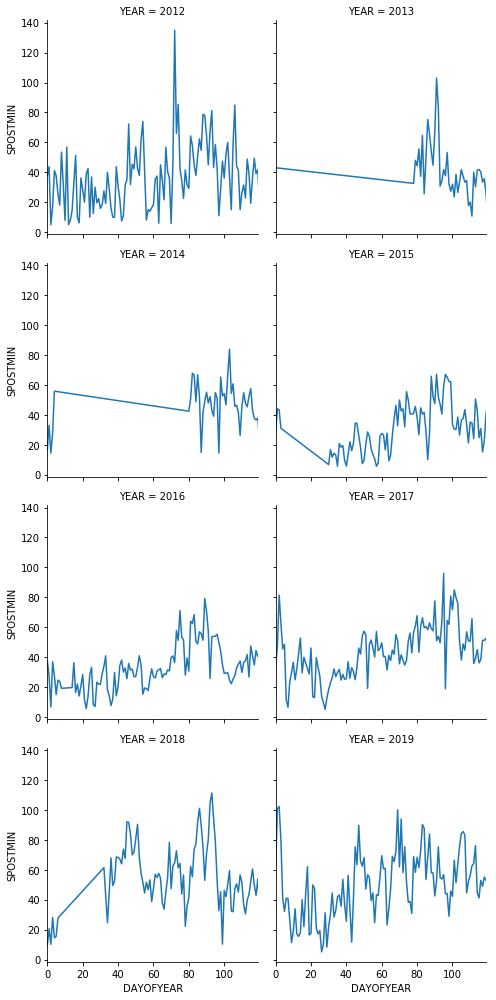

In [17]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)

ax = sns.FacetGrid(avg, col="YEAR",col_wrap=2, height=3.5)
ax = ax.map_dataframe(dateplot, "DAYOFYEAR", "SPOSTMIN")

# Random Forest 

Analyzing July

### Reducing Variables

In [35]:
# Select July Only
#july = meta_splash2[meta_splash2['MONTHOFYEAR'] == 7]

# How many Holidays in July?
#july['HOLIDAYN'].drop_duplicates()

## Finding Strongly Correlated Variables in July
splash_corr = meta_splash2.corr()['SPOSTMIN'][:-2] # -1 because the latest row is spostmin
golden_features_list = splash_corr[abs(splash_corr) > 0.20].sort_values(ascending=False)
print("There is {} strongly correlated values with SPOSTMIN:\n{}".format(len(golden_features_list), golden_features_list))

There is 42 strongly correlated values with SPOSTMIN:
SPOSTMIN              1.000000
AKHOURSYEST           0.532307
AKHOURS               0.531074
AKHOURSEMH            0.530836
AKHOURSTOM            0.526427
AKHOURSEMHYEST        0.520594
AKHOURSEMHTOM         0.506027
MKHOURS               0.419598
MKHOURSEMH            0.403368
HSHOURS               0.375347
HSHOURSTOM            0.364362
HSHOURSYEST           0.356237
WDWMAXTEMP            0.334935
EP09CAPACITY          0.323179
HSFIREWK              0.301307
YEAR                  0.297048
WDWMEANTEMP           0.284476
HSHOURSEMHYEST        0.278263
WEATHER_WDWPRECIP     0.271109
HSHOURSEMHTOM         0.270584
HSHOURSEMH            0.270417
AKEMHETOM             0.266406
AKEMHEVE              0.262796
AKEMHEYEST            0.260835
CapacityLost_HS       0.253429
CapacityLostWGT_HS    0.250829
WEATHER_WDWHIGH       0.250729
WDWMINTEMP            0.228848
CapacityLost_EP       0.219181
MKHOURSTOM            0.215867
HS20CAPACITY    

### Training and Testing Set 

In [36]:
from sklearn.model_selection import train_test_split

golden_list = golden_features_list.to_frame()
golden_list = golden_list.reset_index()
golden_list# = pd.DataFrame(golden_list,columns=['VARIABLES','SPOSTMIN'])
golden_list = golden_list.iloc[:,0]
golden_list = golden_list.tolist()
golden_list.remove('SPOSTMIN')

In [37]:
x = meta_splash2[golden_list]
y = meta_splash2['SPOSTMIN']

#75% training & 25% testing
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.25)

### Establishing a Baseline 

Before making prediction, we need to create a baseline, a sensible measurement that hopefully our model beats. If our model cannot beat this baseline value, then it's classified as a failure and we should try another model or change our machine learning method.

In [21]:
#x_train.dtypes

In [22]:
# Baseline Prediction
feature_list = list(meta_splash2.columns)
baseline_preds = y_train[:,feature_list.index('SPOSTMIN')]

#Baseline Error
baseline_errors = abs(baseline_preds - y_test)

print('Average baseline error: ', round(np.mean(baseline_errors),2))

ValueError: Can only tuple-index with a MultiIndex

### Train Model 

In [118]:
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
rf = RandomForestRegressor(n_estimators = 100)

#train the model using the traing set
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

### Evaluating Algorithm 

In [119]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 7.332352766008894
Mean Squared Error: 100.94043793540072
Root Mean Squared Error: 10.046911860636616


As n_estimator get to 90, the MSE decrease. But as it past 100, the MSE increases

### Make prediction on the Test set 

In [120]:
predictions = rf.predict(x_test)

#Calculate the absolute errors
errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 7.33 degrees.


In [121]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 75.47 %.


#### Visualization 

In [122]:
from sklearn.externals.six import StringIO
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file

#dot_data = StringIO()
dot_data = export_graphviz(tree, out_file = None,filled = True, rounded = True, precision = 1)

In [123]:
# Use dot file to create a graph
graph = pydotplus.graph_from_dot_file(dot_data)
# Write graph to a png file
Image(graph.create_png())

OSError: [Errno 36] File name too long: 'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="X[3] <= 12.2\\nmse = 358.2\\nsamples = 1137\\nvalue = 38.9", fillcolor="#e5813942"] ;\n1 [label="X[7] <= 12.5\\nmse = 279.2\\nsamples = 858\\nvalue = 33.9", fillcolor="#e5813939"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[35] <= 241.5\\nmse = 107.0\\nsamples = 217\\nvalue = 21.1", fillcolor="#e5813920"] ;\n1 -> 2 ;\n3 [label="X[11] <= 72.6\\nmse = 148.5\\nsamples = 54\\nvalue = 30.3", fillcolor="#e5813932"] ;\n2 -> 3 ;\n4 [label="X[36] <= 6.5\\nmse = 85.8\\nsamples = 20\\nvalue = 21.5", fillcolor="#e5813920"] ;\n3 -> 4 ;\n5 [label="X[15] <= 51.9\\nmse = 61.7\\nsamples = 18\\nvalue = 20.2", fillcolor="#e581391e"] ;\n4 -> 5 ;\n6 [label="X[33] <= 13.0\\nmse = 7.0\\nsamples = 3\\nvalue = 7.7", fillcolor="#e5813905"] ;\n5 -> 6 ;\n7 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.3", fillcolor="#e581390c"] ;\n6 -> 7 ;\n8 [label="X[35] <= 16.5\\nmse = 0.5\\nsamples = 2\\nvalue = 5.9", fillcolor="#e5813902"] ;\n6 -> 8 ;\n9 [label="mse = 0.0\\nsamples = 1\\nvalue = 6.6", fillcolor="#e5813903"] ;\n8 -> 9 ;\n10 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.2", fillcolor="#e5813900"] ;\n8 -> 10 ;\n11 [label="X[27] <= 332167.5\\nmse = 47.3\\nsamples = 15\\nvalue = 21.7", fillcolor="#e5813921"] ;\n5 -> 11 ;\n12 [label="X[5] <= 9.5\\nmse = 9.0\\nsamples = 4\\nvalue = 10.7", fillcolor="#e581390b"] ;\n11 -> 12 ;\n13 [label="X[17] <= 0.1\\nmse = 3.5\\nsamples = 2\\nvalue = 8.1", fillcolor="#e5813906"] ;\n12 -> 13 ;\n14 [label="mse = 0.0\\nsamples = 1\\nvalue = 10.0", fillcolor="#e581390a"] ;\n13 -> 14 ;\n15 [label="mse = 0.0\\nsamples = 1\\nvalue = 6.2", fillcolor="#e5813902"] ;\n13 -> 15 ;\n16 [label="X[34] <= 239426.5\\nmse = 0.8\\nsamples = 2\\nvalue = 13.4", fillcolor="#e5813910"] ;\n12 -> 16 ;\n17 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.5", fillcolor="#e581390f"] ;\n16 -> 17 ;\n18 [label="mse = -0.0\\nsamples = 1\\nvalue = 14.2", fillcolor="#e5813912"] ;\n16 -> 18 ;\n19 [label="X[34] <= 455455.0\\nmse = 27.5\\nsamples = 11\\nvalue = 23.8", fillcolor="#e5813925"] ;\n11 -> 19 ;\n20 [label="X[17] <= 0.1\\nmse = 3.5\\nsamples = 5\\nvalue = 27.5", fillcolor="#e581392c"] ;\n19 -> 20 ;\n21 [label="X[2] <= 9.8\\nmse = 0.3\\nsamples = 3\\nvalue = 28.5", fillcolor="#e581392e"] ;\n20 -> 21 ;\n22 [label="X[36] <= 3.5\\nmse = 0.0\\nsamples = 2\\nvalue = 28.3", fillcolor="#e581392e"] ;\n21 -> 22 ;\n23 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.4", fillcolor="#e581392e"] ;\n22 -> 23 ;\n24 [label="mse = -0.0\\nsamples = 1\\nvalue = 28.2", fillcolor="#e581392d"] ;\n22 -> 24 ;\n25 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.7", fillcolor="#e5813930"] ;\n21 -> 25 ;\n26 [label="X[28] <= 11.5\\nmse = 0.3\\nsamples = 2\\nvalue = 24.1", fillcolor="#e5813926"] ;\n20 -> 26 ;\n27 [label="mse = 0.0\\nsamples = 1\\nvalue = 23.6", fillcolor="#e5813924"] ;\n26 -> 27 ;\n28 [label="mse = -0.0\\nsamples = 1\\nvalue = 24.7", fillcolor="#e5813927"] ;\n26 -> 28 ;\n29 [label="X[32] <= 45066194.0\\nmse = 27.1\\nsamples = 6\\nvalue = 20.9", fillcolor="#e581391f"] ;\n19 -> 29 ;\n30 [label="X[4] <= 11.0\\nmse = 7.6\\nsamples = 2\\nvalue = 15.8", fillcolor="#e5813915"] ;\n29 -> 30 ;\n31 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.1", fillcolor="#e5813910"] ;\n30 -> 31 ;\n32 [label="mse = -0.0\\nsamples = 1\\nvalue = 18.6", fillcolor="#e581391b"] ;\n30 -> 32 ;\n33 [label="X[25] <= 71.0\\nmse = 17.3\\nsamples = 4\\nvalue = 23.5", fillcolor="#e5813924"] ;\n29 -> 33 ;\n34 [label="X[17] <= 0.1\\nmse = 4.2\\nsamples = 2\\nvalue = 20.0", fillcolor="#e581391d"] ;\n33 -> 34 ;\n35 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.0", fillcolor="#e5813921"] ;\n34 -> 35 ;\n36 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.0", fillcolor="#e5813919"] ;\n34 -> 36 ;\n37 [label="X[34] <= 464054.0\\nmse = 6.0\\nsamples = 2\\nvalue = 27.0", fillcolor="#e581392b"] ;\n33 -> 37 ;\n38 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.6", fillcolor="#e5813928"] ;\n37 -> 38 ;\n39 [label="mse = -0.0\\nsamples = 1\\nvalue = 31.2", fillcolor="#e5813933"] ;\n37 -> 39 ;\n40 [label="X[34] <= 464804.0\\nmse = 47.7\\nsamples = 2\\nvalue = 40.2", fillcolor="#e5813945"] ;\n4 -> 40 ;\n41 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.3", fillcolor="#e5813938"] ;\n40 -> 41 ;\n42 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.1", fillcolor="#e5813953"] ;\n40 -> 42 ;\n43 [label="X[16] <= 10.5\\nmse = 116.8\\nsamples = 34\\nvalue = 35.2", fillcolor="#e581393b"] ;\n3 -> 43 ;\n44 [label="X[11] <= 81.7\\nmse = 124.3\\nsamples = 4\\nvalue = 23.6", fillcolor="#e5813925"] ;\n43 -> 44 ;\n45 [label="X[17] <= 0.1\\nmse = 12.1\\nsamples = 3\\nvalue = 14.8", fillcolor="#e5813913"] ;\n44 -> 45 ;\n46 [label="X[19] <= 11.0\\nmse = 0.9\\nsamples = 2\\nvalue = 17.2", fillcolor="#e5813918"] ;\n45 -> 46 ;\n47 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.1", fillcolor="#e581391a"] ;\n46 -> 47 ;\n48 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.2", fillcolor="#e5813916"] ;\n46 -> 48 ;\n49 [label="mse = 0.0\\nsamples = 1\\nvalue = 10.0", fillcolor="#e581390a"] ;\n45 -> 49 ;\n50 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.9", fillcolor="#e581393f"] ;\n44 -> 50 ;\n51 [label="X[18] <= 12.2\\nmse = 101.0\\nsamples = 30\\nvalue = 36.3", fillcolor="#e581393d"] ;\n43 -> 51 ;\n52 [label="X[33] <= 13.5\\nmse = 105.8\\nsamples = 22\\nvalue = 39.4", fillcolor="#e5813943"] ;\n51 -> 52 ;\n53 [label="X[26] <= 52.9\\nmse = 81.5\\nsamples = 17\\nvalue = 42.2", fillcolor="#e5813949"] ;\n52 -> 53 ;\n54 [label="X[39] <= 0.5\\nmse = 69.8\\nsamples = 4\\nvalue = 53.2", fillcolor="#e581395e"] ;\n53 -> 54 ;\n55 [label="X[30] <= 24279774.0\\nmse = 19.8\\nsamples = 3\\nvalue = 49.5", fillcolor="#e5813957"] ;\n54 -> 55 ;\n56 [label="X[26] <= 51.1\\nmse = 1.1\\nsamples = 2\\nvalue = 52.0", fillcolor="#e581395c"] ;\n55 -> 56 ;\n57 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.2", fillcolor="#e581395b"] ;\n56 -> 57 ;\n58 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.5", fillcolor="#e581395f"] ;\n56 -> 58 ;\n59 [label="mse = -0.0\\nsamples = 1\\nvalue = 41.9", fillcolor="#e5813948"] ;\n55 -> 59 ;\n60 [label="mse = -0.0\\nsamples = 1\\nvalue = 67.8", fillcolor="#e581397b"] ;\n54 -> 60 ;\n61 [label="X[17] <= 0.0\\nmse = 48.9\\nsamples = 13\\nvalue = 39.6", fillcolor="#e5813944"] ;\n53 -> 61 ;\n62 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.7", fillcolor="#e5813927"] ;\n61 -> 62 ;\n63 [label="X[28] <= 13.5\\nmse = 28.4\\nsamples = 12\\nvalue = 41.1", fillcolor="#e5813947"] ;\n61 -> 63 ;\n64 [label="X[34] <= 469053.5\\nmse = 15.7\\nsamples = 11\\nvalue = 42.4", fillcolor="#e5813949"] ;\n63 -> 64 ;\n65 [label="X[34] <= 435457.0\\nmse = 3.7\\nsamples = 9\\nvalue = 41.4", fillcolor="#e5813947"] ;\n64 -> 65 ;\n66 [label="X[2] <= 11.5\\nmse = 0.3\\nsamples = 2\\nvalue = 44.3", fillcolor="#e581394d"] ;\n65 -> 66 ;\n67 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.8", fillcolor="#e581394c"] ;\n66 -> 67 ;\n68 [label="mse = -0.0\\nsamples = 1\\nvalue = 44.8", fillcolor="#e581394e"] ;\n66 -> 68 ;\n69 [label="X[4] <= 11.2\\nmse = 0.8\\nsamples = 7\\nvalue = 40.3", fillcolor="#e5813945"] ;\n65 -> 69 ;\n70 [label="X[35] <= 65.5\\nmse = 0.2\\nsamples = 4\\nvalue = 41.2", fillcolor="#e5813947"] ;\n69 -> 70 ;\n71 [label="X[38] <= 0.5\\nmse = 0.0\\nsamples = 3\\nvalue = 41.0", fillcolor="#e5813947"] ;\n70 -> 71 ;\n72 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.3", fillcolor="#e5813947"] ;\n71 -> 72 ;\n73 [label="X[33] <= 11.5\\nmse = 0.0\\nsamples = 2\\nvalue = 40.9", fillcolor="#e5813946"] ;\n71 -> 73 ;\n74 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.8", fillcolor="#e5813946"] ;\n73 -> 74 ;\n75 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.0", fillcolor="#e5813947"] ;\n73 -> 75 ;\n76 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.0", fillcolor="#e5813949"] ;\n70 -> 76 ;\n77 [label="X[29] <= 1250.0\\nmse = 0.2\\nsamples = 3\\nvalue = 39.6", fillcolor="#e5813944"] ;\n69 -> 77 ;\n78 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.7", fillcolor="#e5813942"] ;\n77 -> 78 ;\n79 [label="X[36] <= 3.5\\nmse = 0.0\\nsamples = 2\\nvalue = 39.8", fillcolor="#e5813944"] ;\n77 -> 79 ;\n80 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.9", fillcolor="#e5813945"] ;\n79 -> 80 ;\n81 [label="mse = -0.0\\nsamples = 1\\nvalue = 39.7", fillcolor="#e5813944"] ;\n79 -> 81 ;\n82 [label="X[28] <= 11.5\\nmse = 34.2\\nsamples = 2\\nvalue = 50.4", fillcolor="#e5813959"] ;\n64 -> 82 ;\n83 [label="mse = 0.0\\nsamples = 1\\nvalue = 56.2", fillcolor="#e5813964"] ;\n82 -> 83 ;\n84 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.5", fillcolor="#e581394e"] ;\n82 -> 84 ;\n85 [label="mse = -0.0\\nsamples = 1\\nvalue = 30.1", fillcolor="#e5813931"] ;\n63 -> 85 ;\n86 [label="X[17] <= 0.1\\nmse = 74.1\\nsamples = 5\\nvalue = 30.2", fillcolor="#e5813931"] ;\n52 -> 86 ;\n87 [label="X[31] <= 57.0\\nmse = 30.8\\nsamples = 3\\nvalue = 34.3", fillcolor="#e5813939"] ;\n86 -> 87 ;\n88 [label="X[0] <= 10.0\\nmse = 10.6\\nsamples = 2\\nvalue = 29.2", fillcolor="#e5813930"] ;\n87 -> 88 ;\n89 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.5", fillcolor="#e5813934"] ;\n88 -> 89 ;\n90 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.6", fillcolor="#e5813927"] ;\n88 -> 90 ;\n91 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.3", fillcolor="#e5813943"] ;\n87 -> 91 ;\n92 [label="X[13] <= 0.5\\nmse = 0.4\\nsamples = 2\\nvalue = 17.8", fillcolor="#e5813919"] ;\n86 -> 92 ;\n93 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.5", fillcolor="#e581391a"] ;\n92 -> 93 ;\n94 [label="mse = -0.0\\nsamples = 1\\nvalue = 17.1", fillcolor="#e5813918"] ;\n92 -> 94 ;\n95 [label="X[28] <= 12.5\\nmse = 22.9\\nsamples = 8\\nvalue = 29.5", fillcolor="#e5813930"] ;\n51 -> 95 ;\n96 [label="X[8] <= 12.8\\nmse = 4.3\\nsamples = 5\\nvalue = 32.8", fillcolor="#e5813937"] ;\n95 -> 96 ;\n97 [label="X[34] <= 240151.5\\nmse = 1.5\\nsamples = 4\\nvalue = 32.2", fillcolor="#e5813935"] ;\n96 -> 97 ;\n98 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.8", fillcolor="#e5813938"] ;\n97 -> 98 ;\n99 [label="X[6] <= 11.5\\nmse = 0.1\\nsamples = 3\\nvalue = 31.3", fillcolor="#e5813934"] ;\n97 -> 99 ;\n100 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.6", fillcolor="#e5813932"] ;\n99 -> 100 ;\n101 [label="X[18] <= 12.8\\nmse = 0.0\\nsamples = 2\\nvalue = 31.5", fillcolor="#e5813934"] ;\n99 -> 101 ;\n102 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.5", fillcolor="#e5813934"] ;\n101 -> 102 ;\n103 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.4", fillcolor="#e5813934"] ;\n101 -> 103 ;\n104 [label="mse = -0.0\\nsamples = 1\\nvalue = 37.7", fillcolor="#e5813940"] ;\n96 -> 104 ;\n105 [label="X[32] <= 28734328.5\\nmse = 9.6\\nsamples = 3\\nvalue = 24.5", fillcolor="#e5813926"] ;\n95 -> 105 ;\n106 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.7", fillcolor="#e5813919"] ;\n105 -> 106 ;\n107 [label="X[36] <= 5.5\\nmse = 0.3\\nsamples = 2\\nvalue = 25.9", fillcolor="#e5813929"] ;\n105 -> 107 ;\n108 [label="mse = -0.0\\nsamples = 1\\nvalue = 26.4", fillcolor="#e581392a"] ;\n107 -> 108 ;\n109 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.2", fillcolor="#e5813928"] ;\n107 -> 109 ;\n110 [label="X[23] <= 226928.0\\nmse = 56.9\\nsamples = 163\\nvalue = 18.1", fillcolor="#e581391a"] ;\n2 -> 110 ;\n111 [label="X[11] <= 79.5\\nmse = 36.0\\nsamples = 86\\nvalue = 14.8", fillcolor="#e5813913"] ;\n110 -> 111 ;\n112 [label="X[28] <= 14.5\\nmse = 23.5\\nsamples = 30\\nvalue = 11.5", fillcolor="#e581390d"] ;\n111 -> 112 ;\n113 [label="X[11] <= 73.8\\nmse = 5.0\\nsamples = 16\\nvalue = 8.7", fillcolor="#e5813907"] ;\n112 -> 113 ;\n114 [label="X[25] <= 77.8\\nmse = 2.3\\nsamples = 6\\nvalue = 6.8", fillcolor="#e5813904"] ;\n113 -> 114 ;\n115 [label="X[31] <= 55.0\\nmse = 0.1\\nsamples = 3\\nvalue = 5.8", fillcolor="#e5813901"] ;\n114 -> 115 ;\n116 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.2", fillcolor="#e5813900"] ;\n115 -> 116 ;\n117 [label="X[9] <= 11.5\\nmse = 0.0\\nsamples = 2\\nvalue = 6.0", fillcolor="#e5813902"] ;\n115 -> 117 ;\n118 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.9", fillcolor="#e5813902"] ;\n117 -> 118 ;\n119 [label="mse = 0.0\\nsamples = 1\\nvalue = 6.1", fillcolor="#e5813902"] ;\n117 -> 119 ;\n120 [label="X[14] <= 2012.5\\nmse = 0.5\\nsamples = 3\\nvalue = 8.7", fillcolor="#e5813907"] ;\n114 -> 120 ;\n121 [label="X[7] <= 10.5\\nmse = 0.0\\nsamples = 2\\nvalue = 9.4", fillcolor="#e5813909"] ;\n120 -> 121 ;\n122 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.4", fillcolor="#e5813909"] ;\n121 -> 122 ;\n123 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.4", fillcolor="#e5813909"] ;\n121 -> 123 ;\n124 [label="mse = 0.0\\nsamples = 1\\nvalue = 8.1", fillcolor="#e5813906"] ;\n120 -> 124 ;\n125 [label="X[27] <= 199180.5\\nmse = 3.4\\nsamples = 10\\nvalue = 9.8", fillcolor="#e5813909"] ;\n113 -> 125 ;\n126 [label="X[31] <= 59.5\\nmse = 1.9\\nsamples = 9\\nvalue = 9.5", fillcolor="#e5813909"] ;\n125 -> 126 ;\n127 [label="X[7] <= 10.5\\nmse = 0.7\\nsamples = 8\\nvalue = 9.9", fillcolor="#e581390a"] ;\n126 -> 127 ;\n128 [label="X[25] <= 75.1\\nmse = 0.2\\nsamples = 3\\nvalue = 10.9", fillcolor="#e581390c"] ;\n127 -> 128 ;\n129 [label="X[25] <= 74.3\\nmse = 0.0\\nsamples = 2\\nvalue = 10.6", fillcolor="#e581390b"] ;\n128 -> 129 ;\n130 [label="mse = 0.0\\nsamples = 1\\nvalue = 10.5", fillcolor="#e581390b"] ;\n129 -> 130 ;\n131 [label="mse = 0.0\\nsamples = 1\\nvalue = 10.8", fillcolor="#e581390b"] ;\n129 -> 131 ;\n132 [label="mse = -0.0\\nsamples = 1\\nvalue = 11.4", fillcolor="#e581390d"] ;\n128 -> 132 ;\n133 [label="X[3] <= 9.5\\nmse = 0.2\\nsamples = 5\\nvalue = 9.3", fillcolor="#e5813908"] ;\n127 -> 133 ;\n134 [label="X[15] <= 73.3\\nmse = 0.1\\nsamples = 4\\nvalue = 9.2", fillcolor="#e5813908"] ;\n133 -> 134 ;\n135 [label="X[26] <= 57.8\\nmse = 0.0\\nsamples = 3\\nvalue = 9.3", fillcolor="#e5813908"] ;\n134 -> 135 ;\n136 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.2", fillcolor="#e5813908"] ;\n135 -> 136 ;\n137 [label="X[36] <= 47.5\\nmse = 0.0\\nsamples = 2\\nvalue = 9.3", fillcolor="#e5813908"] ;\n135 -> 137 ;\n138 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.4", fillcolor="#e5813909"] ;\n137 -> 138 ;\n139 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.3", fillcolor="#e5813908"] ;\n137 -> 139 ;\n140 [label="mse = 0.0\\nsamples = 1\\nvalue = 8.4", fillcolor="#e5813907"] ;\n134 -> 140 ;\n141 [label="mse = -0.0\\nsamples = 1\\nvalue = 10.2", fillcolor="#e581390a"] ;\n133 -> 141 ;\n142 [label="mse = 0.0\\nsamples = 1\\nvalue = 6.4", fillcolor="#e5813903"] ;\n126 -> 142 ;\n143 [label="mse = -0.0\\nsamples = 1\\nvalue = 15.2", fillcolor="#e5813914"] ;\n125 -> 143 ;\n144 [label="X[26] <= 48.9\\nmse = 21.3\\nsamples = 14\\nvalue = 15.9", fillcolor="#e5813915"] ;\n112 -> 144 ;\n145 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.1", fillcolor="#e5813933"] ;\n144 -> 145 ;\n146 [label="X[25] <= 73.5\\nmse = 8.9\\nsamples = 13\\nvalue = 15.0", fillcolor="#e5813914"] ;\n144 -> 146 ;\n147 [label="X[35] <= 351.5\\nmse = 12.8\\nsamples = 5\\nvalue = 12.6", fillcolor="#e581390f"] ;\n146 -> 147 ;\n148 [label="X[15] <= 60.7\\nmse = 1.8\\nsamples = 4\\nvalue = 11.1", fillcolor="#e581390c"] ;\n147 -> 148 ;\n149 [label="mse = 0.0\\nsamples = 1\\nvalue = 8.9", fillcolor="#e5813908"] ;\n148 -> 149 ;\n150 [label="X[25] <= 71.9\\nmse = 0.7\\nsamples = 3\\nvalue = 11.7", fillcolor="#e581390d"] ;\n148 -> 150 ;\n151 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.5", fillcolor="#e581390f"] ;\n150 -> 151 ;\n152 [label="X[9] <= 11.5\\nmse = 0.0\\nsamples = 2\\nvalue = 10.9", fillcolor="#e581390c"] ;\n150 -> 152 ;\n153 [label="mse = 0.0\\nsamples = 1\\nvalue = 10.7", fillcolor="#e581390b"] ;\n152 -> 153 ;\n154 [label="mse = -0.0\\nsamples = 1\\nvalue = 11.0", fillcolor="#e581390c"] ;\n152 -> 154 ;\n155 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.1", fillcolor="#e581391e"] ;\n147 -> 155 ;\n156 [label="X[35] <= 309.5\\nmse = 2.7\\nsamples = 8\\nvalue = 16.2", fillcolor="#e5813916"] ;\n146 -> 156 ;\n157 [label="X[31] <= 62.5\\nmse = 0.1\\nsamples = 2\\nvalue = 19.5", fillcolor="#e581391c"] ;\n156 -> 157 ;\n158 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.8", fillcolor="#e581391d"] ;\n157 -> 158 ;\n159 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.1", fillcolor="#e581391c"] ;\n157 -> 159 ;\n160 [label="X[11] <= 75.5\\nmse = 0.7\\nsamples = 6\\nvalue = 15.6", fillcolor="#e5813915"] ;\n156 -> 160 ;\n161 [label="X[14] <= 2014.5\\nmse = 0.3\\nsamples = 4\\nvalue = 15.0", fillcolor="#e5813914"] ;\n160 -> 161 ;\n162 [label="X[32] <= 23771898.5\\nmse = 0.1\\nsamples = 3\\nvalue = 15.2", fillcolor="#e5813914"] ;\n161 -> 162 ;\n163 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.6", fillcolor="#e5813915"] ;\n162 -> 163 ;\n164 [label="X[36] <= 45.5\\nmse = 0.0\\nsamples = 2\\nvalue = 15.0", fillcolor="#e5813914"] ;\n162 -> 164 ;\n165 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.1", fillcolor="#e5813914"] ;\n164 -> 165 ;\n166 [label="mse = -0.0\\nsamples = 1\\nvalue = 14.9", fillcolor="#e5813913"] ;\n164 -> 166 ;\n167 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.9", fillcolor="#e5813911"] ;\n161 -> 167 ;\n168 [label="X[15] <= 67.1\\nmse = 0.0\\nsamples = 2\\nvalue = 16.4", fillcolor="#e5813916"] ;\n160 -> 168 ;\n169 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.5", fillcolor="#e5813917"] ;\n168 -> 169 ;\n170 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.2", fillcolor="#e5813916"] ;\n168 -> 170 ;\n171 [label="X[8] <= 9.5\\nmse = 33.1\\nsamples = 56\\nvalue = 16.8", fillcolor="#e5813917"] ;\n111 -> 171 ;\n172 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.1", fillcolor="#e5813931"] ;\n171 -> 172 ;\n173 [label="X[23] <= 97190.5\\nmse = 29.5\\nsamples = 55\\nvalue = 16.4", fillcolor="#e5813916"] ;\n171 -> 173 ;\n174 [label="X[1] <= 9.5\\nmse = 1.0\\nsamples = 2\\nvalue = 8.3", fillcolor="#e5813907"] ;\n173 -> 174 ;\n175 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.3", fillcolor="#e5813908"] ;\n174 -> 175 ;\n176 [label="mse = 0.0\\nsamples = 1\\nvalue = 7.3", fillcolor="#e5813905"] ;\n174 -> 176 ;\n177 [label="X[19] <= 12.5\\nmse = 27.5\\nsamples = 53\\nvalue = 16.8", fillcolor="#e5813917"] ;\n173 -> 177 ;\n178 [label="X[11] <= 80.7\\nmse = 21.7\\nsamples = 35\\nvalue = 15.8", fillcolor="#e5813915"] ;\n177 -> 178 ;\n179 [label="X[2] <= 8.5\\nmse = 0.4\\nsamples = 3\\nvalue = 9.8", fillcolor="#e5813909"] ;\n178 -> 179 ;\n180 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.1", fillcolor="#e5813908"] ;\n179 -> 180 ;\n181 [label="X[2] <= 9.5\\nmse = 0.0\\nsamples = 2\\nvalue = 10.4", fillcolor="#e581390b"] ;\n179 -> 181 ;\n182 [label="mse = 0.0\\nsamples = 1\\nvalue = 10.6", fillcolor="#e581390b"] ;\n181 -> 182 ;\n183 [label="mse = -0.0\\nsamples = 1\\nvalue = 10.3", fillcolor="#e581390a"] ;\n181 -> 183 ;\n184 [label="X[3] <= 9.5\\nmse = 20.4\\nsamples = 32\\nvalue = 16.2", fillcolor="#e5813916"] ;\n178 -> 184 ;\n185 [label="X[11] <= 80.8\\nmse = 15.8\\nsamples = 22\\nvalue = 14.8", fillcolor="#e5813913"] ;\n184 -> 185 ;\n186 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.2", fillcolor="#e581392e"] ;\n185 -> 186 ;\n187 [label="X[33] <= 12.5\\nmse = 11.0\\nsamples = 21\\nvalue = 14.4", fillcolor="#e5813912"] ;\n185 -> 187 ;\n188 [label="X[33] <= 10.5\\nmse = 11.8\\nsamples = 8\\nvalue = 11.9", fillcolor="#e581390d"] ;\n187 -> 188 ;\n189 [label="X[23] <= 164184.0\\nmse = 2.6\\nsamples = 2\\nvalue = 18.0", fillcolor="#e581391a"] ;\n188 -> 189 ;\n190 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.6", fillcolor="#e581391d"] ;\n189 -> 190 ;\n191 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.4", fillcolor="#e5813916"] ;\n189 -> 191 ;\n192 [label="X[24] <= 20809621.0\\nmse = 3.6\\nsamples = 6\\nvalue = 10.5", fillcolor="#e581390b"] ;\n188 -> 192 ;\n193 [label="X[15] <= 74.2\\nmse = 1.9\\nsamples = 5\\nvalue = 9.7", fillcolor="#e5813909"] ;\n192 -> 193 ;\n194 [label="mse = 0.0\\nsamples = 1\\nvalue = 6.8", fillcolor="#e5813904"] ;\n193 -> 194 ;\n195 [label="X[11] <= 86.1\\nmse = 0.6\\nsamples = 4\\nvalue = 10.2", fillcolor="#e581390a"] ;\n193 -> 195 ;\n196 [label="X[33] <= 11.5\\nmse = 0.1\\nsamples = 2\\nvalue = 9.7", fillcolor="#e5813909"] ;\n195 -> 196 ;\n197 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.4", fillcolor="#e5813909"] ;\n196 -> 197 ;\n198 [label="mse = -0.0\\nsamples = 1\\nvalue = 10.1", fillcolor="#e581390a"] ;\n196 -> 198 ;\n199 [label="X[8] <= 11.5\\nmse = 0.0\\nsamples = 2\\nvalue = 11.3", fillcolor="#e581390c"] ;\n195 -> 199 ;\n200 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.2", fillcolor="#e581390c"] ;\n199 -> 200 ;\n201 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.3", fillcolor="#e581390c"] ;\n199 -> 201 ;\n202 [label="mse = -0.0\\nsamples = 1\\nvalue = 13.2", fillcolor="#e5813910"] ;\n192 -> 202 ;\n203 [label="X[36] <= 37.5\\nmse = 6.2\\nsamples = 13\\nvalue = 15.6", fillcolor="#e5813915"] ;\n187 -> 203 ;\n204 [label="X[10] <= 10.8\\nmse = 4.4\\nsamples = 3\\nvalue = 12.2", fillcolor="#e581390e"] ;\n203 -> 204 ;\n205 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.5", fillcolor="#e5813915"] ;\n204 -> 205 ;\n206 [label="X[14] <= 2012.5\\nmse = 1.1\\nsamples = 2\\nvalue = 11.1", fillcolor="#e581390c"] ;\n204 -> 206 ;\n207 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.6", fillcolor="#e5813909"] ;\n206 -> 207 ;\n208 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.8", fillcolor="#e581390d"] ;\n206 -> 208 ;\n209 [label="X[40] <= 1.5\\nmse = 3.8\\nsamples = 10\\nvalue = 16.3", fillcolor="#e5813916"] ;\n203 -> 209 ;\n210 [label="X[11] <= 83.5\\nmse = 2.5\\nsamples = 8\\nvalue = 17.0", fillcolor="#e5813917"] ;\n209 -> 210 ;\n211 [label="X[4] <= 10.0\\nmse = 0.0\\nsamples = 2\\nvalue = 14.9", fillcolor="#e5813913"] ;\n210 -> 211 ;\n212 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.6", fillcolor="#e5813913"] ;\n211 -> 212 ;\n213 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.0", fillcolor="#e5813914"] ;\n211 -> 213 ;\n214 [label="X[17] <= 0.2\\nmse = 1.5\\nsamples = 6\\nvalue = 17.6", fillcolor="#e5813919"] ;\n210 -> 214 ;\n215 [label="X[33] <= 13.5\\nmse = 0.3\\nsamples = 4\\nvalue = 18.1", fillcolor="#e581391a"] ;\n214 -> 215 ;\n216 [label="X[35] <= 276.5\\nmse = 0.1\\nsamples = 2\\nvalue = 17.7", fillcolor="#e5813919"] ;\n215 -> 216 ;\n217 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.4", fillcolor="#e5813918"] ;\n216 -> 217 ;\n218 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.9", fillcolor="#e5813919"] ;\n216 -> 218 ;\n219 [label="X[31] <= 68.0\\nmse = 0.2\\nsamples = 2\\nvalue = 18.7", fillcolor="#e581391b"] ;\n215 -> 219 ;\n220 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.4", fillcolor="#e581391c"] ;\n219 -> 220 ;\n221 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.4", fillcolor="#e581391a"] ;\n219 -> 221 ;\n222 [label="X[16] <= 11.8\\nmse = 0.1\\nsamples = 2\\nvalue = 15.2", fillcolor="#e5813914"] ;\n214 -> 222 ;\n223 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.8", fillcolor="#e5813913"] ;\n222 -> 223 ;\n224 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.5", fillcolor="#e5813915"] ;\n222 -> 224 ;\n225 [label="X[14] <= 2014.5\\nmse = 0.1\\nsamples = 2\\nvalue = 13.6", fillcolor="#e5813911"] ;\n209 -> 225 ;\n226 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.1", fillcolor="#e5813912"] ;\n225 -> 226 ;\n227 [label="mse = -0.0\\nsamples = 1\\nvalue = 13.5", fillcolor="#e5813911"] ;\n225 -> 227 ;\n228 [label="X[33] <= 13.5\\nmse = 18.0\\nsamples = 10\\nvalue = 19.0", fillcolor="#e581391b"] ;\n184 -> 228 ;\n229 [label="X[18] <= 13.2\\nmse = 15.8\\nsamples = 9\\nvalue = 18.0", fillcolor="#e581391a"] ;\n228 -> 229 ;\n230 [label="X[6] <= 10.5\\nmse = 12.0\\nsamples = 8\\nvalue = 17.5", fillcolor="#e5813918"] ;\n229 -> 230 ;\n231 [label="X[19] <= 10.8\\nmse = 4.0\\nsamples = 7\\nvalue = 18.3", fillcolor="#e581391a"] ;\n230 -> 231 ;\n232 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.3", fillcolor="#e581390e"] ;\n231 -> 232 ;\n233 [label="X[35] <= 338.5\\nmse = 1.2\\nsamples = 6\\nvalue = 18.7", fillcolor="#e581391b"] ;\n231 -> 233 ;\n234 [label="X[36] <= 39.5\\nmse = 0.4\\nsamples = 5\\nvalue = 18.3", fillcolor="#e581391a"] ;\n233 -> 234 ;\n235 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.5", fillcolor="#e5813917"] ;\n234 -> 235 ;\n236 [label="X[35] <= 314.5\\nmse = 0.0\\nsamples = 4\\nvalue = 18.5", fillcolor="#e581391b"] ;\n234 -> 236 ;\n237 [label="X[28] <= 10.5\\nmse = 0.0\\nsamples = 3\\nvalue = 18.6", fillcolor="#e581391b"] ;\n236 -> 237 ;\n238 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.7", fillcolor="#e581391b"] ;\n237 -> 238 ;\n239 [label="X[19] <= 11.5\\nmse = 0.0\\nsamples = 2\\nvalue = 18.6", fillcolor="#e581391b"] ;\n237 -> 239 ;\n240 [label="mse = -0.0\\nsamples = 1\\nvalue = 18.6", fillcolor="#e581391b"] ;\n239 -> 240 ;\n241 [label="mse = -0.0\\nsamples = 1\\nvalue = 18.6", fillcolor="#e581391b"] ;\n239 -> 241 ;\n242 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.4", fillcolor="#e581391a"] ;\n236 -> 242 ;\n243 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.8", fillcolor="#e581391f"] ;\n233 -> 243 ;\n244 [label="mse = -0.0\\nsamples = 1\\nvalue = 7.1", fillcolor="#e5813904"] ;\n230 -> 244 ;\n245 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.0", fillcolor="#e5813929"] ;\n229 -> 245 ;\n246 [label="mse = -0.0\\nsamples = 1\\nvalue = 23.9", fillcolor="#e5813925"] ;\n228 -> 246 ;\n247 [label="X[5] <= 8.5\\nmse = 31.7\\nsamples = 18\\nvalue = 19.7", fillcolor="#e581391d"] ;\n177 -> 247 ;\n248 [label="X[34] <= 132687.0\\nmse = 0.5\\nsamples = 3\\nvalue = 30.8", fillcolor="#e5813933"] ;\n247 -> 248 ;\n249 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.8", fillcolor="#e5813935"] ;\n248 -> 249 ;\n250 [label="X[30] <= 22791923.0\\nmse = 0.1\\nsamples = 2\\nvalue = 30.3", fillcolor="#e5813932"] ;\n248 -> 250 ;\n251 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.1", fillcolor="#e5813931"] ;\n250 -> 251 ;\n252 [label="mse = -0.0\\nsamples = 1\\nvalue = 30.6", fillcolor="#e5813932"] ;\n250 -> 252 ;\n253 [label="X[3] <= 9.2\\nmse = 13.9\\nsamples = 15\\nvalue = 17.9", fillcolor="#e5813919"] ;\n247 -> 253 ;\n254 [label="X[9] <= 11.2\\nmse = 9.0\\nsamples = 10\\nvalue = 15.7", fillcolor="#e5813915"] ;\n253 -> 254 ;\n255 [label="X[2] <= 8.5\\nmse = 5.0\\nsamples = 8\\nvalue = 14.7", fillcolor="#e5813913"] ;\n254 -> 255 ;\n256 [label="X[27] <= 234977.0\\nmse = 0.4\\nsamples = 2\\nvalue = 17.0", fillcolor="#e5813917"] ;\n255 -> 256 ;\n257 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.0", fillcolor="#e5813916"] ;\n256 -> 257 ;\n258 [label="mse = -0.0\\nsamples = 1\\nvalue = 17.4", fillcolor="#e5813918"] ;\n256 -> 258 ;\n259 [label="X[30] <= 18325169.0\\nmse = 3.3\\nsamples = 6\\nvalue = 13.5", fillcolor="#e5813911"] ;\n255 -> 259 ;\n260 [label="X[26] <= 72.7\\nmse = 1.3\\nsamples = 2\\nvalue = 15.7", fillcolor="#e5813915"] ;\n259 -> 260 ;\n261 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.6", fillcolor="#e5813913"] ;\n260 -> 261 ;\n262 [label="mse = -0.0\\nsamples = 1\\nvalue = 16.9", fillcolor="#e5813917"] ;\n260 -> 262 ;\n263 [label="X[6] <= 10.5\\nmse = 0.5\\nsamples = 4\\nvalue = 12.4", fillcolor="#e581390e"] ;\n259 -> 263 ;\n264 [label="X[23] <= 167833.5\\nmse = 0.2\\nsamples = 3\\nvalue = 12.0", fillcolor="#e581390e"] ;\n263 -> 264 ;\n265 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.4", fillcolor="#e581390e"] ;\n264 -> 265 ;\n266 [label="X[35] <= 259.5\\nmse = 0.2\\nsamples = 2\\nvalue = 11.8", fillcolor="#e581390d"] ;\n264 -> 266 ;\n267 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.2", fillcolor="#e581390e"] ;\n266 -> 267 ;\n268 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.4", fillcolor="#e581390d"] ;\n266 -> 268 ;\n269 [label="mse = -0.0\\nsamples = 1\\nvalue = 13.5", fillcolor="#e5813911"] ;\n263 -> 269 ;\n270 [label="X[8] <= 11.8\\nmse = 0.1\\nsamples = 2\\nvalue = 20.4", fillcolor="#e581391e"] ;\n254 -> 270 ;\n271 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.2", fillcolor="#e581391e"] ;\n270 -> 271 ;\n272 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.6", fillcolor="#e581391f"] ;\n270 -> 272 ;\n273 [label="X[16] <= 11.5\\nmse = 4.5\\nsamples = 5\\nvalue = 21.0", fillcolor="#e581391f"] ;\n253 -> 273 ;\n274 [label="X[23] <= 173133.0\\nmse = 0.2\\nsamples = 2\\nvalue = 23.5", fillcolor="#e5813924"] ;\n273 -> 274 ;\n275 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.9", fillcolor="#e5813923"] ;\n274 -> 275 ;\n276 [label="mse = -0.0\\nsamples = 1\\nvalue = 23.9", fillcolor="#e5813925"] ;\n274 -> 276 ;\n277 [label="X[35] <= 286.0\\nmse = 0.9\\nsamples = 3\\nvalue = 19.4", fillcolor="#e581391c"] ;\n273 -> 277 ;\n278 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.3", fillcolor="#e581391a"] ;\n277 -> 278 ;\n279 [label="X[14] <= 2014.5\\nmse = 0.0\\nsamples = 2\\nvalue = 20.2", fillcolor="#e581391e"] ;\n277 -> 279 ;\n280 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.3", fillcolor="#e581391e"] ;\n279 -> 280 ;\n281 [label="mse = -0.0\\nsamples = 1\\nvalue = 20.2", fillcolor="#e581391e"] ;\n279 -> 281 ;\n282 [label="X[11] <= 75.2\\nmse = 56.0\\nsamples = 77\\nvalue = 21.6", fillcolor="#e5813921"] ;\n110 -> 282 ;\n283 [label="X[11] <= 67.5\\nmse = 13.2\\nsamples = 11\\nvalue = 11.8", fillcolor="#e581390d"] ;\n282 -> 283 ;\n284 [label="X[36] <= 48.5\\nmse = 4.0\\nsamples = 3\\nvalue = 8.2", fillcolor="#e5813906"] ;\n283 -> 284 ;\n285 [label="X[26] <= 47.0\\nmse = 0.6\\nsamples = 2\\nvalue = 9.4", fillcolor="#e5813909"] ;\n284 -> 285 ;\n286 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.8", fillcolor="#e5813909"] ;\n285 -> 286 ;\n287 [label="mse = -0.0\\nsamples = 1\\nvalue = 7.9", fillcolor="#e5813906"] ;\n285 -> 287 ;\n288 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.2", fillcolor="#e5813900"] ;\n284 -> 288 ;\n289 [label="X[36] <= 49.5\\nmse = 4.2\\nsamples = 8\\nvalue = 14.4", fillcolor="#e5813912"] ;\n283 -> 289 ;\n290 [label="X[34] <= 424708.0\\nmse = 2.7\\nsamples = 5\\nvalue = 13.1", fillcolor="#e5813910"] ;\n289 -> 290 ;\n291 [label="X[11] <= 72.9\\nmse = 0.6\\nsamples = 2\\nvalue = 15.2", fillcolor="#e5813914"] ;\n290 -> 291 ;\n292 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.4", fillcolor="#e5813912"] ;\n291 -> 292 ;\n293 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.0", fillcolor="#e5813916"] ;\n291 -> 293 ;\n294 [label="X[4] <= 11.5\\nmse = 0.4\\nsamples = 3\\nvalue = 12.1", fillcolor="#e581390e"] ;\n290 -> 294 ;\n295 [label="X[8] <= 10.5\\nmse = 0.1\\nsamples = 2\\nvalue = 11.5", fillcolor="#e581390d"] ;\n294 -> 295 ;\n296 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.2", fillcolor="#e581390c"] ;\n295 -> 296 ;\n297 [label="mse = -0.0\\nsamples = 1\\nvalue = 11.7", fillcolor="#e581390d"] ;\n295 -> 297 ;\n298 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.7", fillcolor="#e581390f"] ;\n294 -> 298 ;\n299 [label="X[23] <= 306870.5\\nmse = 0.6\\nsamples = 3\\nvalue = 16.2", fillcolor="#e5813916"] ;\n289 -> 299 ;\n300 [label="X[0] <= 10.5\\nmse = 0.1\\nsamples = 2\\nvalue = 15.5", fillcolor="#e5813915"] ;\n299 -> 300 ;\n301 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.9", fillcolor="#e5813915"] ;\n300 -> 301 ;\n302 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.1", fillcolor="#e5813914"] ;\n300 -> 302 ;\n303 [label="mse = -0.0\\nsamples = 1\\nvalue = 17.0", fillcolor="#e5813917"] ;\n299 -> 303 ;\n304 [label="X[8] <= 11.2\\nmse = 45.4\\nsamples = 66\\nvalue = 23.1", fillcolor="#e5813924"] ;\n282 -> 304 ;\n305 [label="X[7] <= 10.5\\nmse = 31.6\\nsamples = 41\\nvalue = 25.5", fillcolor="#e5813928"] ;\n304 -> 305 ;\n306 [label="X[35] <= 291.5\\nmse = 25.6\\nsamples = 22\\nvalue = 23.3", fillcolor="#e5813924"] ;\n305 -> 306 ;\n307 [label="X[11] <= 90.8\\nmse = 10.9\\nsamples = 10\\nvalue = 26.7", fillcolor="#e581392b"] ;\n306 -> 307 ;\n308 [label="X[11] <= 86.2\\nmse = 4.4\\nsamples = 8\\nvalue = 27.5", fillcolor="#e581392c"] ;\n307 -> 308 ;\n309 [label="X[24] <= 28761529.0\\nmse = 2.2\\nsamples = 3\\nvalue = 29.1", fillcolor="#e581392f"] ;\n308 -> 309 ;\n310 [label="mse = -0.0\\nsamples = 1\\nvalue = 28.0", fillcolor="#e581392d"] ;\n309 -> 310 ;\n311 [label="X[25] <= 84.8\\nmse = 0.9\\nsamples = 2\\nvalue = 30.8", fillcolor="#e5813933"] ;\n309 -> 311 ;\n312 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.2", fillcolor="#e5813935"] ;\n311 -> 312 ;\n313 [label="mse = -0.0\\nsamples = 1\\nvalue = 30.2", fillcolor="#e5813931"] ;\n311 -> 313 ;\n314 [label="X[26] <= 72.4\\nmse = 2.3\\nsamples = 5\\nvalue = 26.2", fillcolor="#e581392a"] ;\n308 -> 314 ;\n315 [label="X[6] <= 9.5\\nmse = 0.1\\nsamples = 2\\nvalue = 24.7", fillcolor="#e5813927"] ;\n314 -> 315 ;\n316 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.4", fillcolor="#e5813926"] ;\n315 -> 316 ;\n317 [label="mse = -0.0\\nsamples = 1\\nvalue = 25.0", fillcolor="#e5813927"] ;\n315 -> 317 ;\n318 [label="X[35] <= 276.0\\nmse = 1.0\\nsamples = 3\\nvalue = 27.3", fillcolor="#e581392c"] ;\n314 -> 318 ;\n319 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.2", fillcolor="#e581392f"] ;\n318 -> 319 ;\n320 [label="X[40] <= 1.5\\nmse = 0.1\\nsamples = 2\\nvalue = 26.8", fillcolor="#e581392b"] ;\n318 -> 320 ;\n321 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.2", fillcolor="#e581392c"] ;\n320 -> 321 ;\n322 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.5", fillcolor="#e581392a"] ;\n320 -> 322 ;\n323 [label="X[34] <= 434357.0\\nmse = 5.9\\nsamples = 2\\nvalue = 19.3", fillcolor="#e581391c"] ;\n307 -> 323 ;\n324 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.9", fillcolor="#e5813917"] ;\n323 -> 324 ;\n325 [label="mse = -0.0\\nsamples = 1\\nvalue = 21.7", fillcolor="#e5813921"] ;\n323 -> 325 ;\n326 [label="X[5] <= 11.2\\nmse = 16.4\\nsamples = 12\\nvalue = 19.7", fillcolor="#e581391d"] ;\n306 -> 326 ;\n327 [label="X[35] <= 317.0\\nmse = 10.7\\nsamples = 8\\nvalue = 17.9", fillcolor="#e5813919"] ;\n326 -> 327 ;\n328 [label="X[7] <= 9.5\\nmse = 3.1\\nsamples = 4\\nvalue = 15.3", fillcolor="#e5813914"] ;\n327 -> 328 ;\n329 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.1", fillcolor="#e581391c"] ;\n328 -> 329 ;\n330 [label="X[26] <= 67.9\\nmse = 0.8\\nsamples = 3\\nvalue = 14.6", fillcolor="#e5813913"] ;\n328 -> 330 ;\n331 [label="X[39] <= 1.5\\nmse = 0.2\\nsamples = 2\\nvalue = 15.0", fillcolor="#e5813914"] ;\n330 -> 331 ;\n332 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.2", fillcolor="#e5813912"] ;\n331 -> 332 ;\n333 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.2", fillcolor="#e5813914"] ;\n331 -> 333 ;\n334 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.9", fillcolor="#e581390f"] ;\n330 -> 334 ;\n335 [label="X[15] <= 74.8\\nmse = 1.5\\nsamples = 4\\nvalue = 21.1", fillcolor="#e5813920"] ;\n327 -> 335 ;\n336 [label="X[35] <= 340.0\\nmse = 0.3\\nsamples = 3\\nvalue = 22.2", fillcolor="#e5813922"] ;\n335 -> 336 ;\n337 [label="X[16] <= 12.0\\nmse = 0.0\\nsamples = 2\\nvalue = 21.8", fillcolor="#e5813921"] ;\n336 -> 337 ;\n338 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.8", fillcolor="#e5813921"] ;\n337 -> 338 ;\n339 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.9", fillcolor="#e5813921"] ;\n337 -> 339 ;\n340 [label="mse = 0.0\\nsamples = 1\\nvalue = 23.0", fillcolor="#e5813923"] ;\n336 -> 340 ;\n341 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.9", fillcolor="#e581391d"] ;\n335 -> 341 ;\n342 [label="X[6] <= 9.5\\nmse = 1.2\\nsamples = 4\\nvalue = 24.4", fillcolor="#e5813926"] ;\n326 -> 342 ;\n343 [label="X[39] <= 1.5\\nmse = 0.1\\nsamples = 2\\nvalue = 23.1", fillcolor="#e5813923"] ;\n342 -> 343 ;\n344 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.8", fillcolor="#e5813923"] ;\n343 -> 344 ;\n345 [label="mse = 0.0\\nsamples = 1\\nvalue = 23.4", fillcolor="#e5813924"] ;\n343 -> 345 ;\n346 [label="X[36] <= 45.5\\nmse = 0.1\\nsamples = 2\\nvalue = 25.3", fillcolor="#e5813928"] ;\n342 -> 346 ;\n347 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.6", fillcolor="#e5813928"] ;\n346 -> 347 ;\n348 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.1", fillcolor="#e5813927"] ;\n346 -> 348 ;\n349 [label="X[30] <= 34679334.0\\nmse = 22.7\\nsamples = 19\\nvalue = 28.7", fillcolor="#e581392f"] ;\n305 -> 349 ;\n350 [label="X[26] <= 73.1\\nmse = 10.1\\nsamples = 15\\nvalue = 26.7", fillcolor="#e581392b"] ;\n349 -> 350 ;\n351 [label="X[25] <= 77.9\\nmse = 5.4\\nsamples = 12\\nvalue = 27.9", fillcolor="#e581392d"] ;\n350 -> 351 ;\n352 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.8", fillcolor="#e5813939"] ;\n351 -> 352 ;\n353 [label="X[11] <= 83.8\\nmse = 2.9\\nsamples = 11\\nvalue = 27.5", fillcolor="#e581392c"] ;\n351 -> 353 ;\n354 [label="X[18] <= 10.5\\nmse = 1.5\\nsamples = 7\\nvalue = 26.9", fillcolor="#e581392b"] ;\n353 -> 354 ;\n355 [label="X[4] <= 10.5\\nmse = 1.2\\nsamples = 3\\nvalue = 25.6", fillcolor="#e5813928"] ;\n354 -> 355 ;\n356 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.0", fillcolor="#e581392b"] ;\n355 -> 356 ;\n357 [label="X[13] <= 0.5\\nmse = 0.2\\nsamples = 2\\nvalue = 24.8", fillcolor="#e5813927"] ;\n355 -> 357 ;\n358 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.2", fillcolor="#e5813928"] ;\n357 -> 358 ;\n359 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.4", fillcolor="#e5813926"] ;\n357 -> 359 ;\n360 [label="X[33] <= 13.5\\nmse = 0.4\\nsamples = 4\\nvalue = 27.5", fillcolor="#e581392c"] ;\n354 -> 360 ;\n361 [label="X[15] <= 76.5\\nmse = 0.1\\nsamples = 3\\nvalue = 27.1", fillcolor="#e581392b"] ;\n360 -> 361 ;\n362 [label="X[8] <= 10.5\\nmse = 0.0\\nsamples = 2\\nvalue = 26.8", fillcolor="#e581392b"] ;\n361 -> 362 ;\n363 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.8", fillcolor="#e581392b"] ;\n362 -> 363 ;\n364 [label="mse = -0.0\\nsamples = 1\\nvalue = 26.8", fillcolor="#e581392b"] ;\n362 -> 364 ;\n365 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.4", fillcolor="#e581392c"] ;\n361 -> 365 ;\n366 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.4", fillcolor="#e581392e"] ;\n360 -> 366 ;\n367 [label="X[11] <= 84.5\\nmse = 3.3\\nsamples = 4\\nvalue = 28.8", fillcolor="#e581392f"] ;\n353 -> 367 ;\n368 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.3", fillcolor="#e5813934"] ;\n367 -> 368 ;\n369 [label="X[7] <= 11.5\\nmse = 1.7\\nsamples = 3\\nvalue = 28.0", fillcolor="#e581392d"] ;\n367 -> 369 ;\n370 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.8", fillcolor="#e5813931"] ;\n369 -> 370 ;\n371 [label="X[29] <= 1250.0\\nmse = 0.2\\nsamples = 2\\nvalue = 27.1", fillcolor="#e581392b"] ;\n369 -> 371 ;\n372 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.7", fillcolor="#e581392b"] ;\n371 -> 372 ;\n373 [label="mse = -0.0\\nsamples = 1\\nvalue = 27.6", fillcolor="#e581392c"] ;\n371 -> 373 ;\n374 [label="X[25] <= 82.3\\nmse = 10.4\\nsamples = 3\\nvalue = 24.0", fillcolor="#e5813925"] ;\n350 -> 374 ;\n375 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.6", fillcolor="#e581392e"] ;\n374 -> 375 ;\n376 [label="X[38] <= 0.5\\nmse = 0.0\\nsamples = 2\\nvalue = 21.7", fillcolor="#e5813921"] ;\n374 -> 376 ;\n377 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.9", fillcolor="#e5813921"] ;\n376 -> 377 ;\n378 [label="mse = -0.0\\nsamples = 1\\nvalue = 21.6", fillcolor="#e5813921"] ;\n376 -> 378 ;\n379 [label="X[10] <= 11.8\\nmse = 7.3\\nsamples = 4\\nvalue = 35.4", fillcolor="#e581393c"] ;\n349 -> 379 ;\n380 [label="X[36] <= 47.0\\nmse = 1.4\\nsamples = 3\\nvalue = 34.3", fillcolor="#e5813939"] ;\n379 -> 380 ;\n381 [label="X[35] <= 293.0\\nmse = 0.4\\nsamples = 2\\nvalue = 33.8", fillcolor="#e5813938"] ;\n380 -> 381 ;\n382 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.4", fillcolor="#e581393a"] ;\n381 -> 382 ;\n383 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.1", fillcolor="#e5813937"] ;\n381 -> 383 ;\n384 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.4", fillcolor="#e581393e"] ;\n380 -> 384 ;\n385 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.9", fillcolor="#e5813946"] ;\n379 -> 385 ;\n386 [label="X[7] <= 11.5\\nmse = 44.7\\nsamples = 25\\nvalue = 19.6", fillcolor="#e581391d"] ;\n304 -> 386 ;\n387 [label="X[11] <= 82.4\\nmse = 25.1\\nsamples = 19\\nvalue = 17.5", fillcolor="#e5813919"] ;\n386 -> 387 ;\n388 [label="X[11] <= 81.9\\nmse = 34.3\\nsamples = 6\\nvalue = 23.4", fillcolor="#e5813924"] ;\n387 -> 388 ;\n389 [label="X[25] <= 72.2\\nmse = 10.6\\nsamples = 4\\nvalue = 20.7", fillcolor="#e581391f"] ;\n388 -> 389 ;\n390 [label="X[2] <= 10.5\\nmse = 2.1\\nsamples = 2\\nvalue = 25.4", fillcolor="#e5813928"] ;\n389 -> 390 ;\n391 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.9", fillcolor="#e581392b"] ;\n390 -> 391 ;\n392 [label="mse = -0.0\\nsamples = 1\\nvalue = 24.0", fillcolor="#e5813925"] ;\n390 -> 392 ;\n393 [label="X[15] <= 71.0\\nmse = 1.4\\nsamples = 2\\nvalue = 18.8", fillcolor="#e581391b"] ;\n389 -> 393 ;\n394 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.8", fillcolor="#e5813919"] ;\n393 -> 394 ;\n395 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.3", fillcolor="#e581391e"] ;\n393 -> 395 ;\n396 [label="X[7] <= 10.5\\nmse = 6.2\\nsamples = 2\\nvalue = 32.7", fillcolor="#e5813936"] ;\n388 -> 396 ;\n397 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.1", fillcolor="#e581393b"] ;\n396 -> 397 ;\n398 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.2", fillcolor="#e5813931"] ;\n396 -> 398 ;\n399 [label="X[36] <= 37.5\\nmse = 6.0\\nsamples = 13\\nvalue = 15.5", fillcolor="#e5813915"] ;\n387 -> 399 ;\n400 [label="X[11] <= 90.1\\nmse = 2.4\\nsamples = 7\\nvalue = 14.4", fillcolor="#e5813912"] ;\n399 -> 400 ;\n401 [label="X[10] <= 11.8\\nmse = 0.2\\nsamples = 5\\nvalue = 13.8", fillcolor="#e5813911"] ;\n400 -> 401 ;\n402 [label="X[36] <= 35.5\\nmse = 0.1\\nsamples = 2\\nvalue = 14.3", fillcolor="#e5813912"] ;\n401 -> 402 ;\n403 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.6", fillcolor="#e5813911"] ;\n402 -> 403 ;\n404 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.4", fillcolor="#e5813912"] ;\n402 -> 404 ;\n405 [label="X[18] <= 12.8\\nmse = 0.0\\nsamples = 3\\nvalue = 13.4", fillcolor="#e5813910"] ;\n401 -> 405 ;\n406 [label="X[34] <= 410309.5\\nmse = 0.0\\nsamples = 2\\nvalue = 13.4", fillcolor="#e5813911"] ;\n405 -> 406 ;\n407 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.5", fillcolor="#e5813911"] ;\n406 -> 407 ;\n408 [label="mse = -0.0\\nsamples = 1\\nvalue = 13.4", fillcolor="#e5813911"] ;\n406 -> 408 ;\n409 [label="mse = -0.0\\nsamples = 1\\nvalue = 13.1", fillcolor="#e5813910"] ;\n405 -> 409 ;\n410 [label="X[27] <= 359765.0\\nmse = 1.5\\nsamples = 2\\nvalue = 18.0", fillcolor="#e5813919"] ;\n400 -> 410 ;\n411 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.8", fillcolor="#e5813917"] ;\n410 -> 411 ;\n412 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.2", fillcolor="#e581391c"] ;\n410 -> 412 ;\n413 [label="X[36] <= 42.5\\nmse = 6.8\\nsamples = 6\\nvalue = 17.0", fillcolor="#e5813918"] ;\n399 -> 413 ;\n414 [label="X[14] <= 2017.0\\nmse = 1.7\\nsamples = 3\\nvalue = 19.8", fillcolor="#e581391d"] ;\n413 -> 414 ;\n415 [label="X[13] <= 0.5\\nmse = 0.1\\nsamples = 2\\nvalue = 20.6", fillcolor="#e581391f"] ;\n414 -> 415 ;\n416 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.4", fillcolor="#e581391e"] ;\n415 -> 416 ;\n417 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.9", fillcolor="#e581391f"] ;\n415 -> 417 ;\n418 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.6", fillcolor="#e5813919"] ;\n414 -> 418 ;\n419 [label="X[36] <= 45.5\\nmse = 2.7\\nsamples = 3\\nvalue = 15.4", fillcolor="#e5813914"] ;\n413 -> 419 ;\n420 [label="X[1] <= 10.8\\nmse = 0.1\\nsamples = 2\\nvalue = 16.1", fillcolor="#e5813916"] ;\n419 -> 420 ;\n421 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.3", fillcolor="#e5813916"] ;\n420 -> 421 ;\n422 [label="mse = -0.0\\nsamples = 1\\nvalue = 15.7", fillcolor="#e5813915"] ;\n420 -> 422 ;\n423 [label="mse = -0.0\\nsamples = 1\\nvalue = 11.4", fillcolor="#e581390d"] ;\n419 -> 423 ;\n424 [label="X[17] <= 0.2\\nmse = 33.9\\nsamples = 6\\nvalue = 28.0", fillcolor="#e581392d"] ;\n386 -> 424 ;\n425 [label="X[3] <= 11.8\\nmse = 6.1\\nsamples = 3\\nvalue = 24.1", fillcolor="#e5813925"] ;\n424 -> 425 ;\n426 [label="X[18] <= 13.5\\nmse = 1.1\\nsamples = 2\\nvalue = 23.1", fillcolor="#e5813923"] ;\n425 -> 426 ;\n427 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.8", fillcolor="#e5813921"] ;\n426 -> 427 ;\n428 [label="mse = 0.0\\nsamples = 1\\nvalue = 23.9", fillcolor="#e5813925"] ;\n426 -> 428 ;\n429 [label="mse = -0.0\\nsamples = 1\\nvalue = 29.2", fillcolor="#e581392f"] ;\n425 -> 429 ;\n430 [label="X[31] <= 74.5\\nmse = 0.1\\nsamples = 3\\nvalue = 35.7", fillcolor="#e581393c"] ;\n424 -> 430 ;\n431 [label="X[5] <= 11.8\\nmse = 0.0\\nsamples = 2\\nvalue = 35.9", fillcolor="#e581393d"] ;\n430 -> 431 ;\n432 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.9", fillcolor="#e581393d"] ;\n431 -> 432 ;\n433 [label="mse = -0.0\\nsamples = 1\\nvalue = 35.9", fillcolor="#e581393d"] ;\n431 -> 433 ;\n434 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.2", fillcolor="#e581393b"] ;\n430 -> 434 ;\n435 [label="X[11] <= 73.0\\nmse = 262.6\\nsamples = 641\\nvalue = 38.3", fillcolor="#e5813941"] ;\n1 -> 435 ;\n436 [label="X[11] <= 57.7\\nmse = 165.2\\nsamples = 77\\nvalue = 21.6", fillcolor="#e5813921"] ;\n435 -> 436 ;\n437 [label="X[1] <= 11.5\\nmse = 37.0\\nsamples = 13\\nvalue = 11.5", fillcolor="#e581390d"] ;\n436 -> 437 ;\n438 [label="X[5] <= 9.5\\nmse = 8.1\\nsamples = 8\\nvalue = 7.2", fillcolor="#e5813904"] ;\n437 -> 438 ;\n439 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.6", fillcolor="#e5813911"] ;\n438 -> 439 ;\n440 [label="X[7] <= 15.5\\nmse = 2.1\\nsamples = 7\\nvalue = 6.2", fillcolor="#e5813902"] ;\n438 -> 440 ;\n441 [label="X[33] <= 14.0\\nmse = 0.1\\nsamples = 4\\nvalue = 5.2", fillcolor="#e5813900"] ;\n440 -> 441 ;\n442 [label="X[32] <= 35663136.0\\nmse = 0.0\\nsamples = 2\\nvalue = 5.7", fillcolor="#e5813901"] ;\n441 -> 442 ;\n443 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.7", fillcolor="#e5813901"] ;\n442 -> 443 ;\n444 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.6", fillcolor="#e5813901"] ;\n442 -> 444 ;\n445 [label="X[34] <= 283672.0\\nmse = 0.0\\nsamples = 2\\nvalue = 5.0", fillcolor="#e5813900"] ;\n441 -> 445 ;\n446 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.0", fillcolor="#e5813900"] ;\n445 -> 446 ;\n447 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.1", fillcolor="#e5813900"] ;\n445 -> 447 ;\n448 [label="X[4] <= 10.8\\nmse = 0.8\\nsamples = 3\\nvalue = 7.9", fillcolor="#e5813906"] ;\n440 -> 448 ;\n449 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.7", fillcolor="#e5813909"] ;\n448 -> 449 ;\n450 [label="X[25] <= 73.1\\nmse = 0.0\\nsamples = 2\\nvalue = 7.4", fillcolor="#e5813905"] ;\n448 -> 450 ;\n451 [label="mse = 0.0\\nsamples = 1\\nvalue = 7.5", fillcolor="#e5813905"] ;\n450 -> 451 ;\n452 [label="mse = -0.0\\nsamples = 1\\nvalue = 7.4", fillcolor="#e5813905"] ;\n450 -> 452 ;\n453 [label="X[11] <= 54.0\\nmse = 15.8\\nsamples = 5\\nvalue = 17.5", fillcolor="#e5813918"] ;\n437 -> 453 ;\n454 [label="X[28] <= 15.5\\nmse = 12.8\\nsamples = 2\\nvalue = 23.1", fillcolor="#e5813923"] ;\n453 -> 454 ;\n455 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.1", fillcolor="#e581392d"] ;\n454 -> 455 ;\n456 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.5", fillcolor="#e581391e"] ;\n454 -> 456 ;\n457 [label="X[14] <= 2015.0\\nmse = 0.7\\nsamples = 3\\nvalue = 15.3", fillcolor="#e5813914"] ;\n453 -> 457 ;\n458 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.1", fillcolor="#e5813918"] ;\n457 -> 458 ;\n459 [label="X[31] <= 49.0\\nmse = 0.2\\nsamples = 2\\nvalue = 15.1", fillcolor="#e5813914"] ;\n457 -> 459 ;\n460 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.5", fillcolor="#e5813913"] ;\n459 -> 460 ;\n461 [label="mse = -0.0\\nsamples = 1\\nvalue = 15.5", fillcolor="#e5813915"] ;\n459 -> 461 ;\n462 [label="X[3] <= 9.2\\nmse = 165.4\\nsamples = 64\\nvalue = 24.2", fillcolor="#e5813926"] ;\n436 -> 462 ;\n463 [label="X[11] <= 70.5\\nmse = 62.3\\nsamples = 21\\nvalue = 16.2", fillcolor="#e5813916"] ;\n462 -> 463 ;\n464 [label="X[17] <= 0.1\\nmse = 20.0\\nsamples = 15\\nvalue = 12.5", fillcolor="#e581390f"] ;\n463 -> 464 ;\n465 [label="X[15] <= 57.4\\nmse = 11.5\\nsamples = 11\\nvalue = 10.6", fillcolor="#e581390b"] ;\n464 -> 465 ;\n466 [label="X[35] <= 347.5\\nmse = 2.2\\nsamples = 5\\nvalue = 14.0", fillcolor="#e5813912"] ;\n465 -> 466 ;\n467 [label="X[17] <= 0.1\\nmse = 0.9\\nsamples = 4\\nvalue = 14.7", fillcolor="#e5813913"] ;\n466 -> 467 ;\n468 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.2", fillcolor="#e5813916"] ;\n467 -> 468 ;\n469 [label="X[24] <= 20307470.0\\nmse = 0.2\\nsamples = 3\\nvalue = 14.2", fillcolor="#e5813912"] ;\n467 -> 469 ;\n470 [label="X[10] <= 10.8\\nmse = 0.0\\nsamples = 2\\nvalue = 14.5", fillcolor="#e5813913"] ;\n469 -> 470 ;\n471 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.4", fillcolor="#e5813913"] ;\n470 -> 471 ;\n472 [label="mse = -0.0\\nsamples = 1\\nvalue = 14.5", fillcolor="#e5813913"] ;\n470 -> 472 ;\n473 [label="mse = -0.0\\nsamples = 1\\nvalue = 13.5", fillcolor="#e5813911"] ;\n469 -> 473 ;\n474 [label="mse = -0.0\\nsamples = 1\\nvalue = 11.6", fillcolor="#e581390d"] ;\n466 -> 474 ;\n475 [label="X[33] <= 13.5\\nmse = 6.7\\nsamples = 6\\nvalue = 8.8", fillcolor="#e5813907"] ;\n465 -> 475 ;\n476 [label="X[24] <= 20307470.0\\nmse = 0.1\\nsamples = 3\\nvalue = 5.3", fillcolor="#e5813901"] ;\n475 -> 476 ;\n477 [label="X[30] <= 25256476.0\\nmse = 0.0\\nsamples = 2\\nvalue = 5.1", fillcolor="#e5813900"] ;\n476 -> 477 ;\n478 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.2", fillcolor="#e5813900"] ;\n477 -> 478 ;\n479 [label="mse = -0.0\\nsamples = 1\\nvalue = 5.0", fillcolor="#e5813900"] ;\n477 -> 479 ;\n480 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.7", fillcolor="#e5813901"] ;\n476 -> 480 ;\n481 [label="X[9] <= 10.5\\nmse = 1.0\\nsamples = 3\\nvalue = 10.5", fillcolor="#e581390b"] ;\n475 -> 481 ;\n482 [label="X[3] <= 8.5\\nmse = 0.0\\nsamples = 2\\nvalue = 9.8", fillcolor="#e5813909"] ;\n481 -> 482 ;\n483 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.6", fillcolor="#e5813909"] ;\n482 -> 483 ;\n484 [label="mse = -0.0\\nsamples = 1\\nvalue = 10.0", fillcolor="#e581390a"] ;\n482 -> 484 ;\n485 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.9", fillcolor="#e581390e"] ;\n481 -> 485 ;\n486 [label="X[19] <= 12.0\\nmse = 5.6\\nsamples = 4\\nvalue = 17.8", fillcolor="#e5813919"] ;\n464 -> 486 ;\n487 [label="X[6] <= 12.5\\nmse = 0.8\\nsamples = 3\\nvalue = 19.7", fillcolor="#e581391d"] ;\n486 -> 487 ;\n488 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.9", fillcolor="#e581391f"] ;\n487 -> 488 ;\n489 [label="X[13] <= 0.5\\nmse = 0.1\\nsamples = 2\\nvalue = 19.1", fillcolor="#e581391c"] ;\n487 -> 489 ;\n490 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.8", fillcolor="#e581391b"] ;\n489 -> 490 ;\n491 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.4", fillcolor="#e581391c"] ;\n489 -> 491 ;\n492 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.0", fillcolor="#e5813914"] ;\n486 -> 492 ;\n493 [label="X[6] <= 12.5\\nmse = 55.4\\nsamples = 6\\nvalue = 24.9", fillcolor="#e5813927"] ;\n463 -> 493 ;\n494 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.8", fillcolor="#e581394c"] ;\n493 -> 494 ;\n495 [label="X[34] <= 117938.5\\nmse = 5.3\\nsamples = 5\\nvalue = 22.2", fillcolor="#e5813922"] ;\n493 -> 495 ;\n496 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.6", fillcolor="#e5813928"] ;\n495 -> 496 ;\n497 [label="X[9] <= 10.5\\nmse = 0.9\\nsamples = 4\\nvalue = 20.8", fillcolor="#e581391f"] ;\n495 -> 497 ;\n498 [label="X[23] <= 162984.0\\nmse = 0.1\\nsamples = 2\\nvalue = 20.1", fillcolor="#e581391e"] ;\n497 -> 498 ;\n499 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.6", fillcolor="#e581391d"] ;\n498 -> 499 ;\n500 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.4", fillcolor="#e581391e"] ;\n498 -> 500 ;\n501 [label="X[6] <= 13.5\\nmse = 0.0\\nsamples = 2\\nvalue = 21.9", fillcolor="#e5813921"] ;\n497 -> 501 ;\n502 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.9", fillcolor="#e5813921"] ;\n501 -> 502 ;\n503 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.9", fillcolor="#e5813921"] ;\n501 -> 503 ;\n504 [label="X[34] <= 338366.5\\nmse = 171.2\\nsamples = 43\\nvalue = 27.1", fillcolor="#e581392b"] ;\n462 -> 504 ;\n505 [label="X[17] <= 0.1\\nmse = 262.6\\nsamples = 15\\nvalue = 34.3", fillcolor="#e581393a"] ;\n504 -> 505 ;\n506 [label="X[19] <= 16.5\\nmse = 128.2\\nsamples = 8\\nvalue = 26.1", fillcolor="#e5813929"] ;\n505 -> 506 ;\n507 [label="X[28] <= 14.5\\nmse = 37.7\\nsamples = 7\\nvalue = 22.1", fillcolor="#e5813922"] ;\n506 -> 507 ;\n508 [label="mse = 0.0\\nsamples = 2\\nvalue = 30.0", fillcolor="#e5813931"] ;\n507 -> 508 ;\n509 [label="X[33] <= 15.5\\nmse = 9.9\\nsamples = 5\\nvalue = 18.2", fillcolor="#e581391a"] ;\n507 -> 509 ;\n510 [label="X[24] <= 15845516.5\\nmse = 5.2\\nsamples = 2\\nvalue = 13.9", fillcolor="#e5813911"] ;\n509 -> 510 ;\n511 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.6", fillcolor="#e581390d"] ;\n510 -> 511 ;\n512 [label="mse = -0.0\\nsamples = 1\\nvalue = 16.2", fillcolor="#e5813916"] ;\n510 -> 512 ;\n513 [label="X[4] <= 11.0\\nmse = 3.4\\nsamples = 3\\nvalue = 19.6", fillcolor="#e581391d"] ;\n509 -> 513 ;\n514 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.0", fillcolor="#e5813921"] ;\n513 -> 514 ;\n515 [label="X[18] <= 16.0\\nmse = 0.7\\nsamples = 2\\nvalue = 18.4", fillcolor="#e581391a"] ;\n513 -> 515 ;\n516 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.9", fillcolor="#e581391b"] ;\n515 -> 516 ;\n517 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.0", fillcolor="#e5813917"] ;\n515 -> 517 ;\n518 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.1", fillcolor="#e5813958"] ;\n506 -> 518 ;\n519 [label="X[25] <= 72.0\\nmse = 222.9\\nsamples = 7\\nvalue = 45.9", fillcolor="#e5813950"] ;\n505 -> 519 ;\n520 [label="X[34] <= 141986.0\\nmse = 39.1\\nsamples = 4\\nvalue = 37.1", fillcolor="#e581393f"] ;\n519 -> 520 ;\n521 [label="X[1] <= 10.5\\nmse = 7.4\\nsamples = 3\\nvalue = 40.8", fillcolor="#e5813946"] ;\n520 -> 521 ;\n522 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.7", fillcolor="#e5813940"] ;\n521 -> 522 ;\n523 [label="X[18] <= 12.0\\nmse = 1.5\\nsamples = 2\\nvalue = 42.9", fillcolor="#e581394a"] ;\n521 -> 523 ;\n524 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.8", fillcolor="#e581394c"] ;\n523 -> 524 ;\n525 [label="mse = -0.0\\nsamples = 1\\nvalue = 41.2", fillcolor="#e5813947"] ;\n523 -> 525 ;\n526 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.9", fillcolor="#e581392d"] ;\n520 -> 526 ;\n527 [label="X[16] <= 13.8\\nmse = 55.3\\nsamples = 3\\nvalue = 66.3", fillcolor="#e5813978"] ;\n519 -> 527 ;\n528 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.0", fillcolor="#e5813966"] ;\n527 -> 528 ;\n529 [label="X[26] <= 45.1\\nmse = 18.0\\nsamples = 2\\nvalue = 71.0", fillcolor="#e5813981"] ;\n527 -> 529 ;\n530 [label="mse = 0.0\\nsamples = 1\\nvalue = 75.2", fillcolor="#e581398a"] ;\n529 -> 530 ;\n531 [label="mse = 0.0\\nsamples = 1\\nvalue = 66.7", fillcolor="#e5813979"] ;\n529 -> 531 ;\n532 [label="X[28] <= 14.5\\nmse = 91.5\\nsamples = 28\\nvalue = 23.6", fillcolor="#e5813925"] ;\n504 -> 532 ;\n533 [label="X[25] <= 72.3\\nmse = 53.6\\nsamples = 14\\nvalue = 29.6", fillcolor="#e5813930"] ;\n532 -> 533 ;\n534 [label="X[4] <= 11.5\\nmse = 68.9\\nsamples = 5\\nvalue = 34.8", fillcolor="#e581393a"] ;\n533 -> 534 ;\n535 [label="X[7] <= 15.5\\nmse = 10.1\\nsamples = 3\\nvalue = 39.6", fillcolor="#e5813944"] ;\n534 -> 535 ;\n536 [label="X[30] <= 34686134.0\\nmse = 2.3\\nsamples = 2\\nvalue = 38.5", fillcolor="#e5813942"] ;\n535 -> 536 ;\n537 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.0", fillcolor="#e581393f"] ;\n536 -> 537 ;\n538 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.0", fillcolor="#e5813945"] ;\n536 -> 538 ;\n539 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.6", fillcolor="#e5813952"] ;\n535 -> 539 ;\n540 [label="X[16] <= 13.0\\nmse = 25.3\\nsamples = 2\\nvalue = 23.6", fillcolor="#e5813924"] ;\n534 -> 540 ;\n541 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.4", fillcolor="#e5813916"] ;\n540 -> 541 ;\n542 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.1", fillcolor="#e581392b"] ;\n540 -> 542 ;\n543 [label="X[25] <= 72.8\\nmse = 21.8\\nsamples = 9\\nvalue = 26.7", fillcolor="#e581392b"] ;\n533 -> 543 ;\n544 [label="X[26] <= 46.0\\nmse = 2.2\\nsamples = 3\\nvalue = 22.5", fillcolor="#e5813922"] ;\n543 -> 544 ;\n545 [label="X[28] <= 12.0\\nmse = 0.5\\nsamples = 2\\nvalue = 21.9", fillcolor="#e5813921"] ;\n544 -> 545 ;\n546 [label="mse = -0.0\\nsamples = 1\\nvalue = 22.2", fillcolor="#e5813922"] ;\n545 -> 546 ;\n547 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.4", fillcolor="#e581391e"] ;\n545 -> 547 ;\n548 [label="mse = -0.0\\nsamples = 1\\nvalue = 25.7", fillcolor="#e5813929"] ;\n544 -> 548 ;\n549 [label="X[24] <= 22294972.0\\nmse = 15.3\\nsamples = 6\\nvalue = 29.5", fillcolor="#e5813930"] ;\n543 -> 549 ;\n550 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.9", fillcolor="#e581391d"] ;\n549 -> 550 ;\n551 [label="X[15] <= 56.3\\nmse = 6.8\\nsamples = 5\\nvalue = 30.4", fillcolor="#e5813932"] ;\n549 -> 551 ;\n552 [label="X[6] <= 12.5\\nmse = 0.5\\nsamples = 2\\nvalue = 33.4", fillcolor="#e5813938"] ;\n551 -> 552 ;\n553 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.8", fillcolor="#e5813938"] ;\n552 -> 553 ;\n554 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.2", fillcolor="#e5813935"] ;\n552 -> 554 ;\n555 [label="X[37] <= 6.5\\nmse = 1.3\\nsamples = 3\\nvalue = 28.4", fillcolor="#e581392e"] ;\n551 -> 555 ;\n556 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.0", fillcolor="#e581392b"] ;\n555 -> 556 ;\n557 [label="X[30] <= 34680534.0\\nmse = 0.3\\nsamples = 2\\nvalue = 29.1", fillcolor="#e581392f"] ;\n555 -> 557 ;\n558 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.7", fillcolor="#e5813930"] ;\n557 -> 558 ;\n559 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.6", fillcolor="#e581392e"] ;\n557 -> 559 ;\n560 [label="X[31] <= 58.5\\nmse = 40.8\\nsamples = 14\\nvalue = 16.3", fillcolor="#e5813916"] ;\n532 -> 560 ;\n561 [label="X[15] <= 60.0\\nmse = 19.4\\nsamples = 12\\nvalue = 14.5", fillcolor="#e5813913"] ;\n560 -> 561 ;\n562 [label="X[11] <= 62.5\\nmse = 17.4\\nsamples = 10\\nvalue = 15.6", fillcolor="#e5813915"] ;\n561 -> 562 ;\n563 [label="X[10] <= 11.5\\nmse = 6.4\\nsamples = 5\\nvalue = 12.6", fillcolor="#e581390f"] ;\n562 -> 563 ;\n564 [label="X[30] <= 32198182.0\\nmse = 3.7\\nsamples = 2\\nvalue = 15.6", fillcolor="#e5813915"] ;\n563 -> 564 ;\n565 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.3", fillcolor="#e581391a"] ;\n564 -> 565 ;\n566 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.2", fillcolor="#e5813912"] ;\n564 -> 566 ;\n567 [label="X[15] <= 51.2\\nmse = 1.1\\nsamples = 3\\nvalue = 11.1", fillcolor="#e581390c"] ;\n563 -> 567 ;\n568 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.7", fillcolor="#e5813909"] ;\n567 -> 568 ;\n569 [label="X[31] <= 55.0\\nmse = 0.1\\nsamples = 2\\nvalue = 11.8", fillcolor="#e581390d"] ;\n567 -> 569 ;\n570 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.2", fillcolor="#e581390e"] ;\n569 -> 570 ;\n571 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.5", fillcolor="#e581390d"] ;\n569 -> 571 ;\n572 [label="X[19] <= 13.2\\nmse = 5.3\\nsamples = 5\\nvalue = 19.5", fillcolor="#e581391c"] ;\n562 -> 572 ;\n573 [label="X[0] <= 10.5\\nmse = 2.1\\nsamples = 3\\nvalue = 21.8", fillcolor="#e5813921"] ;\n572 -> 573 ;\n574 [label="X[10] <= 10.5\\nmse = 0.0\\nsamples = 2\\nvalue = 20.7", fillcolor="#e581391f"] ;\n573 -> 574 ;\n575 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.8", fillcolor="#e581391f"] ;\n574 -> 575 ;\n576 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.7", fillcolor="#e581391f"] ;\n574 -> 576 ;\n577 [label="mse = -0.0\\nsamples = 1\\nvalue = 23.8", fillcolor="#e5813925"] ;\n573 -> 577 ;\n578 [label="X[13] <= 0.5\\nmse = 0.6\\nsamples = 2\\nvalue = 17.7", fillcolor="#e5813919"] ;\n572 -> 578 ;\n579 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.3", fillcolor="#e5813918"] ;\n578 -> 579 ;\n580 [label="mse = -0.0\\nsamples = 1\\nvalue = 19.1", fillcolor="#e581391c"] ;\n578 -> 580 ;\n581 [label="X[28] <= 16.5\\nmse = 0.1\\nsamples = 2\\nvalue = 9.8", fillcolor="#e5813909"] ;\n561 -> 581 ;\n582 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.3", fillcolor="#e5813908"] ;\n581 -> 582 ;\n583 [label="mse = 0.0\\nsamples = 1\\nvalue = 10.0", fillcolor="#e581390a"] ;\n581 -> 583 ;\n584 [label="X[35] <= 206.0\\nmse = 1.0\\nsamples = 2\\nvalue = 28.9", fillcolor="#e581392f"] ;\n560 -> 584 ;\n585 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.5", fillcolor="#e581392c"] ;\n584 -> 585 ;\n586 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.7", fillcolor="#e5813930"] ;\n584 -> 586 ;\n587 [label="X[0] <= 9.8\\nmse = 230.9\\nsamples = 564\\nvalue = 40.7", fillcolor="#e5813946"] ;\n435 -> 587 ;\n588 [label="X[28] <= 13.5\\nmse = 106.5\\nsamples = 143\\nvalue = 30.9", fillcolor="#e5813933"] ;\n587 -> 588 ;\n589 [label="X[35] <= 258.0\\nmse = 91.5\\nsamples = 58\\nvalue = 26.2", fillcolor="#e581392a"] ;\n588 -> 589 ;\n590 [label="X[34] <= 369463.5\\nmse = 56.8\\nsamples = 21\\nvalue = 21.1", fillcolor="#e5813920"] ;\n589 -> 590 ;\n591 [label="X[17] <= 0.2\\nmse = 43.7\\nsamples = 20\\nvalue = 22.1", fillcolor="#e5813922"] ;\n590 -> 591 ;\n592 [label="X[1] <= 8.8\\nmse = 42.0\\nsamples = 13\\nvalue = 25.8", fillcolor="#e5813929"] ;\n591 -> 592 ;\n593 [label="X[11] <= 89.7\\nmse = 29.6\\nsamples = 8\\nvalue = 23.0", fillcolor="#e5813923"] ;\n592 -> 593 ;\n594 [label="X[28] <= 11.0\\nmse = 16.9\\nsamples = 5\\nvalue = 19.1", fillcolor="#e581391c"] ;\n593 -> 594 ;\n595 [label="X[30] <= 20807721.0\\nmse = 2.7\\nsamples = 2\\nvalue = 23.0", fillcolor="#e5813923"] ;\n594 -> 595 ;\n596 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.2", fillcolor="#e5813926"] ;\n595 -> 596 ;\n597 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.7", fillcolor="#e581391f"] ;\n595 -> 597 ;\n598 [label="X[11] <= 81.3\\nmse = 0.0\\nsamples = 3\\nvalue = 15.2", fillcolor="#e5813914"] ;\n594 -> 598 ;\n599 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.3", fillcolor="#e5813914"] ;\n598 -> 599 ;\n600 [label="X[28] <= 12.5\\nmse = 0.0\\nsamples = 2\\nvalue = 15.1", fillcolor="#e5813914"] ;\n598 -> 600 ;\n601 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.0", fillcolor="#e5813914"] ;\n600 -> 601 ;\n602 [label="mse = -0.0\\nsamples = 1\\nvalue = 15.1", fillcolor="#e5813914"] ;\n600 -> 602 ;\n603 [label="X[16] <= 12.0\\nmse = 4.9\\nsamples = 3\\nvalue = 27.6", fillcolor="#e581392c"] ;\n593 -> 603 ;\n604 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.9", fillcolor="#e5813935"] ;\n603 -> 604 ;\n605 [label="X[4] <= 8.5\\nmse = 0.5\\nsamples = 2\\nvalue = 26.6", fillcolor="#e581392a"] ;\n603 -> 605 ;\n606 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.9", fillcolor="#e5813929"] ;\n605 -> 606 ;\n607 [label="mse = -0.0\\nsamples = 1\\nvalue = 27.3", fillcolor="#e581392c"] ;\n605 -> 607 ;\n608 [label="X[35] <= 34.0\\nmse = 22.2\\nsamples = 5\\nvalue = 31.1", fillcolor="#e5813933"] ;\n592 -> 608 ;\n609 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.0", fillcolor="#e5813947"] ;\n608 -> 609 ;\n610 [label="X[33] <= 12.5\\nmse = 3.2\\nsamples = 4\\nvalue = 29.1", fillcolor="#e581392f"] ;\n608 -> 610 ;\n611 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.5", fillcolor="#e5813936"] ;\n610 -> 611 ;\n612 [label="X[15] <= 65.6\\nmse = 0.5\\nsamples = 3\\nvalue = 28.3", fillcolor="#e581392e"] ;\n610 -> 612 ;\n613 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.1", fillcolor="#e581392b"] ;\n612 -> 613 ;\n614 [label="X[23] <= 184282.0\\nmse = 0.1\\nsamples = 2\\nvalue = 28.7", fillcolor="#e581392e"] ;\n612 -> 614 ;\n615 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.1", fillcolor="#e581392f"] ;\n614 -> 615 ;\n616 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.4", fillcolor="#e581392e"] ;\n614 -> 616 ;\n617 [label="X[26] <= 74.6\\nmse = 12.1\\nsamples = 7\\nvalue = 17.9", fillcolor="#e5813919"] ;\n591 -> 617 ;\n618 [label="X[11] <= 88.9\\nmse = 2.3\\nsamples = 2\\nvalue = 12.9", fillcolor="#e581390f"] ;\n617 -> 618 ;\n619 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.0", fillcolor="#e581390e"] ;\n618 -> 619 ;\n620 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.5", fillcolor="#e5813915"] ;\n618 -> 620 ;\n621 [label="X[25] <= 90.0\\nmse = 3.1\\nsamples = 5\\nvalue = 19.7", fillcolor="#e581391d"] ;\n617 -> 621 ;\n622 [label="X[33] <= 13.5\\nmse = 0.3\\nsamples = 3\\nvalue = 17.9", fillcolor="#e5813919"] ;\n621 -> 622 ;\n623 [label="X[23] <= 122338.0\\nmse = 0.1\\nsamples = 2\\nvalue = 18.3", fillcolor="#e581391a"] ;\n622 -> 623 ;\n624 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.9", fillcolor="#e5813919"] ;\n623 -> 624 ;\n625 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.5", fillcolor="#e581391a"] ;\n623 -> 625 ;\n626 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.2", fillcolor="#e5813918"] ;\n622 -> 626 ;\n627 [label="X[35] <= 247.5\\nmse = 0.1\\nsamples = 2\\nvalue = 21.3", fillcolor="#e5813920"] ;\n621 -> 627 ;\n628 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.4", fillcolor="#e5813920"] ;\n627 -> 628 ;\n629 [label="mse = -0.0\\nsamples = 1\\nvalue = 20.5", fillcolor="#e581391e"] ;\n627 -> 629 ;\n630 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.2", fillcolor="#e5813900"] ;\n590 -> 630 ;\n631 [label="X[11] <= 85.9\\nmse = 89.3\\nsamples = 37\\nvalue = 28.8", fillcolor="#e581392f"] ;\n589 -> 631 ;\n632 [label="X[26] <= 71.2\\nmse = 64.8\\nsamples = 24\\nvalue = 24.5", fillcolor="#e5813926"] ;\n631 -> 632 ;\n633 [label="X[0] <= 8.5\\nmse = 41.9\\nsamples = 19\\nvalue = 27.6", fillcolor="#e581392c"] ;\n632 -> 633 ;\n634 [label="X[17] <= 0.1\\nmse = 44.9\\nsamples = 5\\nvalue = 22.5", fillcolor="#e5813922"] ;\n633 -> 634 ;\n635 [label="X[11] <= 83.4\\nmse = 9.0\\nsamples = 3\\nvalue = 27.3", fillcolor="#e581392c"] ;\n634 -> 635 ;\n636 [label="X[1] <= 8.5\\nmse = 0.7\\nsamples = 2\\nvalue = 23.1", fillcolor="#e5813924"] ;\n635 -> 636 ;\n637 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.3", fillcolor="#e5813922"] ;\n636 -> 637 ;\n638 [label="mse = -0.0\\nsamples = 1\\nvalue = 24.0", fillcolor="#e5813925"] ;\n636 -> 638 ;\n639 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.4", fillcolor="#e5813930"] ;\n635 -> 639 ;\n640 [label="X[33] <= 11.5\\nmse = 13.1\\nsamples = 2\\nvalue = 15.4", fillcolor="#e5813914"] ;\n634 -> 640 ;\n641 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.0", fillcolor="#e581391b"] ;\n640 -> 641 ;\n642 [label="mse = -0.0\\nsamples = 1\\nvalue = 11.8", fillcolor="#e581390d"] ;\n640 -> 642 ;\n643 [label="X[27] <= 189181.5\\nmse = 22.6\\nsamples = 14\\nvalue = 30.0", fillcolor="#e5813931"] ;\n633 -> 643 ;\n644 [label="X[31] <= 63.5\\nmse = 2.1\\nsamples = 3\\nvalue = 35.3", fillcolor="#e581393b"] ;\n643 -> 644 ;\n645 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.1", fillcolor="#e581393f"] ;\n644 -> 645 ;\n646 [label="X[27] <= 164984.0\\nmse = 0.7\\nsamples = 2\\nvalue = 34.4", fillcolor="#e581393a"] ;\n644 -> 646 ;\n647 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.6", fillcolor="#e5813938"] ;\n646 -> 647 ;\n648 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.3", fillcolor="#e581393b"] ;\n646 -> 648 ;\n649 [label="X[23] <= 241176.5\\nmse = 15.0\\nsamples = 11\\nvalue = 27.9", fillcolor="#e581392d"] ;\n643 -> 649 ;\n650 [label="X[17] <= 0.1\\nmse = 9.2\\nsamples = 10\\nvalue = 27.2", fillcolor="#e581392c"] ;\n649 -> 650 ;\n651 [label="X[14] <= 2014.0\\nmse = 2.5\\nsamples = 3\\nvalue = 24.3", fillcolor="#e5813926"] ;\n650 -> 651 ;\n652 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.2", fillcolor="#e5813920"] ;\n651 -> 652 ;\n653 [label="X[8] <= 11.8\\nmse = 0.0\\nsamples = 2\\nvalue = 25.1", fillcolor="#e5813927"] ;\n651 -> 653 ;\n654 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.2", fillcolor="#e5813928"] ;\n653 -> 654 ;\n655 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.1", fillcolor="#e5813927"] ;\n653 -> 655 ;\n656 [label="X[24] <= 19811320.0\\nmse = 5.8\\nsamples = 7\\nvalue = 28.8", fillcolor="#e581392f"] ;\n650 -> 656 ;\n657 [label="X[32] <= 24273375.5\\nmse = 3.0\\nsamples = 2\\nvalue = 24.6", fillcolor="#e5813926"] ;\n656 -> 657 ;\n658 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.8", fillcolor="#e5813923"] ;\n657 -> 658 ;\n659 [label="mse = -0.0\\nsamples = 1\\nvalue = 26.3", fillcolor="#e581392a"] ;\n657 -> 659 ;\n660 [label="X[11] <= 82.9\\nmse = 0.1\\nsamples = 5\\nvalue = 30.0", fillcolor="#e5813931"] ;\n656 -> 660 ;\n661 [label="X[2] <= 11.2\\nmse = 0.0\\nsamples = 3\\nvalue = 29.8", fillcolor="#e5813931"] ;\n660 -> 661 ;\n662 [label="X[2] <= 10.0\\nmse = 0.0\\nsamples = 2\\nvalue = 29.8", fillcolor="#e5813931"] ;\n661 -> 662 ;\n663 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.9", fillcolor="#e5813931"] ;\n662 -> 663 ;\n664 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.8", fillcolor="#e5813931"] ;\n662 -> 664 ;\n665 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.8", fillcolor="#e5813931"] ;\n661 -> 665 ;\n666 [label="X[26] <= 69.9\\nmse = 0.0\\nsamples = 2\\nvalue = 30.4", fillcolor="#e5813932"] ;\n660 -> 666 ;\n667 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.4", fillcolor="#e5813932"] ;\n666 -> 667 ;\n668 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.5", fillcolor="#e5813932"] ;\n666 -> 668 ;\n669 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.3", fillcolor="#e581393f"] ;\n649 -> 669 ;\n670 [label="X[36] <= 37.5\\nmse = 17.4\\nsamples = 5\\nvalue = 15.1", fillcolor="#e5813914"] ;\n632 -> 670 ;\n671 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.2", fillcolor="#e581392a"] ;\n670 -> 671 ;\n672 [label="X[6] <= 13.5\\nmse = 4.2\\nsamples = 4\\nvalue = 13.9", fillcolor="#e5813911"] ;\n670 -> 672 ;\n673 [label="X[11] <= 82.6\\nmse = 0.3\\nsamples = 3\\nvalue = 12.4", fillcolor="#e581390f"] ;\n672 -> 673 ;\n674 [label="mse = 0.0\\nsamples = 1\\nvalue = 11.3", fillcolor="#e581390c"] ;\n673 -> 674 ;\n675 [label="X[3] <= 8.5\\nmse = 0.1\\nsamples = 2\\nvalue = 12.7", fillcolor="#e581390f"] ;\n673 -> 675 ;\n676 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.0", fillcolor="#e5813910"] ;\n675 -> 676 ;\n677 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.5", fillcolor="#e581390f"] ;\n675 -> 677 ;\n678 [label="mse = -0.0\\nsamples = 1\\nvalue = 16.7", fillcolor="#e5813917"] ;\n672 -> 678 ;\n679 [label="X[34] <= 364464.0\\nmse = 46.4\\nsamples = 13\\nvalue = 36.1", fillcolor="#e581393d"] ;\n631 -> 679 ;\n680 [label="X[35] <= 282.0\\nmse = 35.7\\nsamples = 11\\nvalue = 34.0", fillcolor="#e5813939"] ;\n679 -> 680 ;\n681 [label="X[26] <= 69.9\\nmse = 17.7\\nsamples = 9\\nvalue = 31.6", fillcolor="#e5813934"] ;\n680 -> 681 ;\n682 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.0", fillcolor="#e5813919"] ;\n681 -> 682 ;\n683 [label="X[16] <= 12.5\\nmse = 4.8\\nsamples = 8\\nvalue = 32.6", fillcolor="#e5813936"] ;\n681 -> 683 ;\n684 [label="X[18] <= 13.0\\nmse = 3.1\\nsamples = 7\\nvalue = 33.0", fillcolor="#e5813937"] ;\n683 -> 684 ;\n685 [label="X[33] <= 12.5\\nmse = 2.4\\nsamples = 5\\nvalue = 32.0", fillcolor="#e5813935"] ;\n684 -> 685 ;\n686 [label="X[15] <= 80.4\\nmse = 0.7\\nsamples = 3\\nvalue = 32.7", fillcolor="#e5813936"] ;\n685 -> 686 ;\n687 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.9", fillcolor="#e5813935"] ;\n686 -> 687 ;\n688 [label="X[30] <= 24763925.0\\nmse = 0.0\\nsamples = 2\\nvalue = 33.5", fillcolor="#e5813938"] ;\n686 -> 688 ;\n689 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.3", fillcolor="#e5813938"] ;\n688 -> 689 ;\n690 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.7", fillcolor="#e5813938"] ;\n688 -> 690 ;\n691 [label="X[8] <= 10.8\\nmse = 1.1\\nsamples = 2\\nvalue = 29.7", fillcolor="#e5813931"] ;\n685 -> 691 ;\n692 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.8", fillcolor="#e5813933"] ;\n691 -> 692 ;\n693 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.7", fillcolor="#e581392f"] ;\n691 -> 693 ;\n694 [label="X[19] <= 12.0\\nmse = 0.1\\nsamples = 2\\nvalue = 34.6", fillcolor="#e581393a"] ;\n684 -> 694 ;\n695 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.9", fillcolor="#e581393b"] ;\n694 -> 695 ;\n696 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.3", fillcolor="#e581393a"] ;\n694 -> 696 ;\n697 [label="mse = -0.0\\nsamples = 1\\nvalue = 27.6", fillcolor="#e581392c"] ;\n683 -> 697 ;\n698 [label="X[25] <= 83.8\\nmse = 4.6\\nsamples = 2\\nvalue = 42.8", fillcolor="#e581394a"] ;\n680 -> 698 ;\n699 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.5", fillcolor="#e5813951"] ;\n698 -> 699 ;\n700 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.6", fillcolor="#e5813948"] ;\n698 -> 700 ;\n701 [label="X[11] <= 88.0\\nmse = 0.2\\nsamples = 2\\nvalue = 44.4", fillcolor="#e581394d"] ;\n679 -> 701 ;\n702 [label="mse = -0.0\\nsamples = 1\\nvalue = 44.0", fillcolor="#e581394d"] ;\n701 -> 702 ;\n703 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.0", fillcolor="#e581394e"] ;\n701 -> 703 ;\n704 [label="X[9] <= 12.2\\nmse = 88.7\\nsamples = 85\\nvalue = 34.4", fillcolor="#e581393a"] ;\n588 -> 704 ;\n705 [label="X[18] <= 11.2\\nmse = 57.1\\nsamples = 23\\nvalue = 27.7", fillcolor="#e581392c"] ;\n704 -> 705 ;\n706 [label="X[5] <= 9.5\\nmse = 66.9\\nsamples = 9\\nvalue = 21.9", fillcolor="#e5813921"] ;\n705 -> 706 ;\n707 [label="X[11] <= 80.8\\nmse = 29.7\\nsamples = 6\\nvalue = 17.6", fillcolor="#e5813919"] ;\n706 -> 707 ;\n708 [label="X[26] <= 60.8\\nmse = 10.7\\nsamples = 4\\nvalue = 14.3", fillcolor="#e5813912"] ;\n707 -> 708 ;\n709 [label="X[36] <= 26.5\\nmse = 0.5\\nsamples = 2\\nvalue = 11.3", fillcolor="#e581390c"] ;\n708 -> 709 ;\n710 [label="mse = 0.0\\nsamples = 1\\nvalue = 10.7", fillcolor="#e581390b"] ;\n709 -> 710 ;\n711 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.0", fillcolor="#e581390e"] ;\n709 -> 711 ;\n712 [label="X[30] <= 22286772.0\\nmse = 4.0\\nsamples = 2\\nvalue = 17.2", fillcolor="#e5813918"] ;\n708 -> 712 ;\n713 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.2", fillcolor="#e581391c"] ;\n712 -> 713 ;\n714 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.2", fillcolor="#e5813914"] ;\n712 -> 714 ;\n715 [label="X[10] <= 11.2\\nmse = 2.3\\nsamples = 2\\nvalue = 24.2", fillcolor="#e5813926"] ;\n707 -> 715 ;\n716 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.7", fillcolor="#e5813929"] ;\n715 -> 716 ;\n717 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.6", fillcolor="#e5813923"] ;\n715 -> 717 ;\n718 [label="X[2] <= 9.5\\nmse = 29.7\\nsamples = 3\\nvalue = 30.5", fillcolor="#e5813932"] ;\n706 -> 718 ;\n719 [label="X[2] <= 8.5\\nmse = 6.5\\nsamples = 2\\nvalue = 34.1", fillcolor="#e5813939"] ;\n718 -> 719 ;\n720 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.5", fillcolor="#e5813934"] ;\n719 -> 720 ;\n721 [label="mse = -0.0\\nsamples = 1\\nvalue = 36.6", fillcolor="#e581393e"] ;\n719 -> 721 ;\n722 [label="mse = -0.0\\nsamples = 1\\nvalue = 23.4", fillcolor="#e5813924"] ;\n718 -> 722 ;\n723 [label="X[7] <= 13.5\\nmse = 33.7\\nsamples = 14\\nvalue = 30.0", fillcolor="#e5813931"] ;\n705 -> 723 ;\n724 [label="X[26] <= 68.4\\nmse = 71.5\\nsamples = 3\\nvalue = 23.0", fillcolor="#e5813923"] ;\n723 -> 724 ;\n725 [label="X[32] <= 23283623.5\\nmse = 4.1\\nsamples = 2\\nvalue = 27.8", fillcolor="#e581392d"] ;\n724 -> 725 ;\n726 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.7", fillcolor="#e5813932"] ;\n725 -> 726 ;\n727 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.4", fillcolor="#e581392a"] ;\n725 -> 727 ;\n728 [label="mse = -0.0\\nsamples = 1\\nvalue = 8.7", fillcolor="#e5813907"] ;\n724 -> 728 ;\n729 [label="X[26] <= 71.8\\nmse = 11.9\\nsamples = 11\\nvalue = 31.6", fillcolor="#e5813934"] ;\n723 -> 729 ;\n730 [label="X[19] <= 13.2\\nmse = 6.9\\nsamples = 9\\nvalue = 32.7", fillcolor="#e5813936"] ;\n729 -> 730 ;\n731 [label="X[34] <= 118788.5\\nmse = 3.3\\nsamples = 7\\nvalue = 32.0", fillcolor="#e5813935"] ;\n730 -> 731 ;\n732 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.5", fillcolor="#e5813940"] ;\n731 -> 732 ;\n733 [label="X[7] <= 15.5\\nmse = 0.9\\nsamples = 6\\nvalue = 31.6", fillcolor="#e5813934"] ;\n731 -> 733 ;\n734 [label="X[18] <= 11.8\\nmse = 0.1\\nsamples = 4\\nvalue = 30.9", fillcolor="#e5813933"] ;\n733 -> 734 ;\n735 [label="X[23] <= 267924.0\\nmse = 0.0\\nsamples = 2\\nvalue = 31.3", fillcolor="#e5813934"] ;\n734 -> 735 ;\n736 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.5", fillcolor="#e5813934"] ;\n735 -> 736 ;\n737 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.2", fillcolor="#e5813933"] ;\n735 -> 737 ;\n738 [label="X[31] <= 55.5\\nmse = 0.0\\nsamples = 2\\nvalue = 30.8", fillcolor="#e5813933"] ;\n734 -> 738 ;\n739 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.7", fillcolor="#e5813932"] ;\n738 -> 739 ;\n740 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.8", fillcolor="#e5813933"] ;\n738 -> 740 ;\n741 [label="X[30] <= 32693132.0\\nmse = 0.1\\nsamples = 2\\nvalue = 32.8", fillcolor="#e5813937"] ;\n733 -> 741 ;\n742 [label="mse = -0.0\\nsamples = 1\\nvalue = 32.7", fillcolor="#e5813936"] ;\n741 -> 742 ;\n743 [label="mse = -0.0\\nsamples = 1\\nvalue = 33.3", fillcolor="#e5813938"] ;\n741 -> 743 ;\n744 [label="X[8] <= 12.2\\nmse = 8.5\\nsamples = 2\\nvalue = 37.0", fillcolor="#e581393f"] ;\n730 -> 744 ;\n745 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.0", fillcolor="#e5813945"] ;\n744 -> 745 ;\n746 [label="mse = -0.0\\nsamples = 1\\nvalue = 34.1", fillcolor="#e5813939"] ;\n744 -> 746 ;\n747 [label="X[3] <= 9.5\\nmse = 1.5\\nsamples = 2\\nvalue = 26.2", fillcolor="#e581392a"] ;\n729 -> 747 ;\n748 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.4", fillcolor="#e5813926"] ;\n747 -> 748 ;\n749 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.0", fillcolor="#e581392b"] ;\n747 -> 749 ;\n750 [label="X[19] <= 14.8\\nmse = 80.3\\nsamples = 62\\nvalue = 36.5", fillcolor="#e581393e"] ;\n704 -> 750 ;\n751 [label="X[16] <= 13.8\\nmse = 68.4\\nsamples = 54\\nvalue = 35.2", fillcolor="#e581393b"] ;\n750 -> 751 ;\n752 [label="X[33] <= 15.5\\nmse = 60.6\\nsamples = 40\\nvalue = 33.3", fillcolor="#e5813937"] ;\n751 -> 752 ;\n753 [label="X[7] <= 13.5\\nmse = 55.6\\nsamples = 38\\nvalue = 32.6", fillcolor="#e5813936"] ;\n752 -> 753 ;\n754 [label="X[19] <= 12.0\\nmse = 6.3\\nsamples = 3\\nvalue = 46.2", fillcolor="#e5813951"] ;\n753 -> 754 ;\n755 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.8", fillcolor="#e5813958"] ;\n754 -> 755 ;\n756 [label="X[15] <= 77.7\\nmse = 0.0\\nsamples = 2\\nvalue = 44.4", fillcolor="#e581394d"] ;\n754 -> 756 ;\n757 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.4", fillcolor="#e581394d"] ;\n756 -> 757 ;\n758 [label="mse = -0.0\\nsamples = 1\\nvalue = 44.5", fillcolor="#e581394d"] ;\n756 -> 758 ;\n759 [label="X[16] <= 12.8\\nmse = 48.2\\nsamples = 35\\nvalue = 31.9", fillcolor="#e5813935"] ;\n753 -> 759 ;\n760 [label="X[6] <= 14.5\\nmse = 37.2\\nsamples = 17\\nvalue = 29.3", fillcolor="#e5813930"] ;\n759 -> 760 ;\n761 [label="X[0] <= 8.2\\nmse = 42.4\\nsamples = 5\\nvalue = 24.4", fillcolor="#e5813926"] ;\n760 -> 761 ;\n762 [label="X[31] <= 75.5\\nmse = 0.7\\nsamples = 2\\nvalue = 34.4", fillcolor="#e581393a"] ;\n761 -> 762 ;\n763 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.2", fillcolor="#e581393b"] ;\n762 -> 763 ;\n764 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.6", fillcolor="#e5813938"] ;\n762 -> 764 ;\n765 [label="X[25] <= 89.2\\nmse = 12.3\\nsamples = 3\\nvalue = 21.1", fillcolor="#e5813920"] ;\n761 -> 765 ;\n766 [label="X[32] <= 38621238.0\\nmse = 1.4\\nsamples = 2\\nvalue = 23.5", fillcolor="#e5813924"] ;\n765 -> 766 ;\n767 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.3", fillcolor="#e5813922"] ;\n766 -> 767 ;\n768 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.7", fillcolor="#e5813927"] ;\n766 -> 768 ;\n769 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.3", fillcolor="#e5813916"] ;\n765 -> 769 ;\n770 [label="X[4] <= 9.8\\nmse = 23.5\\nsamples = 12\\nvalue = 31.0", fillcolor="#e5813933"] ;\n760 -> 770 ;\n771 [label="X[1] <= 8.8\\nmse = 17.5\\nsamples = 9\\nvalue = 33.1", fillcolor="#e5813937"] ;\n770 -> 771 ;\n772 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.7", fillcolor="#e581391d"] ;\n771 -> 772 ;\n773 [label="X[32] <= 34662136.0\\nmse = 6.0\\nsamples = 8\\nvalue = 33.9", fillcolor="#e5813939"] ;\n771 -> 773 ;\n774 [label="X[23] <= 122488.0\\nmse = 0.1\\nsamples = 3\\nvalue = 32.1", fillcolor="#e5813935"] ;\n773 -> 774 ;\n775 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.8", fillcolor="#e5813935"] ;\n774 -> 775 ;\n776 [label="X[13] <= 0.5\\nmse = 0.0\\nsamples = 2\\nvalue = 32.3", fillcolor="#e5813936"] ;\n774 -> 776 ;\n777 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.2", fillcolor="#e5813935"] ;\n776 -> 777 ;\n778 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.4", fillcolor="#e5813936"] ;\n776 -> 778 ;\n779 [label="X[33] <= 14.5\\nmse = 4.6\\nsamples = 5\\nvalue = 36.0", fillcolor="#e581393d"] ;\n773 -> 779 ;\n780 [label="X[26] <= 68.3\\nmse = 0.2\\nsamples = 4\\nvalue = 37.4", fillcolor="#e581393f"] ;\n779 -> 780 ;\n781 [label="X[11] <= 79.4\\nmse = 0.1\\nsamples = 2\\nvalue = 37.9", fillcolor="#e5813940"] ;\n780 -> 781 ;\n782 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.1", fillcolor="#e5813941"] ;\n781 -> 782 ;\n783 [label="mse = -0.0\\nsamples = 1\\nvalue = 37.6", fillcolor="#e5813940"] ;\n781 -> 783 ;\n784 [label="X[16] <= 12.0\\nmse = 0.1\\nsamples = 2\\nvalue = 37.0", fillcolor="#e581393f"] ;\n780 -> 784 ;\n785 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.7", fillcolor="#e581393e"] ;\n784 -> 785 ;\n786 [label="mse = -0.0\\nsamples = 1\\nvalue = 37.2", fillcolor="#e581393f"] ;\n784 -> 786 ;\n787 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.7", fillcolor="#e5813936"] ;\n779 -> 787 ;\n788 [label="X[26] <= 66.9\\nmse = 0.2\\nsamples = 3\\nvalue = 25.7", fillcolor="#e5813929"] ;\n770 -> 788 ;\n789 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.8", fillcolor="#e581392b"] ;\n788 -> 789 ;\n790 [label="X[15] <= 73.7\\nmse = 0.0\\nsamples = 2\\nvalue = 25.5", fillcolor="#e5813928"] ;\n788 -> 790 ;\n791 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.6", fillcolor="#e5813928"] ;\n790 -> 791 ;\n792 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.4", fillcolor="#e5813928"] ;\n790 -> 792 ;\n793 [label="X[0] <= 9.2\\nmse = 45.9\\nsamples = 18\\nvalue = 34.5", fillcolor="#e581393a"] ;\n759 -> 793 ;\n794 [label="X[26] <= 69.6\\nmse = 34.5\\nsamples = 16\\nvalue = 33.0", fillcolor="#e5813937"] ;\n793 -> 794 ;\n795 [label="X[38] <= 0.5\\nmse = 37.5\\nsamples = 6\\nvalue = 36.0", fillcolor="#e581393d"] ;\n794 -> 795 ;\n796 [label="X[16] <= 13.2\\nmse = 10.5\\nsamples = 5\\nvalue = 34.3", fillcolor="#e5813939"] ;\n795 -> 796 ;\n797 [label="X[17] <= 0.1\\nmse = 0.1\\nsamples = 3\\nvalue = 36.6", fillcolor="#e581393e"] ;\n796 -> 797 ;\n798 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.3", fillcolor="#e581393d"] ;\n797 -> 798 ;\n799 [label="X[34] <= 253100.0\\nmse = 0.0\\nsamples = 2\\nvalue = 36.9", fillcolor="#e581393e"] ;\n797 -> 799 ;\n800 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.9", fillcolor="#e581393f"] ;\n799 -> 800 ;\n801 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.8", fillcolor="#e581393e"] ;\n799 -> 801 ;\n802 [label="X[17] <= 0.0\\nmse = 0.0\\nsamples = 2\\nvalue = 29.7", fillcolor="#e5813930"] ;\n796 -> 802 ;\n803 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.5", fillcolor="#e5813930"] ;\n802 -> 803 ;\n804 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.8", fillcolor="#e5813931"] ;\n802 -> 804 ;\n805 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.9", fillcolor="#e581395c"] ;\n795 -> 805 ;\n806 [label="X[0] <= 8.5\\nmse = 22.9\\nsamples = 10\\nvalue = 31.0", fillcolor="#e5813933"] ;\n794 -> 806 ;\n807 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.2", fillcolor="#e581391e"] ;\n806 -> 807 ;\n808 [label="X[4] <= 9.5\\nmse = 16.1\\nsamples = 9\\nvalue = 31.8", fillcolor="#e5813934"] ;\n806 -> 808 ;\n809 [label="X[32] <= 36655836.0\\nmse = 9.6\\nsamples = 7\\nvalue = 33.9", fillcolor="#e5813939"] ;\n808 -> 809 ;\n810 [label="X[11] <= 85.3\\nmse = 4.8\\nsamples = 6\\nvalue = 33.1", fillcolor="#e5813937"] ;\n809 -> 810 ;\n811 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.2", fillcolor="#e581393d"] ;\n810 -> 811 ;\n812 [label="X[11] <= 89.4\\nmse = 2.6\\nsamples = 5\\nvalue = 32.2", fillcolor="#e5813935"] ;\n810 -> 812 ;\n813 [label="X[11] <= 87.2\\nmse = 0.1\\nsamples = 2\\nvalue = 30.5", fillcolor="#e5813932"] ;\n812 -> 813 ;\n814 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.4", fillcolor="#e5813932"] ;\n813 -> 814 ;\n815 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.9", fillcolor="#e5813933"] ;\n813 -> 815 ;\n816 [label="X[34] <= 354715.0\\nmse = 0.8\\nsamples = 3\\nvalue = 33.5", fillcolor="#e5813938"] ;\n812 -> 816 ;\n817 [label="X[5] <= 10.0\\nmse = 0.2\\nsamples = 2\\nvalue = 34.3", fillcolor="#e5813939"] ;\n816 -> 817 ;\n818 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.7", fillcolor="#e581393a"] ;\n817 -> 818 ;\n819 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.9", fillcolor="#e5813939"] ;\n817 -> 819 ;\n820 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.7", fillcolor="#e5813936"] ;\n816 -> 820 ;\n821 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.8", fillcolor="#e5813946"] ;\n809 -> 821 ;\n822 [label="X[36] <= 19.0\\nmse = 2.1\\nsamples = 2\\nvalue = 27.5", fillcolor="#e581392c"] ;\n808 -> 822 ;\n823 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.2", fillcolor="#e581392e"] ;\n822 -> 823 ;\n824 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.6", fillcolor="#e5813927"] ;\n822 -> 824 ;\n825 [label="X[26] <= 64.7\\nmse = 10.9\\nsamples = 2\\nvalue = 44.2", fillcolor="#e581394d"] ;\n793 -> 825 ;\n826 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.9", fillcolor="#e5813946"] ;\n825 -> 826 ;\n827 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.5", fillcolor="#e5813953"] ;\n825 -> 827 ;\n828 [label="X[35] <= 81.0\\nmse = 1.4\\nsamples = 2\\nvalue = 44.7", fillcolor="#e581394e"] ;\n752 -> 828 ;\n829 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.4", fillcolor="#e581394f"] ;\n828 -> 829 ;\n830 [label="mse = -0.0\\nsamples = 1\\nvalue = 42.7", fillcolor="#e581394a"] ;\n828 -> 830 ;\n831 [label="X[18] <= 14.8\\nmse = 52.3\\nsamples = 14\\nvalue = 40.4", fillcolor="#e5813945"] ;\n751 -> 831 ;\n832 [label="X[31] <= 59.5\\nmse = 39.7\\nsamples = 7\\nvalue = 45.9", fillcolor="#e5813950"] ;\n831 -> 832 ;\n833 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.8", fillcolor="#e5813968"] ;\n832 -> 833 ;\n834 [label="X[26] <= 72.7\\nmse = 13.5\\nsamples = 6\\nvalue = 43.5", fillcolor="#e581394c"] ;\n832 -> 834 ;\n835 [label="X[6] <= 14.5\\nmse = 1.8\\nsamples = 3\\nvalue = 39.9", fillcolor="#e5813944"] ;\n834 -> 835 ;\n836 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.9", fillcolor="#e5813941"] ;\n835 -> 836 ;\n837 [label="X[35] <= 116.5\\nmse = 0.8\\nsamples = 2\\nvalue = 40.5", fillcolor="#e5813946"] ;\n835 -> 837 ;\n838 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.7", fillcolor="#e5813948"] ;\n837 -> 838 ;\n839 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.9", fillcolor="#e5813944"] ;\n837 -> 839 ;\n840 [label="X[32] <= 34676536.0\\nmse = 6.5\\nsamples = 3\\nvalue = 45.9", fillcolor="#e5813950"] ;\n834 -> 840 ;\n841 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.4", fillcolor="#e5813949"] ;\n840 -> 841 ;\n842 [label="X[7] <= 14.5\\nmse = 0.2\\nsamples = 2\\nvalue = 47.7", fillcolor="#e5813954"] ;\n840 -> 842 ;\n843 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.4", fillcolor="#e5813953"] ;\n842 -> 843 ;\n844 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.5", fillcolor="#e5813955"] ;\n842 -> 844 ;\n845 [label="X[36] <= 27.5\\nmse = 10.4\\nsamples = 7\\nvalue = 35.3", fillcolor="#e581393b"] ;\n831 -> 845 ;\n846 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.2", fillcolor="#e581392a"] ;\n845 -> 846 ;\n847 [label="X[33] <= 15.5\\nmse = 3.8\\nsamples = 6\\nvalue = 36.1", fillcolor="#e581393d"] ;\n845 -> 847 ;\n848 [label="X[37] <= 7.5\\nmse = 1.1\\nsamples = 4\\nvalue = 37.2", fillcolor="#e581393f"] ;\n847 -> 848 ;\n849 [label="X[34] <= 350515.5\\nmse = 0.2\\nsamples = 2\\nvalue = 38.8", fillcolor="#e5813942"] ;\n848 -> 849 ;\n850 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.4", fillcolor="#e5813941"] ;\n849 -> 850 ;\n851 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.3", fillcolor="#e5813943"] ;\n849 -> 851 ;\n852 [label="X[14] <= 2014.0\\nmse = 0.2\\nsamples = 2\\nvalue = 36.7", fillcolor="#e581393e"] ;\n848 -> 852 ;\n853 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.3", fillcolor="#e581393d"] ;\n852 -> 853 ;\n854 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.4", fillcolor="#e581393f"] ;\n852 -> 854 ;\n855 [label="X[32] <= 36671836.0\\nmse = 1.3\\nsamples = 2\\nvalue = 33.8", fillcolor="#e5813938"] ;\n847 -> 855 ;\n856 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.4", fillcolor="#e581393a"] ;\n855 -> 856 ;\n857 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.8", fillcolor="#e5813935"] ;\n855 -> 857 ;\n858 [label="X[6] <= 16.5\\nmse = 58.9\\nsamples = 8\\nvalue = 46.9", fillcolor="#e5813952"] ;\n750 -> 858 ;\n859 [label="X[15] <= 84.2\\nmse = 26.4\\nsamples = 6\\nvalue = 43.1", fillcolor="#e581394b"] ;\n858 -> 859 ;\n860 [label="X[26] <= 69.8\\nmse = 11.9\\nsamples = 5\\nvalue = 41.6", fillcolor="#e5813948"] ;\n859 -> 860 ;\n861 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.2", fillcolor="#e581393d"] ;\n860 -> 861 ;\n862 [label="X[11] <= 90.6\\nmse = 0.5\\nsamples = 4\\nvalue = 43.8", fillcolor="#e581394c"] ;\n860 -> 862 ;\n863 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.0", fillcolor="#e581394f"] ;\n862 -> 863 ;\n864 [label="X[36] <= 27.5\\nmse = 0.1\\nsamples = 3\\nvalue = 43.5", fillcolor="#e581394b"] ;\n862 -> 864 ;\n865 [label="X[37] <= 6.5\\nmse = 0.0\\nsamples = 2\\nvalue = 43.2", fillcolor="#e581394b"] ;\n864 -> 865 ;\n866 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.3", fillcolor="#e581394b"] ;\n865 -> 866 ;\n867 [label="mse = -0.0\\nsamples = 1\\nvalue = 43.0", fillcolor="#e581394b"] ;\n865 -> 867 ;\n868 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.8", fillcolor="#e581394c"] ;\n864 -> 868 ;\n869 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.7", fillcolor="#e5813960"] ;\n859 -> 869 ;\n870 [label="X[36] <= 24.5\\nmse = 10.1\\nsamples = 2\\nvalue = 56.8", fillcolor="#e5813966"] ;\n858 -> 870 ;\n871 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.3", fillcolor="#e581396e"] ;\n870 -> 871 ;\n872 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.6", fillcolor="#e5813961"] ;\n870 -> 872 ;\n873 [label="X[30] <= 36659136.0\\nmse = 229.3\\nsamples = 421\\nvalue = 44.1", fillcolor="#e581394d"] ;\n587 -> 873 ;\n874 [label="X[8] <= 12.2\\nmse = 211.7\\nsamples = 379\\nvalue = 42.9", fillcolor="#e581394a"] ;\n873 -> 874 ;\n875 [label="X[35] <= 291.0\\nmse = 153.8\\nsamples = 133\\nvalue = 36.0", fillcolor="#e581393d"] ;\n874 -> 875 ;\n876 [label="X[6] <= 15.5\\nmse = 163.3\\nsamples = 104\\nvalue = 38.2", fillcolor="#e5813941"] ;\n875 -> 876 ;\n877 [label="X[35] <= 2.5\\nmse = 149.9\\nsamples = 83\\nvalue = 35.9", fillcolor="#e581393d"] ;\n876 -> 877 ;\n878 [label="X[15] <= 72.6\\nmse = 571.7\\nsamples = 2\\nvalue = 57.7", fillcolor="#e5813967"] ;\n877 -> 878 ;\n879 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.8", fillcolor="#e5813938"] ;\n878 -> 879 ;\n880 [label="mse = -0.0\\nsamples = 1\\nvalue = 81.6", fillcolor="#e5813996"] ;\n878 -> 880 ;\n881 [label="X[7] <= 13.5\\nmse = 118.4\\nsamples = 81\\nvalue = 35.1", fillcolor="#e581393b"] ;\n877 -> 881 ;\n882 [label="X[5] <= 12.5\\nmse = 93.9\\nsamples = 18\\nvalue = 27.4", fillcolor="#e581392c"] ;\n881 -> 882 ;\n883 [label="X[11] <= 82.5\\nmse = 46.3\\nsamples = 16\\nvalue = 25.5", fillcolor="#e5813928"] ;\n882 -> 883 ;\n884 [label="X[26] <= 53.4\\nmse = 33.4\\nsamples = 11\\nvalue = 28.4", fillcolor="#e581392e"] ;\n883 -> 884 ;\n885 [label="X[10] <= 11.5\\nmse = 6.9\\nsamples = 3\\nvalue = 23.1", fillcolor="#e5813923"] ;\n884 -> 885 ;\n886 [label="X[15] <= 63.0\\nmse = 2.3\\nsamples = 2\\nvalue = 24.1", fillcolor="#e5813925"] ;\n885 -> 886 ;\n887 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.9", fillcolor="#e5813923"] ;\n886 -> 887 ;\n888 [label="mse = -0.0\\nsamples = 1\\nvalue = 25.9", fillcolor="#e5813929"] ;\n886 -> 888 ;\n889 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.0", fillcolor="#e581391a"] ;\n885 -> 889 ;\n890 [label="X[26] <= 58.5\\nmse = 24.2\\nsamples = 8\\nvalue = 31.3", fillcolor="#e5813934"] ;\n884 -> 890 ;\n891 [label="X[4] <= 11.0\\nmse = 8.1\\nsamples = 5\\nvalue = 35.1", fillcolor="#e581393b"] ;\n890 -> 891 ;\n892 [label="X[27] <= 251275.5\\nmse = 1.2\\nsamples = 3\\nvalue = 36.9", fillcolor="#e581393f"] ;\n891 -> 892 ;\n893 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.8", fillcolor="#e5813942"] ;\n892 -> 893 ;\n894 [label="X[26] <= 56.3\\nmse = 0.1\\nsamples = 2\\nvalue = 36.3", fillcolor="#e581393d"] ;\n892 -> 894 ;\n895 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.7", fillcolor="#e581393e"] ;\n894 -> 895 ;\n896 [label="mse = -0.0\\nsamples = 1\\nvalue = 36.1", fillcolor="#e581393d"] ;\n894 -> 896 ;\n897 [label="X[36] <= 7.0\\nmse = 3.0\\nsamples = 2\\nvalue = 31.6", fillcolor="#e5813934"] ;\n891 -> 897 ;\n898 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.8", fillcolor="#e5813931"] ;\n897 -> 898 ;\n899 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.3", fillcolor="#e5813937"] ;\n897 -> 899 ;\n900 [label="X[5] <= 10.8\\nmse = 4.1\\nsamples = 3\\nvalue = 26.6", fillcolor="#e581392a"] ;\n890 -> 900 ;\n901 [label="X[2] <= 11.0\\nmse = 0.3\\nsamples = 2\\nvalue = 29.1", fillcolor="#e581392f"] ;\n900 -> 901 ;\n902 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.6", fillcolor="#e581392e"] ;\n901 -> 902 ;\n903 [label="mse = -0.0\\nsamples = 1\\nvalue = 29.6", fillcolor="#e5813930"] ;\n901 -> 903 ;\n904 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.0", fillcolor="#e5813927"] ;\n900 -> 904 ;\n905 [label="X[2] <= 10.2\\nmse = 18.6\\nsamples = 5\\nvalue = 19.4", fillcolor="#e581391c"] ;\n883 -> 905 ;\n906 [label="X[9] <= 12.5\\nmse = 3.9\\nsamples = 3\\nvalue = 23.2", fillcolor="#e5813924"] ;\n905 -> 906 ;\n907 [label="X[30] <= 15858216.5\\nmse = 0.6\\nsamples = 2\\nvalue = 24.3", fillcolor="#e5813926"] ;\n906 -> 907 ;\n908 [label="mse = 0.0\\nsamples = 1\\nvalue = 23.8", fillcolor="#e5813925"] ;\n907 -> 908 ;\n909 [label="mse = -0.0\\nsamples = 1\\nvalue = 25.4", fillcolor="#e5813928"] ;\n907 -> 909 ;\n910 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.0", fillcolor="#e581391d"] ;\n906 -> 910 ;\n911 [label="X[28] <= 12.5\\nmse = 3.8\\nsamples = 2\\nvalue = 15.5", fillcolor="#e5813915"] ;\n905 -> 911 ;\n912 [label="mse = 0.0\\nsamples = 1\\nvalue = 13.6", fillcolor="#e5813911"] ;\n911 -> 912 ;\n913 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.5", fillcolor="#e5813919"] ;\n911 -> 913 ;\n914 [label="X[25] <= 78.4\\nmse = 70.6\\nsamples = 2\\nvalue = 51.3", fillcolor="#e581395b"] ;\n882 -> 914 ;\n915 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.9", fillcolor="#e581394a"] ;\n914 -> 915 ;\n916 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.7", fillcolor="#e581396b"] ;\n914 -> 916 ;\n917 [label="X[27] <= 359965.0\\nmse = 102.2\\nsamples = 63\\nvalue = 37.5", fillcolor="#e5813940"] ;\n881 -> 917 ;\n918 [label="X[32] <= 10908511.0\\nmse = 88.6\\nsamples = 48\\nvalue = 35.5", fillcolor="#e581393c"] ;\n917 -> 918 ;\n919 [label="X[31] <= 59.5\\nmse = 0.1\\nsamples = 2\\nvalue = 58.1", fillcolor="#e5813968"] ;\n918 -> 919 ;\n920 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.9", fillcolor="#e5813968"] ;\n919 -> 920 ;\n921 [label="mse = -0.0\\nsamples = 1\\nvalue = 58.3", fillcolor="#e5813969"] ;\n919 -> 921 ;\n922 [label="X[19] <= 9.5\\nmse = 75.2\\nsamples = 46\\nvalue = 34.8", fillcolor="#e581393a"] ;\n918 -> 922 ;\n923 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.2", fillcolor="#e581396e"] ;\n922 -> 923 ;\n924 [label="X[2] <= 9.5\\nmse = 65.3\\nsamples = 45\\nvalue = 34.4", fillcolor="#e581393a"] ;\n922 -> 924 ;\n925 [label="X[32] <= 12387662.5\\nmse = 69.3\\nsamples = 7\\nvalue = 43.4", fillcolor="#e581394b"] ;\n924 -> 925 ;\n926 [label="X[17] <= 0.2\\nmse = 12.1\\nsamples = 2\\nvalue = 51.8", fillcolor="#e581395c"] ;\n925 -> 926 ;\n927 [label="mse = 0.0\\nsamples = 1\\nvalue = 56.7", fillcolor="#e5813965"] ;\n926 -> 927 ;\n928 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.3", fillcolor="#e5813957"] ;\n926 -> 928 ;\n929 [label="X[33] <= 10.5\\nmse = 36.1\\nsamples = 5\\nvalue = 38.3", fillcolor="#e5813941"] ;\n925 -> 929 ;\n930 [label="X[32] <= 26251676.0\\nmse = 8.8\\nsamples = 2\\nvalue = 44.7", fillcolor="#e581394e"] ;\n929 -> 930 ;\n931 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.7", fillcolor="#e5813954"] ;\n930 -> 931 ;\n932 [label="mse = -0.0\\nsamples = 1\\nvalue = 41.8", fillcolor="#e5813948"] ;\n930 -> 932 ;\n933 [label="X[30] <= 23284473.0\\nmse = 8.7\\nsamples = 3\\nvalue = 34.1", fillcolor="#e5813939"] ;\n929 -> 933 ;\n934 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.9", fillcolor="#e5813941"] ;\n933 -> 934 ;\n935 [label="X[17] <= 0.1\\nmse = 1.9\\nsamples = 2\\nvalue = 32.1", fillcolor="#e5813935"] ;\n933 -> 935 ;\n936 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.5", fillcolor="#e5813938"] ;\n935 -> 936 ;\n937 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.8", fillcolor="#e5813933"] ;\n935 -> 937 ;\n938 [label="X[25] <= 83.4\\nmse = 51.6\\nsamples = 38\\nvalue = 33.1", fillcolor="#e5813937"] ;\n924 -> 938 ;\n939 [label="X[17] <= 0.1\\nmse = 35.9\\nsamples = 11\\nvalue = 28.9", fillcolor="#e581392f"] ;\n938 -> 939 ;\n940 [label="X[35] <= 100.0\\nmse = 20.2\\nsamples = 5\\nvalue = 23.0", fillcolor="#e5813923"] ;\n939 -> 940 ;\n941 [label="X[11] <= 78.6\\nmse = 7.9\\nsamples = 2\\nvalue = 17.2", fillcolor="#e5813918"] ;\n940 -> 941 ;\n942 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.4", fillcolor="#e5813912"] ;\n941 -> 942 ;\n943 [label="mse = 0.0\\nsamples = 1\\nvalue = 20.0", fillcolor="#e581391d"] ;\n941 -> 943 ;\n944 [label="X[24] <= 20809920.0\\nmse = 1.1\\nsamples = 3\\nvalue = 25.9", fillcolor="#e5813929"] ;\n940 -> 944 ;\n945 [label="X[7] <= 15.0\\nmse = 0.0\\nsamples = 2\\nvalue = 26.5", fillcolor="#e581392a"] ;\n944 -> 945 ;\n946 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.4", fillcolor="#e581392a"] ;\n945 -> 946 ;\n947 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.5", fillcolor="#e581392a"] ;\n945 -> 947 ;\n948 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.1", fillcolor="#e5813925"] ;\n944 -> 948 ;\n949 [label="X[0] <= 11.5\\nmse = 11.8\\nsamples = 6\\nvalue = 32.4", fillcolor="#e5813936"] ;\n939 -> 949 ;\n950 [label="X[15] <= 67.6\\nmse = 7.5\\nsamples = 5\\nvalue = 33.2", fillcolor="#e5813937"] ;\n949 -> 950 ;\n951 [label="X[16] <= 12.5\\nmse = 0.4\\nsamples = 2\\nvalue = 35.3", fillcolor="#e581393c"] ;\n950 -> 951 ;\n952 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.9", fillcolor="#e581393d"] ;\n951 -> 952 ;\n953 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.5", fillcolor="#e581393a"] ;\n951 -> 953 ;\n954 [label="X[34] <= 359464.5\\nmse = 3.4\\nsamples = 3\\nvalue = 30.5", fillcolor="#e5813932"] ;\n950 -> 954 ;\n955 [label="X[3] <= 9.0\\nmse = 0.6\\nsamples = 2\\nvalue = 31.5", fillcolor="#e5813934"] ;\n954 -> 955 ;\n956 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.0", fillcolor="#e5813933"] ;\n955 -> 956 ;\n957 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.6", fillcolor="#e5813936"] ;\n955 -> 957 ;\n958 [label="mse = -0.0\\nsamples = 1\\nvalue = 27.5", fillcolor="#e581392c"] ;\n954 -> 958 ;\n959 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.7", fillcolor="#e5813929"] ;\n949 -> 959 ;\n960 [label="X[36] <= 16.5\\nmse = 48.0\\nsamples = 27\\nvalue = 34.8", fillcolor="#e581393a"] ;\n938 -> 960 ;\n961 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.5", fillcolor="#e5813967"] ;\n960 -> 961 ;\n962 [label="X[33] <= 15.5\\nmse = 35.6\\nsamples = 26\\nvalue = 34.2", fillcolor="#e5813939"] ;\n960 -> 962 ;\n963 [label="X[15] <= 78.1\\nmse = 28.3\\nsamples = 24\\nvalue = 33.3", fillcolor="#e5813938"] ;\n962 -> 963 ;\n964 [label="X[11] <= 81.9\\nmse = 12.0\\nsamples = 12\\nvalue = 35.9", fillcolor="#e581393d"] ;\n963 -> 964 ;\n965 [label="X[5] <= 10.5\\nmse = 15.1\\nsamples = 3\\nvalue = 29.7", fillcolor="#e5813930"] ;\n964 -> 965 ;\n966 [label="X[9] <= 11.5\\nmse = 3.7\\nsamples = 2\\nvalue = 27.2", fillcolor="#e581392b"] ;\n965 -> 966 ;\n967 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.1", fillcolor="#e581392f"] ;\n966 -> 967 ;\n968 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.2", fillcolor="#e5813928"] ;\n966 -> 968 ;\n969 [label="mse = -0.0\\nsamples = 1\\nvalue = 34.7", fillcolor="#e581393a"] ;\n965 -> 969 ;\n970 [label="X[17] <= 0.1\\nmse = 3.0\\nsamples = 9\\nvalue = 37.0", fillcolor="#e581393f"] ;\n964 -> 970 ;\n971 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.8", fillcolor="#e5813948"] ;\n970 -> 971 ;\n972 [label="X[11] <= 88.7\\nmse = 1.5\\nsamples = 8\\nvalue = 36.7", fillcolor="#e581393e"] ;\n970 -> 972 ;\n973 [label="X[11] <= 87.1\\nmse = 0.3\\nsamples = 6\\nvalue = 36.3", fillcolor="#e581393d"] ;\n972 -> 973 ;\n974 [label="X[18] <= 12.5\\nmse = 0.1\\nsamples = 5\\nvalue = 36.5", fillcolor="#e581393e"] ;\n973 -> 974 ;\n975 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.7", fillcolor="#e581393c"] ;\n974 -> 975 ;\n976 [label="X[31] <= 66.5\\nmse = 0.0\\nsamples = 4\\nvalue = 36.6", fillcolor="#e581393e"] ;\n974 -> 976 ;\n977 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.4", fillcolor="#e581393e"] ;\n976 -> 977 ;\n978 [label="X[1] <= 9.5\\nmse = 0.0\\nsamples = 3\\nvalue = 36.6", fillcolor="#e581393e"] ;\n976 -> 978 ;\n979 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.8", fillcolor="#e581393e"] ;\n978 -> 979 ;\n980 [label="X[31] <= 68.5\\nmse = 0.0\\nsamples = 2\\nvalue = 36.6", fillcolor="#e581393e"] ;\n978 -> 980 ;\n981 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.6", fillcolor="#e581393e"] ;\n980 -> 981 ;\n982 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.6", fillcolor="#e581393e"] ;\n980 -> 982 ;\n983 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.3", fillcolor="#e581393b"] ;\n973 -> 983 ;\n984 [label="X[31] <= 68.0\\nmse = 3.1\\nsamples = 2\\nvalue = 37.8", fillcolor="#e5813940"] ;\n972 -> 984 ;\n985 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.9", fillcolor="#e5813946"] ;\n984 -> 985 ;\n986 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.8", fillcolor="#e581393e"] ;\n984 -> 986 ;\n987 [label="X[11] <= 89.6\\nmse = 31.5\\nsamples = 12\\nvalue = 30.5", fillcolor="#e5813932"] ;\n963 -> 987 ;\n988 [label="X[15] <= 80.4\\nmse = 18.0\\nsamples = 8\\nvalue = 27.7", fillcolor="#e581392d"] ;\n987 -> 988 ;\n989 [label="X[9] <= 11.5\\nmse = 3.9\\nsamples = 4\\nvalue = 24.2", fillcolor="#e5813926"] ;\n988 -> 989 ;\n990 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.9", fillcolor="#e581392b"] ;\n989 -> 990 ;\n991 [label="X[16] <= 13.5\\nmse = 0.1\\nsamples = 3\\nvalue = 22.8", fillcolor="#e5813923"] ;\n989 -> 991 ;\n992 [label="X[1] <= 12.0\\nmse = 0.0\\nsamples = 2\\nvalue = 22.5", fillcolor="#e5813922"] ;\n991 -> 992 ;\n993 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.5", fillcolor="#e5813922"] ;\n992 -> 993 ;\n994 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.4", fillcolor="#e5813922"] ;\n992 -> 994 ;\n995 [label="mse = 0.0\\nsamples = 1\\nvalue = 23.1", fillcolor="#e5813924"] ;\n991 -> 995 ;\n996 [label="X[25] <= 89.8\\nmse = 6.8\\nsamples = 4\\nvalue = 31.3", fillcolor="#e5813934"] ;\n988 -> 996 ;\n997 [label="X[11] <= 87.7\\nmse = 0.9\\nsamples = 3\\nvalue = 30.2", fillcolor="#e5813931"] ;\n996 -> 997 ;\n998 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.3", fillcolor="#e5813934"] ;\n997 -> 998 ;\n999 [label="X[23] <= 240826.5\\nmse = 0.1\\nsamples = 2\\nvalue = 29.4", fillcolor="#e5813930"] ;\n997 -> 999 ;\n1000 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.8", fillcolor="#e5813931"] ;\n999 -> 1000 ;\n1001 [label="mse = -0.0\\nsamples = 1\\nvalue = 29.2", fillcolor="#e5813930"] ;\n999 -> 1001 ;\n1002 [label="mse = -0.0\\nsamples = 1\\nvalue = 36.8", fillcolor="#e581393e"] ;\n996 -> 1002 ;\n1003 [label="X[2] <= 12.5\\nmse = 0.8\\nsamples = 4\\nvalue = 37.2", fillcolor="#e581393f"] ;\n987 -> 1003 ;\n1004 [label="X[5] <= 11.5\\nmse = 0.2\\nsamples = 2\\nvalue = 36.6", fillcolor="#e581393e"] ;\n1003 -> 1004 ;\n1005 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.2", fillcolor="#e581393f"] ;\n1004 -> 1005 ;\n1006 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.3", fillcolor="#e581393d"] ;\n1004 -> 1006 ;\n1007 [label="X[26] <= 76.5\\nmse = 0.3\\nsamples = 2\\nvalue = 38.1", fillcolor="#e5813941"] ;\n1003 -> 1007 ;\n1008 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.5", fillcolor="#e5813940"] ;\n1007 -> 1008 ;\n1009 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.6", fillcolor="#e5813942"] ;\n1007 -> 1009 ;\n1010 [label="X[32] <= 23280823.5\\nmse = 3.8\\nsamples = 2\\nvalue = 44.7", fillcolor="#e581394e"] ;\n962 -> 1010 ;\n1011 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.9", fillcolor="#e5813948"] ;\n1010 -> 1011 ;\n1012 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.1", fillcolor="#e5813951"] ;\n1010 -> 1012 ;\n1013 [label="X[17] <= 0.1\\nmse = 94.3\\nsamples = 15\\nvalue = 43.6", fillcolor="#e581394c"] ;\n917 -> 1013 ;\n1014 [label="X[15] <= 64.8\\nmse = 11.5\\nsamples = 3\\nvalue = 32.9", fillcolor="#e5813937"] ;\n1013 -> 1014 ;\n1015 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.0", fillcolor="#e581393f"] ;\n1014 -> 1015 ;\n1016 [label="X[6] <= 13.5\\nmse = 4.9\\nsamples = 2\\nvalue = 30.9", fillcolor="#e5813933"] ;\n1014 -> 1016 ;\n1017 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.1", fillcolor="#e5813935"] ;\n1016 -> 1017 ;\n1018 [label="mse = -0.0\\nsamples = 1\\nvalue = 27.0", fillcolor="#e581392b"] ;\n1016 -> 1018 ;\n1019 [label="X[11] <= 76.9\\nmse = 66.5\\nsamples = 12\\nvalue = 47.6", fillcolor="#e5813954"] ;\n1013 -> 1019 ;\n1020 [label="X[11] <= 73.8\\nmse = 15.0\\nsamples = 5\\nvalue = 40.9", fillcolor="#e5813946"] ;\n1019 -> 1020 ;\n1021 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.3", fillcolor="#e5813936"] ;\n1020 -> 1021 ;\n1022 [label="X[34] <= 439456.5\\nmse = 3.2\\nsamples = 4\\nvalue = 42.3", fillcolor="#e5813949"] ;\n1020 -> 1022 ;\n1023 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.6", fillcolor="#e5813950"] ;\n1022 -> 1023 ;\n1024 [label="X[26] <= 58.8\\nmse = 1.2\\nsamples = 3\\nvalue = 41.7", fillcolor="#e5813948"] ;\n1022 -> 1024 ;\n1025 [label="X[19] <= 11.5\\nmse = 0.0\\nsamples = 2\\nvalue = 40.3", fillcolor="#e5813945"] ;\n1024 -> 1025 ;\n1026 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.5", fillcolor="#e5813946"] ;\n1025 -> 1026 ;\n1027 [label="mse = -0.0\\nsamples = 1\\nvalue = 40.2", fillcolor="#e5813945"] ;\n1025 -> 1027 ;\n1028 [label="mse = -0.0\\nsamples = 1\\nvalue = 42.5", fillcolor="#e581394a"] ;\n1024 -> 1028 ;\n1029 [label="X[15] <= 70.1\\nmse = 44.4\\nsamples = 7\\nvalue = 52.8", fillcolor="#e581395e"] ;\n1019 -> 1029 ;\n1030 [label="X[17] <= 0.1\\nmse = 5.6\\nsamples = 3\\nvalue = 59.5", fillcolor="#e581396b"] ;\n1029 -> 1030 ;\n1031 [label="X[31] <= 53.5\\nmse = 0.9\\nsamples = 2\\nvalue = 61.7", fillcolor="#e581396f"] ;\n1030 -> 1031 ;\n1032 [label="mse = 0.0\\nsamples = 1\\nvalue = 62.7", fillcolor="#e5813971"] ;\n1031 -> 1032 ;\n1033 [label="mse = 0.0\\nsamples = 1\\nvalue = 60.8", fillcolor="#e581396d"] ;\n1031 -> 1033 ;\n1034 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.2", fillcolor="#e5813966"] ;\n1030 -> 1034 ;\n1035 [label="X[15] <= 72.6\\nmse = 11.5\\nsamples = 4\\nvalue = 47.5", fillcolor="#e5813953"] ;\n1029 -> 1035 ;\n1036 [label="X[9] <= 11.5\\nmse = 1.5\\nsamples = 3\\nvalue = 44.8", fillcolor="#e581394e"] ;\n1035 -> 1036 ;\n1037 [label="X[2] <= 11.5\\nmse = 0.6\\nsamples = 2\\nvalue = 45.6", fillcolor="#e5813950"] ;\n1036 -> 1037 ;\n1038 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.8", fillcolor="#e581394e"] ;\n1037 -> 1038 ;\n1039 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.3", fillcolor="#e5813951"] ;\n1037 -> 1039 ;\n1040 [label="mse = -0.0\\nsamples = 1\\nvalue = 43.3", fillcolor="#e581394b"] ;\n1036 -> 1040 ;\n1041 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.5", fillcolor="#e581395b"] ;\n1035 -> 1041 ;\n1042 [label="X[17] <= 0.1\\nmse = 99.5\\nsamples = 21\\nvalue = 48.1", fillcolor="#e5813955"] ;\n876 -> 1042 ;\n1043 [label="X[8] <= 10.5\\nmse = 87.8\\nsamples = 6\\nvalue = 58.6", fillcolor="#e5813969"] ;\n1042 -> 1043 ;\n1044 [label="X[33] <= 13.0\\nmse = 2.9\\nsamples = 2\\nvalue = 72.3", fillcolor="#e5813984"] ;\n1043 -> 1044 ;\n1045 [label="mse = 0.0\\nsamples = 1\\nvalue = 70.6", fillcolor="#e5813981"] ;\n1044 -> 1045 ;\n1046 [label="mse = 0.0\\nsamples = 1\\nvalue = 74.0", fillcolor="#e5813987"] ;\n1044 -> 1046 ;\n1047 [label="X[13] <= 0.5\\nmse = 32.3\\nsamples = 4\\nvalue = 54.0", fillcolor="#e5813960"] ;\n1043 -> 1047 ;\n1048 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.5", fillcolor="#e581394a"] ;\n1047 -> 1048 ;\n1049 [label="X[25] <= 84.5\\nmse = 7.0\\nsamples = 3\\nvalue = 56.3", fillcolor="#e5813965"] ;\n1047 -> 1049 ;\n1050 [label="X[4] <= 11.8\\nmse = 0.8\\nsamples = 2\\nvalue = 55.0", fillcolor="#e5813962"] ;\n1049 -> 1050 ;\n1051 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.9", fillcolor="#e5813964"] ;\n1050 -> 1051 ;\n1052 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.1", fillcolor="#e5813960"] ;\n1050 -> 1052 ;\n1053 [label="mse = -0.0\\nsamples = 1\\nvalue = 61.4", fillcolor="#e581396f"] ;\n1049 -> 1053 ;\n1054 [label="X[2] <= 11.8\\nmse = 43.2\\nsamples = 15\\nvalue = 44.0", fillcolor="#e581394c"] ;\n1042 -> 1054 ;\n1055 [label="X[4] <= 12.5\\nmse = 36.9\\nsamples = 5\\nvalue = 51.4", fillcolor="#e581395b"] ;\n1054 -> 1055 ;\n1056 [label="X[5] <= 9.5\\nmse = 0.5\\nsamples = 3\\nvalue = 45.8", fillcolor="#e5813950"] ;\n1055 -> 1056 ;\n1057 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.8", fillcolor="#e581394e"] ;\n1056 -> 1057 ;\n1058 [label="X[24] <= 20809621.0\\nmse = 0.0\\nsamples = 2\\nvalue = 46.3", fillcolor="#e5813951"] ;\n1056 -> 1058 ;\n1059 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.5", fillcolor="#e5813951"] ;\n1058 -> 1059 ;\n1060 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.2", fillcolor="#e5813951"] ;\n1058 -> 1060 ;\n1061 [label="X[28] <= 14.0\\nmse = 11.9\\nsamples = 2\\nvalue = 56.9", fillcolor="#e5813966"] ;\n1055 -> 1061 ;\n1062 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.5", fillcolor="#e5813961"] ;\n1061 -> 1062 ;\n1063 [label="mse = -0.0\\nsamples = 1\\nvalue = 61.8", fillcolor="#e581396f"] ;\n1061 -> 1063 ;\n1064 [label="X[2] <= 12.8\\nmse = 12.4\\nsamples = 10\\nvalue = 40.8", fillcolor="#e5813946"] ;\n1054 -> 1064 ;\n1065 [label="X[35] <= 286.0\\nmse = 4.1\\nsamples = 6\\nvalue = 42.7", fillcolor="#e581394a"] ;\n1064 -> 1065 ;\n1066 [label="X[11] <= 87.6\\nmse = 1.1\\nsamples = 5\\nvalue = 41.8", fillcolor="#e5813948"] ;\n1065 -> 1066 ;\n1067 [label="X[16] <= 12.2\\nmse = 0.2\\nsamples = 3\\nvalue = 42.7", fillcolor="#e581394a"] ;\n1066 -> 1067 ;\n1068 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.0", fillcolor="#e581394b"] ;\n1067 -> 1068 ;\n1069 [label="X[15] <= 63.7\\nmse = 0.0\\nsamples = 2\\nvalue = 42.3", fillcolor="#e5813949"] ;\n1067 -> 1069 ;\n1070 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.5", fillcolor="#e581394a"] ;\n1069 -> 1070 ;\n1071 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.1", fillcolor="#e5813949"] ;\n1069 -> 1071 ;\n1072 [label="X[8] <= 10.5\\nmse = 0.4\\nsamples = 2\\nvalue = 40.9", fillcolor="#e5813946"] ;\n1066 -> 1072 ;\n1073 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.8", fillcolor="#e5813944"] ;\n1072 -> 1073 ;\n1074 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.2", fillcolor="#e5813947"] ;\n1072 -> 1074 ;\n1075 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.3", fillcolor="#e5813951"] ;\n1065 -> 1075 ;\n1076 [label="X[36] <= 37.0\\nmse = 2.4\\nsamples = 4\\nvalue = 36.1", fillcolor="#e581393d"] ;\n1064 -> 1076 ;\n1077 [label="X[3] <= 11.5\\nmse = 0.2\\nsamples = 2\\nvalue = 37.6", fillcolor="#e5813940"] ;\n1076 -> 1077 ;\n1078 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.0", fillcolor="#e5813941"] ;\n1077 -> 1078 ;\n1079 [label="mse = -0.0\\nsamples = 1\\nvalue = 37.2", fillcolor="#e581393f"] ;\n1077 -> 1079 ;\n1080 [label="X[10] <= 11.2\\nmse = 0.3\\nsamples = 2\\nvalue = 34.6", fillcolor="#e581393a"] ;\n1076 -> 1080 ;\n1081 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.1", fillcolor="#e5813939"] ;\n1080 -> 1081 ;\n1082 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.2", fillcolor="#e581393b"] ;\n1080 -> 1082 ;\n1083 [label="X[34] <= 368663.5\\nmse = 78.2\\nsamples = 29\\nvalue = 29.9", fillcolor="#e5813931"] ;\n875 -> 1083 ;\n1084 [label="X[25] <= 83.0\\nmse = 49.0\\nsamples = 16\\nvalue = 24.1", fillcolor="#e5813926"] ;\n1083 -> 1084 ;\n1085 [label="X[30] <= 14374964.5\\nmse = 24.5\\nsamples = 15\\nvalue = 25.5", fillcolor="#e5813928"] ;\n1084 -> 1085 ;\n1086 [label="X[19] <= 11.0\\nmse = 7.0\\nsamples = 3\\nvalue = 31.6", fillcolor="#e5813934"] ;\n1085 -> 1086 ;\n1087 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.0", fillcolor="#e581392d"] ;\n1086 -> 1087 ;\n1088 [label="X[3] <= 9.5\\nmse = 0.8\\nsamples = 2\\nvalue = 33.4", fillcolor="#e5813938"] ;\n1086 -> 1088 ;\n1089 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.5", fillcolor="#e5813936"] ;\n1088 -> 1089 ;\n1090 [label="mse = -0.0\\nsamples = 1\\nvalue = 34.3", fillcolor="#e5813939"] ;\n1088 -> 1090 ;\n1091 [label="X[30] <= 15357065.5\\nmse = 16.4\\nsamples = 12\\nvalue = 23.9", fillcolor="#e5813925"] ;\n1085 -> 1091 ;\n1092 [label="mse = 0.0\\nsamples = 1\\nvalue = 9.7", fillcolor="#e5813909"] ;\n1091 -> 1092 ;\n1093 [label="X[18] <= 12.0\\nmse = 7.3\\nsamples = 11\\nvalue = 24.5", fillcolor="#e5813926"] ;\n1091 -> 1093 ;\n1094 [label="X[25] <= 74.2\\nmse = 5.1\\nsamples = 6\\nvalue = 23.3", fillcolor="#e5813924"] ;\n1093 -> 1094 ;\n1095 [label="X[2] <= 11.0\\nmse = 2.7\\nsamples = 3\\nvalue = 25.5", fillcolor="#e5813928"] ;\n1094 -> 1095 ;\n1096 [label="X[5] <= 9.2\\nmse = 0.6\\nsamples = 2\\nvalue = 24.9", fillcolor="#e5813927"] ;\n1095 -> 1096 ;\n1097 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.2", fillcolor="#e5813926"] ;\n1096 -> 1097 ;\n1098 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.8", fillcolor="#e5813929"] ;\n1096 -> 1098 ;\n1099 [label="mse = -0.0\\nsamples = 1\\nvalue = 28.8", fillcolor="#e581392f"] ;\n1095 -> 1099 ;\n1100 [label="X[11] <= 80.1\\nmse = 0.2\\nsamples = 3\\nvalue = 21.6", fillcolor="#e5813921"] ;\n1094 -> 1100 ;\n1101 [label="X[5] <= 9.5\\nmse = 0.0\\nsamples = 2\\nvalue = 21.9", fillcolor="#e5813921"] ;\n1100 -> 1101 ;\n1102 [label="mse = -0.0\\nsamples = 1\\nvalue = 21.9", fillcolor="#e5813921"] ;\n1101 -> 1102 ;\n1103 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.9", fillcolor="#e5813921"] ;\n1101 -> 1103 ;\n1104 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.0", fillcolor="#e581391f"] ;\n1100 -> 1104 ;\n1105 [label="X[19] <= 12.5\\nmse = 2.1\\nsamples = 5\\nvalue = 27.0", fillcolor="#e581392b"] ;\n1093 -> 1105 ;\n1106 [label="X[34] <= 353140.0\\nmse = 0.5\\nsamples = 4\\nvalue = 26.5", fillcolor="#e581392a"] ;\n1105 -> 1106 ;\n1107 [label="X[23] <= 173133.0\\nmse = 0.1\\nsamples = 2\\nvalue = 27.4", fillcolor="#e581392c"] ;\n1106 -> 1107 ;\n1108 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.7", fillcolor="#e581392d"] ;\n1107 -> 1108 ;\n1109 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.2", fillcolor="#e581392c"] ;\n1107 -> 1109 ;\n1110 [label="X[26] <= 58.4\\nmse = 0.1\\nsamples = 2\\nvalue = 26.1", fillcolor="#e5813929"] ;\n1106 -> 1110 ;\n1111 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.9", fillcolor="#e5813929"] ;\n1110 -> 1111 ;\n1112 [label="mse = -0.0\\nsamples = 1\\nvalue = 26.5", fillcolor="#e581392a"] ;\n1110 -> 1112 ;\n1113 [label="mse = -0.0\\nsamples = 1\\nvalue = 30.2", fillcolor="#e5813931"] ;\n1105 -> 1113 ;\n1114 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.0", fillcolor="#e5813900"] ;\n1084 -> 1114 ;\n1115 [label="X[8] <= 10.5\\nmse = 24.6\\nsamples = 13\\nvalue = 36.9", fillcolor="#e581393f"] ;\n1083 -> 1115 ;\n1116 [label="X[4] <= 10.5\\nmse = 13.2\\nsamples = 5\\nvalue = 41.9", fillcolor="#e5813948"] ;\n1115 -> 1116 ;\n1117 [label="X[31] <= 56.5\\nmse = 2.9\\nsamples = 3\\nvalue = 38.6", fillcolor="#e5813942"] ;\n1116 -> 1117 ;\n1118 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.6", fillcolor="#e581393e"] ;\n1117 -> 1118 ;\n1119 [label="X[2] <= 10.5\\nmse = 0.4\\nsamples = 2\\nvalue = 40.0", fillcolor="#e5813945"] ;\n1117 -> 1119 ;\n1120 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.5", fillcolor="#e5813944"] ;\n1119 -> 1120 ;\n1121 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.9", fillcolor="#e5813946"] ;\n1119 -> 1121 ;\n1122 [label="X[15] <= 71.0\\nmse = 1.9\\nsamples = 2\\nvalue = 45.2", fillcolor="#e581394f"] ;\n1116 -> 1122 ;\n1123 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.3", fillcolor="#e5813951"] ;\n1122 -> 1123 ;\n1124 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.5", fillcolor="#e581394c"] ;\n1122 -> 1124 ;\n1125 [label="X[28] <= 10.5\\nmse = 4.1\\nsamples = 8\\nvalue = 33.5", fillcolor="#e5813938"] ;\n1115 -> 1125 ;\n1126 [label="X[18] <= 12.5\\nmse = 0.9\\nsamples = 4\\nvalue = 31.5", fillcolor="#e5813934"] ;\n1125 -> 1126 ;\n1127 [label="X[26] <= 66.5\\nmse = 0.3\\nsamples = 2\\nvalue = 30.3", fillcolor="#e5813932"] ;\n1126 -> 1127 ;\n1128 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.9", fillcolor="#e5813933"] ;\n1127 -> 1128 ;\n1129 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.8", fillcolor="#e5813931"] ;\n1127 -> 1129 ;\n1130 [label="X[35] <= 296.5\\nmse = 0.3\\nsamples = 2\\nvalue = 32.1", fillcolor="#e5813935"] ;\n1126 -> 1130 ;\n1131 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.8", fillcolor="#e5813935"] ;\n1130 -> 1131 ;\n1132 [label="mse = -0.0\\nsamples = 1\\nvalue = 33.0", fillcolor="#e5813937"] ;\n1130 -> 1132 ;\n1133 [label="X[35] <= 303.5\\nmse = 1.6\\nsamples = 4\\nvalue = 34.9", fillcolor="#e581393b"] ;\n1125 -> 1133 ;\n1134 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.3", fillcolor="#e581393f"] ;\n1133 -> 1134 ;\n1135 [label="X[12] <= 2000.0\\nmse = 0.1\\nsamples = 3\\nvalue = 34.2", fillcolor="#e5813939"] ;\n1133 -> 1135 ;\n1136 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.7", fillcolor="#e581393a"] ;\n1135 -> 1136 ;\n1137 [label="X[35] <= 308.5\\nmse = 0.0\\nsamples = 2\\nvalue = 34.1", fillcolor="#e5813939"] ;\n1135 -> 1137 ;\n1138 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.1", fillcolor="#e5813939"] ;\n1137 -> 1138 ;\n1139 [label="mse = -0.0\\nsamples = 1\\nvalue = 33.8", fillcolor="#e5813939"] ;\n1137 -> 1139 ;\n1140 [label="X[19] <= 13.8\\nmse = 203.8\\nsamples = 246\\nvalue = 46.5", fillcolor="#e5813951"] ;\n874 -> 1140 ;\n1141 [label="X[17] <= 0.3\\nmse = 231.8\\nsamples = 150\\nvalue = 49.0", fillcolor="#e5813956"] ;\n1140 -> 1141 ;\n1142 [label="X[30] <= 32705932.0\\nmse = 191.3\\nsamples = 141\\nvalue = 47.8", fillcolor="#e5813954"] ;\n1141 -> 1142 ;\n1143 [label="X[25] <= 91.1\\nmse = 180.0\\nsamples = 136\\nvalue = 47.1", fillcolor="#e5813953"] ;\n1142 -> 1143 ;\n1144 [label="X[15] <= 72.9\\nmse = 220.1\\nsamples = 75\\nvalue = 43.8", fillcolor="#e581394c"] ;\n1143 -> 1144 ;\n1145 [label="X[18] <= 14.8\\nmse = 322.8\\nsamples = 21\\nvalue = 54.4", fillcolor="#e5813961"] ;\n1144 -> 1145 ;\n1146 [label="X[32] <= 11893762.0\\nmse = 296.7\\nsamples = 19\\nvalue = 56.1", fillcolor="#e5813964"] ;\n1145 -> 1146 ;\n1147 [label="X[33] <= 16.5\\nmse = 915.8\\nsamples = 4\\nvalue = 70.8", fillcolor="#e5813981"] ;\n1146 -> 1147 ;\n1148 [label="X[7] <= 15.5\\nmse = 1058.0\\nsamples = 2\\nvalue = 89.0", fillcolor="#e58139a5"] ;\n1147 -> 1148 ;\n1149 [label="mse = 0.0\\nsamples = 1\\nvalue = 66.0", fillcolor="#e5813978"] ;\n1148 -> 1149 ;\n1150 [label="mse = 0.0\\nsamples = 1\\nvalue = 135.0", fillcolor="#e58139ff"] ;\n1148 -> 1150 ;\n1151 [label="X[37] <= 2.5\\nmse = 110.2\\nsamples = 2\\nvalue = 52.6", fillcolor="#e581395d"] ;\n1147 -> 1151 ;\n1152 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.7", fillcolor="#e5813940"] ;\n1151 -> 1152 ;\n1153 [label="mse = -0.0\\nsamples = 1\\nvalue = 60.0", fillcolor="#e581396c"] ;\n1151 -> 1153 ;\n1154 [label="X[11] <= 74.3\\nmse = 52.9\\nsamples = 15\\nvalue = 52.1", fillcolor="#e581395c"] ;\n1146 -> 1154 ;\n1155 [label="X[3] <= 11.5\\nmse = 1.5\\nsamples = 2\\nvalue = 66.0", fillcolor="#e5813978"] ;\n1154 -> 1155 ;\n1156 [label="mse = 0.0\\nsamples = 1\\nvalue = 65.2", fillcolor="#e5813976"] ;\n1155 -> 1156 ;\n1157 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.7", fillcolor="#e581397b"] ;\n1155 -> 1157 ;\n1158 [label="X[11] <= 77.3\\nmse = 25.4\\nsamples = 13\\nvalue = 49.9", fillcolor="#e5813958"] ;\n1154 -> 1158 ;\n1159 [label="X[30] <= 22285572.0\\nmse = 0.6\\nsamples = 3\\nvalue = 42.1", fillcolor="#e5813949"] ;\n1158 -> 1159 ;\n1160 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.0", fillcolor="#e581394b"] ;\n1159 -> 1160 ;\n1161 [label="X[31] <= 61.0\\nmse = 0.0\\nsamples = 2\\nvalue = 41.5", fillcolor="#e5813948"] ;\n1159 -> 1161 ;\n1162 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.3", fillcolor="#e5813947"] ;\n1161 -> 1162 ;\n1163 [label="mse = -0.0\\nsamples = 1\\nvalue = 41.6", fillcolor="#e5813948"] ;\n1161 -> 1163 ;\n1164 [label="X[4] <= 10.8\\nmse = 5.2\\nsamples = 10\\nvalue = 52.6", fillcolor="#e581395d"] ;\n1158 -> 1164 ;\n1165 [label="X[27] <= 311269.5\\nmse = 0.6\\nsamples = 3\\nvalue = 49.0", fillcolor="#e5813956"] ;\n1164 -> 1165 ;\n1166 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.9", fillcolor="#e5813954"] ;\n1165 -> 1166 ;\n1167 [label="X[25] <= 74.2\\nmse = 0.1\\nsamples = 2\\nvalue = 49.5", fillcolor="#e5813957"] ;\n1165 -> 1167 ;\n1168 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.8", fillcolor="#e5813958"] ;\n1167 -> 1168 ;\n1169 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.3", fillcolor="#e5813957"] ;\n1167 -> 1169 ;\n1170 [label="X[26] <= 59.0\\nmse = 1.8\\nsamples = 7\\nvalue = 53.6", fillcolor="#e581395f"] ;\n1164 -> 1170 ;\n1171 [label="X[35] <= 92.5\\nmse = 0.4\\nsamples = 5\\nvalue = 54.6", fillcolor="#e5813961"] ;\n1170 -> 1171 ;\n1172 [label="X[27] <= 249175.5\\nmse = 0.1\\nsamples = 2\\nvalue = 55.4", fillcolor="#e5813963"] ;\n1171 -> 1172 ;\n1173 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.8", fillcolor="#e5813964"] ;\n1172 -> 1173 ;\n1174 [label="mse = -0.0\\nsamples = 1\\nvalue = 55.1", fillcolor="#e5813962"] ;\n1172 -> 1174 ;\n1175 [label="X[4] <= 11.5\\nmse = 0.1\\nsamples = 3\\nvalue = 54.3", fillcolor="#e5813961"] ;\n1171 -> 1175 ;\n1176 [label="X[2] <= 10.0\\nmse = 0.0\\nsamples = 2\\nvalue = 54.1", fillcolor="#e5813960"] ;\n1175 -> 1176 ;\n1177 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.0", fillcolor="#e5813960"] ;\n1176 -> 1177 ;\n1178 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.2", fillcolor="#e5813960"] ;\n1176 -> 1178 ;\n1179 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.7", fillcolor="#e5813962"] ;\n1175 -> 1179 ;\n1180 [label="X[27] <= 304670.0\\nmse = 0.0\\nsamples = 2\\nvalue = 52.0", fillcolor="#e581395c"] ;\n1170 -> 1180 ;\n1181 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.0", fillcolor="#e581395c"] ;\n1180 -> 1181 ;\n1182 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.0", fillcolor="#e581395c"] ;\n1180 -> 1182 ;\n1183 [label="X[28] <= 14.5\\nmse = 57.7\\nsamples = 2\\nvalue = 30.1", fillcolor="#e5813931"] ;\n1145 -> 1183 ;\n1184 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.7", fillcolor="#e5813940"] ;\n1183 -> 1184 ;\n1185 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.5", fillcolor="#e5813922"] ;\n1183 -> 1185 ;\n1186 [label="X[35] <= 180.5\\nmse = 135.4\\nsamples = 54\\nvalue = 40.3", fillcolor="#e5813945"] ;\n1144 -> 1186 ;\n1187 [label="X[4] <= 10.5\\nmse = 119.7\\nsamples = 45\\nvalue = 42.6", fillcolor="#e581394a"] ;\n1186 -> 1187 ;\n1188 [label="X[17] <= 0.1\\nmse = 85.2\\nsamples = 17\\nvalue = 37.1", fillcolor="#e581393f"] ;\n1187 -> 1188 ;\n1189 [label="X[11] <= 84.3\\nmse = 1.4\\nsamples = 4\\nvalue = 26.0", fillcolor="#e5813929"] ;\n1188 -> 1189 ;\n1190 [label="X[7] <= 14.5\\nmse = 0.1\\nsamples = 2\\nvalue = 26.7", fillcolor="#e581392b"] ;\n1189 -> 1190 ;\n1191 [label="mse = 0.0\\nsamples = 1\\nvalue = 27.0", fillcolor="#e581392b"] ;\n1190 -> 1191 ;\n1192 [label="mse = -0.0\\nsamples = 1\\nvalue = 26.4", fillcolor="#e581392a"] ;\n1190 -> 1192 ;\n1193 [label="X[35] <= 108.0\\nmse = 0.3\\nsamples = 2\\nvalue = 24.2", fillcolor="#e5813926"] ;\n1189 -> 1193 ;\n1194 [label="mse = 0.0\\nsamples = 1\\nvalue = 23.7", fillcolor="#e5813925"] ;\n1193 -> 1194 ;\n1195 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.7", fillcolor="#e5813927"] ;\n1193 -> 1195 ;\n1196 [label="X[6] <= 13.5\\nmse = 62.6\\nsamples = 13\\nvalue = 40.4", fillcolor="#e5813945"] ;\n1188 -> 1196 ;\n1197 [label="mse = 0.0\\nsamples = 1\\nvalue = 68.6", fillcolor="#e581397d"] ;\n1196 -> 1197 ;\n1198 [label="X[15] <= 79.2\\nmse = 29.3\\nsamples = 12\\nvalue = 39.2", fillcolor="#e5813943"] ;\n1196 -> 1198 ;\n1199 [label="X[15] <= 77.5\\nmse = 9.7\\nsamples = 5\\nvalue = 36.6", fillcolor="#e581393e"] ;\n1198 -> 1199 ;\n1200 [label="X[28] <= 15.0\\nmse = 1.2\\nsamples = 3\\nvalue = 38.4", fillcolor="#e5813942"] ;\n1199 -> 1200 ;\n1201 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.3", fillcolor="#e5813945"] ;\n1200 -> 1201 ;\n1202 [label="X[37] <= 3.5\\nmse = 0.0\\nsamples = 2\\nvalue = 37.8", fillcolor="#e5813940"] ;\n1200 -> 1202 ;\n1203 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.9", fillcolor="#e5813941"] ;\n1202 -> 1203 ;\n1204 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.5", fillcolor="#e5813940"] ;\n1202 -> 1204 ;\n1205 [label="X[30] <= 22789522.5\\nmse = 7.2\\nsamples = 2\\nvalue = 33.0", fillcolor="#e5813937"] ;\n1199 -> 1205 ;\n1206 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.3", fillcolor="#e581392e"] ;\n1205 -> 1206 ;\n1207 [label="mse = -0.0\\nsamples = 1\\nvalue = 34.5", fillcolor="#e581393a"] ;\n1205 -> 1207 ;\n1208 [label="X[36] <= 25.5\\nmse = 35.5\\nsamples = 7\\nvalue = 42.0", fillcolor="#e5813949"] ;\n1198 -> 1208 ;\n1209 [label="X[11] <= 87.3\\nmse = 14.9\\nsamples = 5\\nvalue = 45.7", fillcolor="#e5813950"] ;\n1208 -> 1209 ;\n1210 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.5", fillcolor="#e581395b"] ;\n1209 -> 1210 ;\n1211 [label="X[31] <= 72.0\\nmse = 1.8\\nsamples = 4\\nvalue = 43.3", fillcolor="#e581394b"] ;\n1209 -> 1211 ;\n1212 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.7", fillcolor="#e5813950"] ;\n1211 -> 1212 ;\n1213 [label="X[11] <= 89.5\\nmse = 0.4\\nsamples = 3\\nvalue = 42.8", fillcolor="#e581394a"] ;\n1211 -> 1213 ;\n1214 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.7", fillcolor="#e5813948"] ;\n1213 -> 1214 ;\n1215 [label="X[36] <= 24.5\\nmse = 0.1\\nsamples = 2\\nvalue = 43.1", fillcolor="#e581394b"] ;\n1213 -> 1215 ;\n1216 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.3", fillcolor="#e581394b"] ;\n1215 -> 1216 ;\n1217 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.6", fillcolor="#e581394a"] ;\n1215 -> 1217 ;\n1218 [label="X[11] <= 88.6\\nmse = 6.2\\nsamples = 2\\nvalue = 35.6", fillcolor="#e581393c"] ;\n1208 -> 1218 ;\n1219 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.9", fillcolor="#e5813944"] ;\n1218 -> 1219 ;\n1220 [label="mse = -0.0\\nsamples = 1\\nvalue = 34.1", fillcolor="#e5813939"] ;\n1218 -> 1220 ;\n1221 [label="X[18] <= 13.8\\nmse = 106.7\\nsamples = 28\\nvalue = 46.7", fillcolor="#e5813952"] ;\n1187 -> 1221 ;\n1222 [label="X[11] <= 84.7\\nmse = 77.9\\nsamples = 17\\nvalue = 51.2", fillcolor="#e581395b"] ;\n1221 -> 1222 ;\n1223 [label="X[7] <= 16.5\\nmse = 1.7\\nsamples = 2\\nvalue = 66.1", fillcolor="#e5813978"] ;\n1222 -> 1223 ;\n1224 [label="mse = 0.0\\nsamples = 1\\nvalue = 64.3", fillcolor="#e5813974"] ;\n1223 -> 1224 ;\n1225 [label="mse = -0.0\\nsamples = 1\\nvalue = 67.0", fillcolor="#e581397a"] ;\n1223 -> 1225 ;\n1226 [label="X[14] <= 2013.5\\nmse = 51.1\\nsamples = 15\\nvalue = 49.0", fillcolor="#e5813956"] ;\n1222 -> 1226 ;\n1227 [label="X[11] <= 87.7\\nmse = 54.9\\nsamples = 4\\nvalue = 58.0", fillcolor="#e5813968"] ;\n1226 -> 1227 ;\n1228 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.4", fillcolor="#e581394b"] ;\n1227 -> 1228 ;\n1229 [label="X[27] <= 159984.5\\nmse = 2.4\\nsamples = 3\\nvalue = 61.6", fillcolor="#e581396f"] ;\n1227 -> 1229 ;\n1230 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.1", fillcolor="#e5813972"] ;\n1229 -> 1230 ;\n1231 [label="X[11] <= 91.9\\nmse = 0.3\\nsamples = 2\\nvalue = 60.1", fillcolor="#e581396c"] ;\n1229 -> 1231 ;\n1232 [label="mse = 0.0\\nsamples = 1\\nvalue = 60.7", fillcolor="#e581396d"] ;\n1231 -> 1232 ;\n1233 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.6", fillcolor="#e581396b"] ;\n1231 -> 1233 ;\n1234 [label="X[17] <= 0.1\\nmse = 13.9\\nsamples = 11\\nvalue = 46.0", fillcolor="#e5813950"] ;\n1226 -> 1234 ;\n1235 [label="X[6] <= 16.5\\nmse = 3.2\\nsamples = 4\\nvalue = 42.4", fillcolor="#e5813949"] ;\n1234 -> 1235 ;\n1236 [label="X[10] <= 11.8\\nmse = 0.9\\nsamples = 3\\nvalue = 41.6", fillcolor="#e5813948"] ;\n1235 -> 1236 ;\n1237 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.0", fillcolor="#e581394b"] ;\n1236 -> 1237 ;\n1238 [label="X[35] <= 80.5\\nmse = 0.3\\nsamples = 2\\nvalue = 41.2", fillcolor="#e5813947"] ;\n1236 -> 1238 ;\n1239 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.4", fillcolor="#e5813945"] ;\n1238 -> 1239 ;\n1240 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.5", fillcolor="#e5813948"] ;\n1238 -> 1240 ;\n1241 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.6", fillcolor="#e5813950"] ;\n1235 -> 1241 ;\n1242 [label="X[35] <= 174.5\\nmse = 9.7\\nsamples = 7\\nvalue = 47.8", fillcolor="#e5813954"] ;\n1234 -> 1242 ;\n1243 [label="X[35] <= 171.0\\nmse = 5.0\\nsamples = 5\\nvalue = 49.4", fillcolor="#e5813957"] ;\n1242 -> 1243 ;\n1244 [label="X[36] <= 17.5\\nmse = 1.6\\nsamples = 4\\nvalue = 48.6", fillcolor="#e5813956"] ;\n1243 -> 1244 ;\n1245 [label="X[28] <= 15.5\\nmse = 0.0\\nsamples = 2\\nvalue = 49.8", fillcolor="#e5813958"] ;\n1244 -> 1245 ;\n1246 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.8", fillcolor="#e5813958"] ;\n1245 -> 1246 ;\n1247 [label="mse = -0.0\\nsamples = 1\\nvalue = 49.9", fillcolor="#e5813958"] ;\n1245 -> 1247 ;\n1248 [label="X[5] <= 10.5\\nmse = 0.1\\nsamples = 2\\nvalue = 47.4", fillcolor="#e5813953"] ;\n1244 -> 1248 ;\n1249 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.7", fillcolor="#e5813954"] ;\n1248 -> 1249 ;\n1250 [label="mse = -0.0\\nsamples = 1\\nvalue = 47.2", fillcolor="#e5813953"] ;\n1248 -> 1250 ;\n1251 [label="mse = -0.0\\nsamples = 1\\nvalue = 54.0", fillcolor="#e5813960"] ;\n1243 -> 1251 ;\n1252 [label="X[34] <= 350515.5\\nmse = 1.0\\nsamples = 2\\nvalue = 44.1", fillcolor="#e581394d"] ;\n1242 -> 1252 ;\n1253 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.4", fillcolor="#e581394b"] ;\n1252 -> 1253 ;\n1254 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.5", fillcolor="#e581394f"] ;\n1252 -> 1254 ;\n1255 [label="X[4] <= 12.5\\nmse = 85.7\\nsamples = 11\\nvalue = 41.1", fillcolor="#e5813947"] ;\n1221 -> 1255 ;\n1256 [label="X[26] <= 73.4\\nmse = 62.4\\nsamples = 10\\nvalue = 39.9", fillcolor="#e5813944"] ;\n1255 -> 1256 ;\n1257 [label="X[27] <= 331367.5\\nmse = 21.2\\nsamples = 8\\nvalue = 37.8", fillcolor="#e5813940"] ;\n1256 -> 1257 ;\n1258 [label="X[35] <= 159.0\\nmse = 7.5\\nsamples = 7\\nvalue = 36.8", fillcolor="#e581393e"] ;\n1257 -> 1258 ;\n1259 [label="X[1] <= 11.5\\nmse = 2.5\\nsamples = 6\\nvalue = 38.0", fillcolor="#e5813941"] ;\n1258 -> 1259 ;\n1260 [label="X[28] <= 14.5\\nmse = 1.3\\nsamples = 4\\nvalue = 38.8", fillcolor="#e5813942"] ;\n1259 -> 1260 ;\n1261 [label="X[37] <= 4.5\\nmse = 0.1\\nsamples = 2\\nvalue = 38.0", fillcolor="#e5813941"] ;\n1260 -> 1261 ;\n1262 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.3", fillcolor="#e5813941"] ;\n1261 -> 1262 ;\n1263 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.5", fillcolor="#e5813940"] ;\n1261 -> 1263 ;\n1264 [label="X[28] <= 16.0\\nmse = 0.3\\nsamples = 2\\nvalue = 40.1", fillcolor="#e5813945"] ;\n1260 -> 1264 ;\n1265 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.4", fillcolor="#e5813943"] ;\n1264 -> 1265 ;\n1266 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.5", fillcolor="#e5813946"] ;\n1264 -> 1266 ;\n1267 [label="X[33] <= 16.0\\nmse = 0.1\\nsamples = 2\\nvalue = 35.9", fillcolor="#e581393d"] ;\n1259 -> 1267 ;\n1268 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.6", fillcolor="#e581393c"] ;\n1267 -> 1268 ;\n1269 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.1", fillcolor="#e581393d"] ;\n1267 -> 1269 ;\n1270 [label="mse = -0.0\\nsamples = 1\\nvalue = 32.3", fillcolor="#e5813936"] ;\n1258 -> 1270 ;\n1271 [label="mse = -0.0\\nsamples = 1\\nvalue = 51.9", fillcolor="#e581395c"] ;\n1257 -> 1271 ;\n1272 [label="X[4] <= 11.5\\nmse = 131.4\\nsamples = 2\\nvalue = 50.6", fillcolor="#e5813959"] ;\n1256 -> 1272 ;\n1273 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.5", fillcolor="#e581394a"] ;\n1272 -> 1273 ;\n1274 [label="mse = 0.0\\nsamples = 1\\nvalue = 66.8", fillcolor="#e5813979"] ;\n1272 -> 1274 ;\n1275 [label="mse = -0.0\\nsamples = 1\\nvalue = 63.0", fillcolor="#e5813972"] ;\n1255 -> 1275 ;\n1276 [label="X[5] <= 12.5\\nmse = 66.5\\nsamples = 9\\nvalue = 29.5", fillcolor="#e5813930"] ;\n1186 -> 1276 ;\n1277 [label="X[4] <= 11.5\\nmse = 28.2\\nsamples = 8\\nvalue = 31.2", fillcolor="#e5813933"] ;\n1276 -> 1277 ;\n1278 [label="X[28] <= 15.5\\nmse = 19.9\\nsamples = 6\\nvalue = 28.9", fillcolor="#e581392f"] ;\n1277 -> 1278 ;\n1279 [label="X[36] <= 26.5\\nmse = 3.9\\nsamples = 3\\nvalue = 25.5", fillcolor="#e5813928"] ;\n1278 -> 1279 ;\n1280 [label="mse = 0.0\\nsamples = 1\\nvalue = 23.0", fillcolor="#e5813923"] ;\n1279 -> 1280 ;\n1281 [label="X[23] <= 152685.0\\nmse = 1.3\\nsamples = 2\\nvalue = 26.8", fillcolor="#e581392b"] ;\n1279 -> 1281 ;\n1282 [label="mse = 0.0\\nsamples = 1\\nvalue = 26.1", fillcolor="#e5813929"] ;\n1281 -> 1282 ;\n1283 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.7", fillcolor="#e581392e"] ;\n1281 -> 1283 ;\n1284 [label="X[6] <= 16.5\\nmse = 8.1\\nsamples = 3\\nvalue = 33.0", fillcolor="#e5813937"] ;\n1278 -> 1284 ;\n1285 [label="X[32] <= 22784322.5\\nmse = 0.2\\nsamples = 2\\nvalue = 35.4", fillcolor="#e581393c"] ;\n1284 -> 1285 ;\n1286 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.8", fillcolor="#e581393a"] ;\n1285 -> 1286 ;\n1287 [label="mse = -0.0\\nsamples = 1\\nvalue = 35.6", fillcolor="#e581393c"] ;\n1285 -> 1287 ;\n1288 [label="mse = -0.0\\nsamples = 1\\nvalue = 29.6", fillcolor="#e5813930"] ;\n1284 -> 1288 ;\n1289 [label="X[15] <= 83.6\\nmse = 0.3\\nsamples = 2\\nvalue = 37.3", fillcolor="#e581393f"] ;\n1277 -> 1289 ;\n1290 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.7", fillcolor="#e581393e"] ;\n1289 -> 1290 ;\n1291 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.8", fillcolor="#e5813940"] ;\n1289 -> 1291 ;\n1292 [label="mse = 0.0\\nsamples = 1\\nvalue = 5.0", fillcolor="#e5813900"] ;\n1276 -> 1292 ;\n1293 [label="X[11] <= 91.2\\nmse = 100.7\\nsamples = 61\\nvalue = 51.2", fillcolor="#e581395b"] ;\n1143 -> 1293 ;\n1294 [label="X[33] <= 16.5\\nmse = 88.8\\nsamples = 39\\nvalue = 48.0", fillcolor="#e5813954"] ;\n1293 -> 1294 ;\n1295 [label="X[31] <= 73.5\\nmse = 76.5\\nsamples = 38\\nvalue = 47.3", fillcolor="#e5813953"] ;\n1294 -> 1295 ;\n1296 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.2", fillcolor="#e5813939"] ;\n1295 -> 1296 ;\n1297 [label="X[18] <= 14.5\\nmse = 70.4\\nsamples = 37\\nvalue = 48.0", fillcolor="#e5813954"] ;\n1295 -> 1297 ;\n1298 [label="X[32] <= 12894413.0\\nmse = 75.2\\nsamples = 29\\nvalue = 49.3", fillcolor="#e5813957"] ;\n1297 -> 1298 ;\n1299 [label="X[7] <= 15.5\\nmse = 50.1\\nsamples = 12\\nvalue = 54.5", fillcolor="#e5813961"] ;\n1298 -> 1299 ;\n1300 [label="X[32] <= 10901211.0\\nmse = 28.0\\nsamples = 11\\nvalue = 53.2", fillcolor="#e581395e"] ;\n1299 -> 1300 ;\n1301 [label="X[0] <= 10.5\\nmse = 6.5\\nsamples = 2\\nvalue = 46.5", fillcolor="#e5813951"] ;\n1300 -> 1301 ;\n1302 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.9", fillcolor="#e581395a"] ;\n1301 -> 1302 ;\n1303 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.0", fillcolor="#e581394e"] ;\n1301 -> 1303 ;\n1304 [label="X[26] <= 73.6\\nmse = 11.5\\nsamples = 9\\nvalue = 55.9", fillcolor="#e5813964"] ;\n1300 -> 1304 ;\n1305 [label="X[30] <= 15858216.0\\nmse = 1.2\\nsamples = 3\\nvalue = 52.6", fillcolor="#e581395d"] ;\n1304 -> 1305 ;\n1306 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.6", fillcolor="#e581395f"] ;\n1305 -> 1306 ;\n1307 [label="X[25] <= 92.0\\nmse = 0.2\\nsamples = 2\\nvalue = 51.5", fillcolor="#e581395b"] ;\n1305 -> 1307 ;\n1308 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.0", fillcolor="#e581395c"] ;\n1307 -> 1308 ;\n1309 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.0", fillcolor="#e581395a"] ;\n1307 -> 1309 ;\n1310 [label="X[17] <= 0.3\\nmse = 6.3\\nsamples = 6\\nvalue = 58.1", fillcolor="#e5813968"] ;\n1304 -> 1310 ;\n1311 [label="X[11] <= 90.5\\nmse = 2.4\\nsamples = 4\\nvalue = 56.6", fillcolor="#e5813965"] ;\n1310 -> 1311 ;\n1312 [label="X[4] <= 11.5\\nmse = 0.5\\nsamples = 3\\nvalue = 57.4", fillcolor="#e5813967"] ;\n1311 -> 1312 ;\n1313 [label="X[11] <= 88.0\\nmse = 0.0\\nsamples = 2\\nvalue = 57.9", fillcolor="#e5813968"] ;\n1312 -> 1313 ;\n1314 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.9", fillcolor="#e5813968"] ;\n1313 -> 1314 ;\n1315 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.9", fillcolor="#e5813968"] ;\n1313 -> 1315 ;\n1316 [label="mse = -0.0\\nsamples = 1\\nvalue = 56.5", fillcolor="#e5813965"] ;\n1312 -> 1316 ;\n1317 [label="mse = -0.0\\nsamples = 1\\nvalue = 54.1", fillcolor="#e5813960"] ;\n1311 -> 1317 ;\n1318 [label="X[17] <= 0.3\\nmse = 1.4\\nsamples = 2\\nvalue = 60.9", fillcolor="#e581396e"] ;\n1310 -> 1318 ;\n1319 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.8", fillcolor="#e581396b"] ;\n1318 -> 1319 ;\n1320 [label="mse = 0.0\\nsamples = 1\\nvalue = 62.1", fillcolor="#e5813970"] ;\n1318 -> 1320 ;\n1321 [label="mse = 0.0\\nsamples = 1\\nvalue = 72.8", fillcolor="#e5813985"] ;\n1299 -> 1321 ;\n1322 [label="X[25] <= 92.2\\nmse = 64.1\\nsamples = 17\\nvalue = 46.1", fillcolor="#e5813951"] ;\n1298 -> 1322 ;\n1323 [label="X[26] <= 74.0\\nmse = 30.9\\nsamples = 13\\nvalue = 43.7", fillcolor="#e581394c"] ;\n1322 -> 1323 ;\n1324 [label="X[26] <= 73.6\\nmse = 6.2\\nsamples = 4\\nvalue = 38.7", fillcolor="#e5813942"] ;\n1323 -> 1324 ;\n1325 [label="X[36] <= 27.5\\nmse = 0.4\\nsamples = 2\\nvalue = 35.5", fillcolor="#e581393c"] ;\n1324 -> 1325 ;\n1326 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.1", fillcolor="#e581393d"] ;\n1325 -> 1326 ;\n1327 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.9", fillcolor="#e581393b"] ;\n1325 -> 1327 ;\n1328 [label="X[34] <= 355515.0\\nmse = 1.6\\nsamples = 2\\nvalue = 40.3", fillcolor="#e5813945"] ;\n1324 -> 1328 ;\n1329 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.6", fillcolor="#e5813948"] ;\n1328 -> 1329 ;\n1330 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.1", fillcolor="#e5813943"] ;\n1328 -> 1330 ;\n1331 [label="X[18] <= 13.5\\nmse = 25.7\\nsamples = 9\\nvalue = 46.0", fillcolor="#e5813950"] ;\n1323 -> 1331 ;\n1332 [label="X[33] <= 15.5\\nmse = 10.1\\nsamples = 6\\nvalue = 49.4", fillcolor="#e5813957"] ;\n1331 -> 1332 ;\n1333 [label="X[2] <= 10.0\\nmse = 3.7\\nsamples = 3\\nvalue = 46.6", fillcolor="#e5813952"] ;\n1332 -> 1333 ;\n1334 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.3", fillcolor="#e581394b"] ;\n1333 -> 1334 ;\n1335 [label="X[28] <= 15.5\\nmse = 0.1\\nsamples = 2\\nvalue = 47.7", fillcolor="#e5813954"] ;\n1333 -> 1335 ;\n1336 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.4", fillcolor="#e5813953"] ;\n1335 -> 1336 ;\n1337 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.1", fillcolor="#e5813955"] ;\n1335 -> 1337 ;\n1338 [label="X[14] <= 2014.5\\nmse = 0.6\\nsamples = 3\\nvalue = 52.2", fillcolor="#e581395d"] ;\n1332 -> 1338 ;\n1339 [label="X[0] <= 11.5\\nmse = 0.2\\nsamples = 2\\nvalue = 51.8", fillcolor="#e581395c"] ;\n1338 -> 1339 ;\n1340 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.1", fillcolor="#e581395a"] ;\n1339 -> 1340 ;\n1341 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.2", fillcolor="#e581395d"] ;\n1339 -> 1341 ;\n1342 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.4", fillcolor="#e581395f"] ;\n1338 -> 1342 ;\n1343 [label="X[36] <= 28.5\\nmse = 2.0\\nsamples = 3\\nvalue = 40.5", fillcolor="#e5813946"] ;\n1331 -> 1343 ;\n1344 [label="mse = -0.0\\nsamples = 1\\nvalue = 41.6", fillcolor="#e5813948"] ;\n1343 -> 1344 ;\n1345 [label="X[11] <= 89.1\\nmse = 0.5\\nsamples = 2\\nvalue = 38.8", fillcolor="#e5813942"] ;\n1343 -> 1345 ;\n1346 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.5", fillcolor="#e5813944"] ;\n1345 -> 1346 ;\n1347 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.1", fillcolor="#e5813941"] ;\n1345 -> 1347 ;\n1348 [label="X[7] <= 14.5\\nmse = 89.9\\nsamples = 4\\nvalue = 53.9", fillcolor="#e5813960"] ;\n1322 -> 1348 ;\n1349 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.5", fillcolor="#e5813948"] ;\n1348 -> 1349 ;\n1350 [label="X[14] <= 2014.5\\nmse = 20.3\\nsamples = 3\\nvalue = 60.1", fillcolor="#e581396c"] ;\n1348 -> 1350 ;\n1351 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.5", fillcolor="#e581395d"] ;\n1350 -> 1351 ;\n1352 [label="X[31] <= 75.5\\nmse = 1.9\\nsamples = 2\\nvalue = 62.6", fillcolor="#e5813971"] ;\n1350 -> 1352 ;\n1353 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.5", fillcolor="#e5813973"] ;\n1352 -> 1353 ;\n1354 [label="mse = 0.0\\nsamples = 1\\nvalue = 60.6", fillcolor="#e581396d"] ;\n1352 -> 1354 ;\n1355 [label="X[25] <= 92.1\\nmse = 32.6\\nsamples = 8\\nvalue = 43.9", fillcolor="#e581394c"] ;\n1297 -> 1355 ;\n1356 [label="X[5] <= 11.5\\nmse = 14.7\\nsamples = 5\\nvalue = 48.0", fillcolor="#e5813954"] ;\n1355 -> 1356 ;\n1357 [label="X[35] <= 209.0\\nmse = 1.5\\nsamples = 3\\nvalue = 43.7", fillcolor="#e581394c"] ;\n1356 -> 1357 ;\n1358 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.0", fillcolor="#e5813949"] ;\n1357 -> 1358 ;\n1359 [label="X[34] <= 123488.0\\nmse = 0.1\\nsamples = 2\\nvalue = 44.5", fillcolor="#e581394e"] ;\n1357 -> 1359 ;\n1360 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.8", fillcolor="#e581394e"] ;\n1359 -> 1360 ;\n1361 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.2", fillcolor="#e581394d"] ;\n1359 -> 1361 ;\n1362 [label="X[18] <= 15.5\\nmse = 0.5\\nsamples = 2\\nvalue = 51.2", fillcolor="#e581395b"] ;\n1356 -> 1362 ;\n1363 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.5", fillcolor="#e5813959"] ;\n1362 -> 1363 ;\n1364 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.9", fillcolor="#e581395c"] ;\n1362 -> 1364 ;\n1365 [label="X[35] <= 205.0\\nmse = 2.4\\nsamples = 3\\nvalue = 38.2", fillcolor="#e5813941"] ;\n1355 -> 1365 ;\n1366 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.0", fillcolor="#e581393f"] ;\n1365 -> 1366 ;\n1367 [label="X[30] <= 20807721.0\\nmse = 0.3\\nsamples = 2\\nvalue = 40.1", fillcolor="#e5813945"] ;\n1365 -> 1367 ;\n1368 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.5", fillcolor="#e5813944"] ;\n1367 -> 1368 ;\n1369 [label="mse = -0.0\\nsamples = 1\\nvalue = 40.6", fillcolor="#e5813946"] ;\n1367 -> 1369 ;\n1370 [label="mse = 0.0\\nsamples = 1\\nvalue = 68.3", fillcolor="#e581397c"] ;\n1294 -> 1370 ;\n1371 [label="X[17] <= 0.2\\nmse = 81.8\\nsamples = 22\\nvalue = 55.8", fillcolor="#e5813964"] ;\n1293 -> 1371 ;\n1372 [label="X[18] <= 13.5\\nmse = 41.0\\nsamples = 6\\nvalue = 44.7", fillcolor="#e581394e"] ;\n1371 -> 1372 ;\n1373 [label="X[3] <= 10.5\\nmse = 0.4\\nsamples = 2\\nvalue = 53.4", fillcolor="#e581395f"] ;\n1372 -> 1373 ;\n1374 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.0", fillcolor="#e5813960"] ;\n1373 -> 1374 ;\n1375 [label="mse = -0.0\\nsamples = 1\\nvalue = 52.8", fillcolor="#e581395e"] ;\n1373 -> 1375 ;\n1376 [label="X[11] <= 92.2\\nmse = 4.6\\nsamples = 4\\nvalue = 40.4", fillcolor="#e5813945"] ;\n1372 -> 1376 ;\n1377 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.8", fillcolor="#e581394c"] ;\n1376 -> 1377 ;\n1378 [label="X[1] <= 10.5\\nmse = 1.1\\nsamples = 3\\nvalue = 39.3", fillcolor="#e5813943"] ;\n1376 -> 1378 ;\n1379 [label="X[17] <= 0.2\\nmse = 0.0\\nsamples = 2\\nvalue = 38.5", fillcolor="#e5813942"] ;\n1378 -> 1379 ;\n1380 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.8", fillcolor="#e5813942"] ;\n1379 -> 1380 ;\n1381 [label="mse = -0.0\\nsamples = 1\\nvalue = 38.3", fillcolor="#e5813941"] ;\n1379 -> 1381 ;\n1382 [label="mse = -0.0\\nsamples = 1\\nvalue = 40.7", fillcolor="#e5813946"] ;\n1378 -> 1382 ;\n1383 [label="X[27] <= 234177.0\\nmse = 63.6\\nsamples = 16\\nvalue = 57.8", fillcolor="#e5813967"] ;\n1371 -> 1383 ;\n1384 [label="X[11] <= 92.1\\nmse = 52.8\\nsamples = 10\\nvalue = 60.9", fillcolor="#e581396e"] ;\n1383 -> 1384 ;\n1385 [label="X[15] <= 83.1\\nmse = 44.8\\nsamples = 7\\nvalue = 58.1", fillcolor="#e5813968"] ;\n1384 -> 1385 ;\n1386 [label="X[17] <= 0.3\\nmse = 4.8\\nsamples = 3\\nvalue = 64.1", fillcolor="#e5813974"] ;\n1385 -> 1386 ;\n1387 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.0", fillcolor="#e581397a"] ;\n1386 -> 1387 ;\n1388 [label="X[35] <= 199.5\\nmse = 1.0\\nsamples = 2\\nvalue = 62.7", fillcolor="#e5813971"] ;\n1386 -> 1388 ;\n1389 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.7", fillcolor="#e581396f"] ;\n1388 -> 1389 ;\n1390 [label="mse = -0.0\\nsamples = 1\\nvalue = 63.7", fillcolor="#e5813973"] ;\n1388 -> 1390 ;\n1391 [label="X[3] <= 10.5\\nmse = 31.2\\nsamples = 4\\nvalue = 54.1", fillcolor="#e5813960"] ;\n1385 -> 1391 ;\n1392 [label="X[7] <= 15.5\\nmse = 2.9\\nsamples = 3\\nvalue = 56.9", fillcolor="#e5813966"] ;\n1391 -> 1392 ;\n1393 [label="X[36] <= 30.5\\nmse = 0.0\\nsamples = 2\\nvalue = 55.5", fillcolor="#e5813963"] ;\n1392 -> 1393 ;\n1394 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.4", fillcolor="#e5813963"] ;\n1393 -> 1394 ;\n1395 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.5", fillcolor="#e5813963"] ;\n1393 -> 1395 ;\n1396 [label="mse = -0.0\\nsamples = 1\\nvalue = 58.9", fillcolor="#e581396a"] ;\n1392 -> 1396 ;\n1397 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.0", fillcolor="#e581394c"] ;\n1391 -> 1397 ;\n1398 [label="X[11] <= 92.2\\nmse = 4.2\\nsamples = 3\\nvalue = 67.9", fillcolor="#e581397b"] ;\n1384 -> 1398 ;\n1399 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.5", fillcolor="#e5813973"] ;\n1398 -> 1399 ;\n1400 [label="X[5] <= 11.0\\nmse = 0.4\\nsamples = 2\\nvalue = 68.8", fillcolor="#e581397d"] ;\n1398 -> 1400 ;\n1401 [label="mse = 0.0\\nsamples = 1\\nvalue = 69.3", fillcolor="#e581397e"] ;\n1400 -> 1401 ;\n1402 [label="mse = -0.0\\nsamples = 1\\nvalue = 68.0", fillcolor="#e581397c"] ;\n1400 -> 1402 ;\n1403 [label="X[23] <= 220578.5\\nmse = 40.0\\nsamples = 6\\nvalue = 52.7", fillcolor="#e581395e"] ;\n1383 -> 1403 ;\n1404 [label="X[16] <= 13.5\\nmse = 10.5\\nsamples = 4\\nvalue = 47.4", fillcolor="#e5813953"] ;\n1403 -> 1404 ;\n1405 [label="X[17] <= 0.3\\nmse = 0.6\\nsamples = 3\\nvalue = 48.7", fillcolor="#e5813956"] ;\n1404 -> 1405 ;\n1406 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.6", fillcolor="#e5813957"] ;\n1405 -> 1406 ;\n1407 [label="X[28] <= 14.5\\nmse = 0.3\\nsamples = 2\\nvalue = 48.3", fillcolor="#e5813955"] ;\n1405 -> 1407 ;\n1408 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.4", fillcolor="#e5813953"] ;\n1407 -> 1408 ;\n1409 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.6", fillcolor="#e5813956"] ;\n1407 -> 1409 ;\n1410 [label="mse = -0.0\\nsamples = 1\\nvalue = 39.7", fillcolor="#e5813944"] ;\n1404 -> 1410 ;\n1411 [label="X[25] <= 91.8\\nmse = 3.9\\nsamples = 2\\nvalue = 58.9", fillcolor="#e581396a"] ;\n1403 -> 1411 ;\n1412 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.7", fillcolor="#e581396f"] ;\n1411 -> 1412 ;\n1413 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.5", fillcolor="#e5813967"] ;\n1411 -> 1413 ;\n1414 [label="X[5] <= 10.5\\nmse = 95.9\\nsamples = 5\\nvalue = 68.5", fillcolor="#e581397d"] ;\n1142 -> 1414 ;\n1415 [label="X[28] <= 15.5\\nmse = 17.6\\nsamples = 3\\nvalue = 74.2", fillcolor="#e5813988"] ;\n1414 -> 1415 ;\n1416 [label="X[16] <= 13.5\\nmse = 0.1\\nsamples = 2\\nvalue = 70.8", fillcolor="#e5813981"] ;\n1415 -> 1416 ;\n1417 [label="mse = 0.0\\nsamples = 1\\nvalue = 70.6", fillcolor="#e5813981"] ;\n1416 -> 1417 ;\n1418 [label="mse = -0.0\\nsamples = 1\\nvalue = 71.2", fillcolor="#e5813982"] ;\n1416 -> 1418 ;\n1419 [label="mse = 0.0\\nsamples = 1\\nvalue = 79.4", fillcolor="#e5813992"] ;\n1415 -> 1419 ;\n1420 [label="X[28] <= 15.5\\nmse = 7.2\\nsamples = 2\\nvalue = 54.3", fillcolor="#e5813961"] ;\n1414 -> 1420 ;\n1421 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.6", fillcolor="#e581395b"] ;\n1420 -> 1421 ;\n1422 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.0", fillcolor="#e5813966"] ;\n1420 -> 1422 ;\n1423 [label="X[27] <= 159984.5\\nmse = 505.6\\nsamples = 9\\nvalue = 65.4", fillcolor="#e5813977"] ;\n1141 -> 1423 ;\n1424 [label="X[11] <= 90.4\\nmse = 386.4\\nsamples = 3\\nvalue = 81.2", fillcolor="#e5813995"] ;\n1423 -> 1424 ;\n1425 [label="X[33] <= 14.5\\nmse = 93.4\\nsamples = 2\\nvalue = 87.8", fillcolor="#e58139a2"] ;\n1424 -> 1425 ;\n1426 [label="mse = 0.0\\nsamples = 1\\nvalue = 93.9", fillcolor="#e58139ae"] ;\n1425 -> 1426 ;\n1427 [label="mse = 0.0\\nsamples = 1\\nvalue = 72.5", fillcolor="#e5813984"] ;\n1425 -> 1427 ;\n1428 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.0", fillcolor="#e581393b"] ;\n1424 -> 1428 ;\n1429 [label="X[2] <= 10.5\\nmse = 129.7\\nsamples = 6\\nvalue = 49.7", fillcolor="#e5813958"] ;\n1423 -> 1429 ;\n1430 [label="X[35] <= 170.0\\nmse = 2.0\\nsamples = 3\\nvalue = 36.4", fillcolor="#e581393e"] ;\n1429 -> 1430 ;\n1431 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.4", fillcolor="#e581393a"] ;\n1430 -> 1431 ;\n1432 [label="X[13] <= 0.5\\nmse = 0.1\\nsamples = 2\\nvalue = 37.4", fillcolor="#e5813940"] ;\n1430 -> 1432 ;\n1433 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.7", fillcolor="#e5813940"] ;\n1432 -> 1433 ;\n1434 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.1", fillcolor="#e581393f"] ;\n1432 -> 1434 ;\n1435 [label="X[16] <= 14.0\\nmse = 36.1\\nsamples = 3\\nvalue = 57.7", fillcolor="#e5813967"] ;\n1429 -> 1435 ;\n1436 [label="X[5] <= 10.5\\nmse = 7.3\\nsamples = 2\\nvalue = 60.4", fillcolor="#e581396d"] ;\n1435 -> 1436 ;\n1437 [label="mse = 0.0\\nsamples = 1\\nvalue = 58.9", fillcolor="#e581396a"] ;\n1436 -> 1437 ;\n1438 [label="mse = 0.0\\nsamples = 1\\nvalue = 65.1", fillcolor="#e5813976"] ;\n1436 -> 1438 ;\n1439 [label="mse = -0.0\\nsamples = 1\\nvalue = 46.7", fillcolor="#e5813952"] ;\n1435 -> 1439 ;\n1440 [label="X[26] <= 61.9\\nmse = 132.2\\nsamples = 96\\nvalue = 42.5", fillcolor="#e581394a"] ;\n1140 -> 1440 ;\n1441 [label="X[18] <= 12.2\\nmse = 257.1\\nsamples = 13\\nvalue = 54.2", fillcolor="#e5813960"] ;\n1440 -> 1441 ;\n1442 [label="X[6] <= 15.5\\nmse = 39.2\\nsamples = 2\\nvalue = 81.4", fillcolor="#e5813996"] ;\n1441 -> 1442 ;\n1443 [label="mse = 0.0\\nsamples = 1\\nvalue = 85.0", fillcolor="#e581399d"] ;\n1442 -> 1443 ;\n1444 [label="mse = -0.0\\nsamples = 1\\nvalue = 70.5", fillcolor="#e5813981"] ;\n1442 -> 1444 ;\n1445 [label="X[25] <= 78.3\\nmse = 79.9\\nsamples = 11\\nvalue = 47.4", fillcolor="#e5813953"] ;\n1441 -> 1445 ;\n1446 [label="X[18] <= 13.8\\nmse = 18.6\\nsamples = 4\\nvalue = 40.2", fillcolor="#e5813945"] ;\n1445 -> 1446 ;\n1447 [label="X[27] <= 231277.5\\nmse = 1.1\\nsamples = 2\\nvalue = 35.9", fillcolor="#e581393d"] ;\n1446 -> 1447 ;\n1448 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.4", fillcolor="#e581393a"] ;\n1447 -> 1448 ;\n1449 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.7", fillcolor="#e581393e"] ;\n1447 -> 1449 ;\n1450 [label="X[37] <= 6.5\\nmse = 0.3\\nsamples = 2\\nvalue = 44.4", fillcolor="#e581394d"] ;\n1446 -> 1450 ;\n1451 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.0", fillcolor="#e581394d"] ;\n1450 -> 1451 ;\n1452 [label="mse = -0.0\\nsamples = 1\\nvalue = 45.1", fillcolor="#e581394f"] ;\n1450 -> 1452 ;\n1453 [label="X[8] <= 13.5\\nmse = 66.8\\nsamples = 7\\nvalue = 51.7", fillcolor="#e581395c"] ;\n1445 -> 1453 ;\n1454 [label="X[11] <= 75.0\\nmse = 30.2\\nsamples = 5\\nvalue = 47.4", fillcolor="#e5813953"] ;\n1453 -> 1454 ;\n1455 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.2", fillcolor="#e5813939"] ;\n1454 -> 1455 ;\n1456 [label="X[19] <= 14.8\\nmse = 1.4\\nsamples = 4\\nvalue = 49.6", fillcolor="#e5813957"] ;\n1454 -> 1456 ;\n1457 [label="X[2] <= 11.5\\nmse = 0.6\\nsamples = 3\\nvalue = 48.8", fillcolor="#e5813956"] ;\n1456 -> 1457 ;\n1458 [label="X[0] <= 11.0\\nmse = 0.0\\nsamples = 2\\nvalue = 49.3", fillcolor="#e5813957"] ;\n1457 -> 1458 ;\n1459 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.4", fillcolor="#e5813957"] ;\n1458 -> 1459 ;\n1460 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.1", fillcolor="#e5813957"] ;\n1458 -> 1460 ;\n1461 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.5", fillcolor="#e5813953"] ;\n1457 -> 1461 ;\n1462 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.0", fillcolor="#e581395a"] ;\n1456 -> 1462 ;\n1463 [label="X[7] <= 18.5\\nmse = 8.1\\nsamples = 2\\nvalue = 61.7", fillcolor="#e581396f"] ;\n1453 -> 1463 ;\n1464 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.7", fillcolor="#e581396b"] ;\n1463 -> 1464 ;\n1465 [label="mse = -0.0\\nsamples = 1\\nvalue = 65.7", fillcolor="#e5813977"] ;\n1463 -> 1465 ;\n1466 [label="X[11] <= 79.1\\nmse = 87.8\\nsamples = 83\\nvalue = 40.7", fillcolor="#e5813946"] ;\n1440 -> 1466 ;\n1467 [label="X[16] <= 12.5\\nmse = 96.6\\nsamples = 5\\nvalue = 23.0", fillcolor="#e5813923"] ;\n1466 -> 1467 ;\n1468 [label="X[27] <= 194181.0\\nmse = 4.4\\nsamples = 2\\nvalue = 34.0", fillcolor="#e5813939"] ;\n1467 -> 1468 ;\n1469 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.1", fillcolor="#e5813933"] ;\n1468 -> 1469 ;\n1470 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.5", fillcolor="#e581393c"] ;\n1468 -> 1470 ;\n1471 [label="X[31] <= 68.0\\nmse = 6.4\\nsamples = 3\\nvalue = 14.8", fillcolor="#e5813913"] ;\n1467 -> 1471 ;\n1472 [label="X[9] <= 13.2\\nmse = 0.4\\nsamples = 2\\nvalue = 17.3", fillcolor="#e5813918"] ;\n1471 -> 1472 ;\n1473 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.9", fillcolor="#e5813919"] ;\n1472 -> 1473 ;\n1474 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.6", fillcolor="#e5813917"] ;\n1472 -> 1474 ;\n1475 [label="mse = 0.0\\nsamples = 1\\nvalue = 12.3", fillcolor="#e581390e"] ;\n1471 -> 1475 ;\n1476 [label="X[18] <= 12.2\\nmse = 68.1\\nsamples = 78\\nvalue = 41.7", fillcolor="#e5813948"] ;\n1466 -> 1476 ;\n1477 [label="X[35] <= 191.0\\nmse = 49.2\\nsamples = 13\\nvalue = 32.0", fillcolor="#e5813935"] ;\n1476 -> 1477 ;\n1478 [label="X[8] <= 14.2\\nmse = 15.2\\nsamples = 11\\nvalue = 34.4", fillcolor="#e581393a"] ;\n1477 -> 1478 ;\n1479 [label="X[6] <= 14.5\\nmse = 7.2\\nsamples = 10\\nvalue = 35.3", fillcolor="#e581393b"] ;\n1478 -> 1479 ;\n1480 [label="X[35] <= 133.5\\nmse = 1.1\\nsamples = 5\\nvalue = 37.7", fillcolor="#e5813940"] ;\n1479 -> 1480 ;\n1481 [label="X[35] <= 127.0\\nmse = 0.0\\nsamples = 3\\nvalue = 38.6", fillcolor="#e5813942"] ;\n1480 -> 1481 ;\n1482 [label="X[5] <= 10.5\\nmse = 0.0\\nsamples = 2\\nvalue = 38.4", fillcolor="#e5813942"] ;\n1481 -> 1482 ;\n1483 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.4", fillcolor="#e5813941"] ;\n1482 -> 1483 ;\n1484 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.5", fillcolor="#e5813942"] ;\n1482 -> 1484 ;\n1485 [label="mse = -0.0\\nsamples = 1\\nvalue = 38.8", fillcolor="#e5813942"] ;\n1481 -> 1485 ;\n1486 [label="X[1] <= 9.5\\nmse = 0.2\\nsamples = 2\\nvalue = 36.5", fillcolor="#e581393e"] ;\n1480 -> 1486 ;\n1487 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.9", fillcolor="#e581393f"] ;\n1486 -> 1487 ;\n1488 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.1", fillcolor="#e581393d"] ;\n1486 -> 1488 ;\n1489 [label="X[35] <= 117.0\\nmse = 3.1\\nsamples = 5\\nvalue = 33.2", fillcolor="#e5813937"] ;\n1479 -> 1489 ;\n1490 [label="X[3] <= 10.5\\nmse = 1.8\\nsamples = 3\\nvalue = 31.8", fillcolor="#e5813934"] ;\n1489 -> 1490 ;\n1491 [label="X[25] <= 82.2\\nmse = 0.4\\nsamples = 2\\nvalue = 30.9", fillcolor="#e5813933"] ;\n1490 -> 1491 ;\n1492 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.3", fillcolor="#e5813932"] ;\n1491 -> 1492 ;\n1493 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.5", fillcolor="#e5813934"] ;\n1491 -> 1493 ;\n1494 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.5", fillcolor="#e5813938"] ;\n1490 -> 1494 ;\n1495 [label="X[24] <= 19808820.0\\nmse = 0.0\\nsamples = 2\\nvalue = 34.7", fillcolor="#e581393a"] ;\n1489 -> 1495 ;\n1496 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.6", fillcolor="#e581393a"] ;\n1495 -> 1496 ;\n1497 [label="mse = -0.0\\nsamples = 1\\nvalue = 34.7", fillcolor="#e581393a"] ;\n1495 -> 1497 ;\n1498 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.7", fillcolor="#e5813927"] ;\n1478 -> 1498 ;\n1499 [label="X[24] <= 17844068.0\\nmse = 3.7\\nsamples = 2\\nvalue = 17.3", fillcolor="#e5813918"] ;\n1477 -> 1499 ;\n1500 [label="mse = 0.0\\nsamples = 1\\nvalue = 15.4", fillcolor="#e5813914"] ;\n1499 -> 1500 ;\n1501 [label="mse = 0.0\\nsamples = 1\\nvalue = 19.2", fillcolor="#e581391c"] ;\n1499 -> 1501 ;\n1502 [label="X[19] <= 14.2\\nmse = 56.4\\nsamples = 65\\nvalue = 43.0", fillcolor="#e581394b"] ;\n1476 -> 1502 ;\n1503 [label="X[17] <= 0.3\\nmse = 37.3\\nsamples = 34\\nvalue = 39.2", fillcolor="#e5813943"] ;\n1502 -> 1503 ;\n1504 [label="X[9] <= 13.5\\nmse = 27.5\\nsamples = 29\\nvalue = 40.7", fillcolor="#e5813946"] ;\n1503 -> 1504 ;\n1505 [label="X[26] <= 74.9\\nmse = 21.6\\nsamples = 20\\nvalue = 39.1", fillcolor="#e5813943"] ;\n1504 -> 1505 ;\n1506 [label="X[26] <= 72.5\\nmse = 17.3\\nsamples = 15\\nvalue = 37.6", fillcolor="#e5813940"] ;\n1505 -> 1506 ;\n1507 [label="X[25] <= 90.4\\nmse = 8.5\\nsamples = 6\\nvalue = 40.2", fillcolor="#e5813945"] ;\n1506 -> 1507 ;\n1508 [label="X[11] <= 89.5\\nmse = 5.5\\nsamples = 4\\nvalue = 43.1", fillcolor="#e581394b"] ;\n1507 -> 1508 ;\n1509 [label="X[11] <= 86.3\\nmse = 1.0\\nsamples = 3\\nvalue = 44.2", fillcolor="#e581394d"] ;\n1508 -> 1509 ;\n1510 [label="X[30] <= 22289172.0\\nmse = 0.0\\nsamples = 2\\nvalue = 45.1", fillcolor="#e581394f"] ;\n1509 -> 1510 ;\n1511 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.0", fillcolor="#e581394e"] ;\n1510 -> 1511 ;\n1512 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.3", fillcolor="#e581394f"] ;\n1510 -> 1512 ;\n1513 [label="mse = -0.0\\nsamples = 1\\nvalue = 43.2", fillcolor="#e581394b"] ;\n1509 -> 1513 ;\n1514 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.8", fillcolor="#e5813942"] ;\n1508 -> 1514 ;\n1515 [label="X[10] <= 13.5\\nmse = 0.7\\nsamples = 2\\nvalue = 38.2", fillcolor="#e5813941"] ;\n1507 -> 1515 ;\n1516 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.7", fillcolor="#e5813942"] ;\n1515 -> 1516 ;\n1517 [label="mse = -0.0\\nsamples = 1\\nvalue = 36.9", fillcolor="#e581393f"] ;\n1515 -> 1517 ;\n1518 [label="X[23] <= 202980.0\\nmse = 10.6\\nsamples = 9\\nvalue = 34.6", fillcolor="#e581393a"] ;\n1506 -> 1518 ;\n1519 [label="X[7] <= 14.5\\nmse = 6.7\\nsamples = 8\\nvalue = 35.3", fillcolor="#e581393b"] ;\n1518 -> 1519 ;\n1520 [label="X[15] <= 80.7\\nmse = 2.8\\nsamples = 5\\nvalue = 33.5", fillcolor="#e5813938"] ;\n1519 -> 1520 ;\n1521 [label="X[17] <= 0.3\\nmse = 0.0\\nsamples = 2\\nvalue = 35.0", fillcolor="#e581393b"] ;\n1520 -> 1521 ;\n1522 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.1", fillcolor="#e581393b"] ;\n1521 -> 1522 ;\n1523 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.0", fillcolor="#e581393b"] ;\n1521 -> 1523 ;\n1524 [label="X[25] <= 92.1\\nmse = 0.7\\nsamples = 3\\nvalue = 31.9", fillcolor="#e5813935"] ;\n1520 -> 1524 ;\n1525 [label="X[26] <= 74.5\\nmse = 0.2\\nsamples = 2\\nvalue = 32.5", fillcolor="#e5813936"] ;\n1524 -> 1525 ;\n1526 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.9", fillcolor="#e5813937"] ;\n1525 -> 1526 ;\n1527 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.0", fillcolor="#e5813935"] ;\n1525 -> 1527 ;\n1528 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.9", fillcolor="#e5813933"] ;\n1524 -> 1528 ;\n1529 [label="X[3] <= 10.5\\nmse = 0.3\\nsamples = 3\\nvalue = 38.0", fillcolor="#e5813941"] ;\n1519 -> 1529 ;\n1530 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.5", fillcolor="#e5813942"] ;\n1529 -> 1530 ;\n1531 [label="X[0] <= 10.5\\nmse = 0.1\\nsamples = 2\\nvalue = 37.5", fillcolor="#e5813940"] ;\n1529 -> 1531 ;\n1532 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.1", fillcolor="#e581393f"] ;\n1531 -> 1532 ;\n1533 [label="mse = -0.0\\nsamples = 1\\nvalue = 37.8", fillcolor="#e5813940"] ;\n1531 -> 1533 ;\n1534 [label="mse = -0.0\\nsamples = 1\\nvalue = 27.9", fillcolor="#e581392d"] ;\n1518 -> 1534 ;\n1535 [label="X[25] <= 91.8\\nmse = 5.3\\nsamples = 5\\nvalue = 43.7", fillcolor="#e581394c"] ;\n1505 -> 1535 ;\n1536 [label="X[27] <= 260874.5\\nmse = 0.4\\nsamples = 2\\nvalue = 41.7", fillcolor="#e5813948"] ;\n1535 -> 1536 ;\n1537 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.1", fillcolor="#e5813949"] ;\n1536 -> 1537 ;\n1538 [label="mse = -0.0\\nsamples = 1\\nvalue = 40.6", fillcolor="#e5813946"] ;\n1536 -> 1538 ;\n1539 [label="X[26] <= 76.2\\nmse = 2.1\\nsamples = 3\\nvalue = 45.8", fillcolor="#e5813950"] ;\n1535 -> 1539 ;\n1540 [label="X[32] <= 21792821.5\\nmse = 0.2\\nsamples = 2\\nvalue = 47.2", fillcolor="#e5813953"] ;\n1539 -> 1540 ;\n1541 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.6", fillcolor="#e5813954"] ;\n1540 -> 1541 ;\n1542 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.7", fillcolor="#e5813952"] ;\n1540 -> 1542 ;\n1543 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.4", fillcolor="#e581394d"] ;\n1539 -> 1543 ;\n1544 [label="X[11] <= 88.5\\nmse = 23.1\\nsamples = 9\\nvalue = 44.2", fillcolor="#e581394d"] ;\n1504 -> 1544 ;\n1545 [label="X[24] <= 19808820.0\\nmse = 32.5\\nsamples = 4\\nvalue = 40.0", fillcolor="#e5813945"] ;\n1544 -> 1545 ;\n1546 [label="X[32] <= 32190482.0\\nmse = 9.3\\nsamples = 3\\nvalue = 35.8", fillcolor="#e581393c"] ;\n1545 -> 1546 ;\n1547 [label="X[26] <= 67.1\\nmse = 0.8\\nsamples = 2\\nvalue = 33.7", fillcolor="#e5813938"] ;\n1546 -> 1547 ;\n1548 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.6", fillcolor="#e581393a"] ;\n1547 -> 1548 ;\n1549 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.8", fillcolor="#e5813936"] ;\n1547 -> 1549 ;\n1550 [label="mse = -0.0\\nsamples = 1\\nvalue = 40.0", fillcolor="#e5813945"] ;\n1546 -> 1550 ;\n1551 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.4", fillcolor="#e5813951"] ;\n1545 -> 1551 ;\n1552 [label="X[15] <= 81.4\\nmse = 2.9\\nsamples = 5\\nvalue = 46.5", fillcolor="#e5813951"] ;\n1544 -> 1552 ;\n1553 [label="X[25] <= 90.3\\nmse = 0.4\\nsamples = 3\\nvalue = 45.7", fillcolor="#e5813950"] ;\n1552 -> 1553 ;\n1554 [label="X[17] <= 0.1\\nmse = 0.1\\nsamples = 2\\nvalue = 46.2", fillcolor="#e5813951"] ;\n1553 -> 1554 ;\n1555 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.8", fillcolor="#e5813950"] ;\n1554 -> 1555 ;\n1556 [label="mse = -0.0\\nsamples = 1\\nvalue = 46.5", fillcolor="#e5813951"] ;\n1554 -> 1556 ;\n1557 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.0", fillcolor="#e581394f"] ;\n1553 -> 1557 ;\n1558 [label="X[2] <= 10.5\\nmse = 1.4\\nsamples = 2\\nvalue = 49.3", fillcolor="#e5813957"] ;\n1552 -> 1558 ;\n1559 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.1", fillcolor="#e5813955"] ;\n1558 -> 1559 ;\n1560 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.5", fillcolor="#e5813959"] ;\n1558 -> 1560 ;\n1561 [label="X[11] <= 85.4\\nmse = 16.5\\nsamples = 5\\nvalue = 31.5", fillcolor="#e5813934"] ;\n1503 -> 1561 ;\n1562 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.1", fillcolor="#e5813927"] ;\n1561 -> 1562 ;\n1563 [label="X[16] <= 13.5\\nmse = 6.0\\nsamples = 4\\nvalue = 33.4", fillcolor="#e5813938"] ;\n1561 -> 1563 ;\n1564 [label="X[26] <= 74.9\\nmse = 1.8\\nsamples = 3\\nvalue = 32.5", fillcolor="#e5813936"] ;\n1563 -> 1564 ;\n1565 [label="X[6] <= 15.5\\nmse = 0.0\\nsamples = 2\\nvalue = 31.6", fillcolor="#e5813934"] ;\n1564 -> 1565 ;\n1566 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.6", fillcolor="#e5813934"] ;\n1565 -> 1566 ;\n1567 [label="mse = -0.0\\nsamples = 1\\nvalue = 31.6", fillcolor="#e5813934"] ;\n1565 -> 1567 ;\n1568 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.4", fillcolor="#e581393a"] ;\n1564 -> 1568 ;\n1569 [label="mse = -0.0\\nsamples = 1\\nvalue = 38.5", fillcolor="#e5813942"] ;\n1563 -> 1569 ;\n1570 [label="X[8] <= 14.5\\nmse = 45.3\\nsamples = 31\\nvalue = 47.0", fillcolor="#e5813952"] ;\n1502 -> 1570 ;\n1571 [label="X[31] <= 76.5\\nmse = 36.7\\nsamples = 29\\nvalue = 46.3", fillcolor="#e5813951"] ;\n1570 -> 1571 ;\n1572 [label="X[26] <= 71.2\\nmse = 30.7\\nsamples = 28\\nvalue = 46.0", fillcolor="#e5813950"] ;\n1571 -> 1572 ;\n1573 [label="X[31] <= 55.5\\nmse = 13.8\\nsamples = 10\\nvalue = 48.8", fillcolor="#e5813956"] ;\n1572 -> 1573 ;\n1574 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.6", fillcolor="#e5813963"] ;\n1573 -> 1574 ;\n1575 [label="X[17] <= 0.3\\nmse = 9.1\\nsamples = 9\\nvalue = 47.9", fillcolor="#e5813954"] ;\n1573 -> 1575 ;\n1576 [label="X[36] <= 23.5\\nmse = 4.0\\nsamples = 8\\nvalue = 48.5", fillcolor="#e5813955"] ;\n1575 -> 1576 ;\n1577 [label="X[8] <= 13.2\\nmse = 2.2\\nsamples = 7\\nvalue = 48.0", fillcolor="#e5813954"] ;\n1576 -> 1577 ;\n1578 [label="X[17] <= 0.1\\nmse = 0.7\\nsamples = 5\\nvalue = 48.5", fillcolor="#e5813955"] ;\n1577 -> 1578 ;\n1579 [label="X[37] <= 4.5\\nmse = 0.0\\nsamples = 2\\nvalue = 47.9", fillcolor="#e5813954"] ;\n1578 -> 1579 ;\n1580 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.8", fillcolor="#e5813954"] ;\n1579 -> 1580 ;\n1581 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.3", fillcolor="#e5813955"] ;\n1579 -> 1581 ;\n1582 [label="X[10] <= 13.2\\nmse = 0.5\\nsamples = 3\\nvalue = 49.2", fillcolor="#e5813957"] ;\n1578 -> 1582 ;\n1583 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.6", fillcolor="#e5813959"] ;\n1582 -> 1583 ;\n1584 [label="X[25] <= 90.0\\nmse = 0.0\\nsamples = 2\\nvalue = 48.9", fillcolor="#e5813956"] ;\n1582 -> 1584 ;\n1585 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.7", fillcolor="#e5813956"] ;\n1584 -> 1585 ;\n1586 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.9", fillcolor="#e5813956"] ;\n1584 -> 1586 ;\n1587 [label="X[33] <= 16.0\\nmse = 1.3\\nsamples = 2\\nvalue = 45.2", fillcolor="#e581394f"] ;\n1577 -> 1587 ;\n1588 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.0", fillcolor="#e581394d"] ;\n1587 -> 1588 ;\n1589 [label="mse = -0.0\\nsamples = 1\\nvalue = 46.3", fillcolor="#e5813951"] ;\n1587 -> 1589 ;\n1590 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.2", fillcolor="#e581395d"] ;\n1576 -> 1590 ;\n1591 [label="mse = -0.0\\nsamples = 1\\nvalue = 39.0", fillcolor="#e5813943"] ;\n1575 -> 1591 ;\n1592 [label="X[37] <= 7.5\\nmse = 33.3\\nsamples = 18\\nvalue = 44.3", fillcolor="#e581394d"] ;\n1572 -> 1592 ;\n1593 [label="X[28] <= 15.5\\nmse = 24.8\\nsamples = 13\\nvalue = 42.2", fillcolor="#e5813949"] ;\n1592 -> 1593 ;\n1594 [label="X[35] <= 187.5\\nmse = 22.9\\nsamples = 11\\nvalue = 41.2", fillcolor="#e5813947"] ;\n1593 -> 1594 ;\n1595 [label="X[7] <= 14.5\\nmse = 4.3\\nsamples = 6\\nvalue = 39.6", fillcolor="#e5813944"] ;\n1594 -> 1595 ;\n1596 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.7", fillcolor="#e581393c"] ;\n1595 -> 1596 ;\n1597 [label="X[26] <= 71.9\\nmse = 0.5\\nsamples = 5\\nvalue = 40.6", fillcolor="#e5813946"] ;\n1595 -> 1597 ;\n1598 [label="X[17] <= 0.2\\nmse = 0.2\\nsamples = 2\\nvalue = 39.9", fillcolor="#e5813944"] ;\n1597 -> 1598 ;\n1599 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.2", fillcolor="#e5813945"] ;\n1598 -> 1599 ;\n1600 [label="mse = -0.0\\nsamples = 1\\nvalue = 39.2", fillcolor="#e5813943"] ;\n1598 -> 1600 ;\n1601 [label="X[11] <= 84.6\\nmse = 0.2\\nsamples = 3\\nvalue = 41.0", fillcolor="#e5813947"] ;\n1597 -> 1601 ;\n1602 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.0", fillcolor="#e5813949"] ;\n1601 -> 1602 ;\n1603 [label="X[5] <= 10.5\\nmse = 0.0\\nsamples = 2\\nvalue = 40.8", fillcolor="#e5813946"] ;\n1601 -> 1603 ;\n1604 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.8", fillcolor="#e5813946"] ;\n1603 -> 1604 ;\n1605 [label="mse = -0.0\\nsamples = 1\\nvalue = 40.8", fillcolor="#e5813946"] ;\n1603 -> 1605 ;\n1606 [label="X[31] <= 74.5\\nmse = 38.7\\nsamples = 5\\nvalue = 43.3", fillcolor="#e581394b"] ;\n1594 -> 1606 ;\n1607 [label="mse = 0.0\\nsamples = 1\\nvalue = 56.8", fillcolor="#e5813966"] ;\n1606 -> 1607 ;\n1608 [label="X[35] <= 203.0\\nmse = 14.2\\nsamples = 4\\nvalue = 41.3", fillcolor="#e5813947"] ;\n1606 -> 1608 ;\n1609 [label="X[34] <= 233727.0\\nmse = 5.4\\nsamples = 3\\nvalue = 42.6", fillcolor="#e581394a"] ;\n1608 -> 1609 ;\n1610 [label="X[35] <= 192.5\\nmse = 0.6\\nsamples = 2\\nvalue = 45.8", fillcolor="#e5813950"] ;\n1609 -> 1610 ;\n1611 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.0", fillcolor="#e581394e"] ;\n1610 -> 1611 ;\n1612 [label="mse = -0.0\\nsamples = 1\\nvalue = 46.6", fillcolor="#e5813952"] ;\n1610 -> 1612 ;\n1613 [label="mse = -0.0\\nsamples = 1\\nvalue = 41.0", fillcolor="#e5813947"] ;\n1609 -> 1613 ;\n1614 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.8", fillcolor="#e5813938"] ;\n1608 -> 1614 ;\n1615 [label="X[25] <= 91.3\\nmse = 0.4\\nsamples = 2\\nvalue = 47.7", fillcolor="#e5813954"] ;\n1593 -> 1615 ;\n1616 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.2", fillcolor="#e5813953"] ;\n1615 -> 1616 ;\n1617 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.6", fillcolor="#e5813955"] ;\n1615 -> 1617 ;\n1618 [label="X[17] <= 0.3\\nmse = 19.9\\nsamples = 5\\nvalue = 49.0", fillcolor="#e5813956"] ;\n1592 -> 1618 ;\n1619 [label="X[15] <= 84.0\\nmse = 4.1\\nsamples = 4\\nvalue = 50.3", fillcolor="#e5813959"] ;\n1618 -> 1619 ;\n1620 [label="X[25] <= 92.0\\nmse = 1.1\\nsamples = 3\\nvalue = 51.6", fillcolor="#e581395b"] ;\n1619 -> 1620 ;\n1621 [label="X[25] <= 91.7\\nmse = 1.5\\nsamples = 2\\nvalue = 52.2", fillcolor="#e581395d"] ;\n1620 -> 1621 ;\n1622 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.3", fillcolor="#e581395b"] ;\n1621 -> 1622 ;\n1623 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.9", fillcolor="#e5813960"] ;\n1621 -> 1623 ;\n1624 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.0", fillcolor="#e581395a"] ;\n1620 -> 1624 ;\n1625 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.7", fillcolor="#e5813954"] ;\n1619 -> 1625 ;\n1626 [label="mse = -0.0\\nsamples = 1\\nvalue = 36.9", fillcolor="#e581393f"] ;\n1618 -> 1626 ;\n1627 [label="mse = -0.0\\nsamples = 1\\nvalue = 64.3", fillcolor="#e5813974"] ;\n1571 -> 1627 ;\n1628 [label="X[32] <= 22783322.5\\nmse = 12.6\\nsamples = 2\\nvalue = 62.4", fillcolor="#e5813971"] ;\n1570 -> 1628 ;\n1629 [label="mse = 0.0\\nsamples = 1\\nvalue = 66.0", fillcolor="#e5813978"] ;\n1628 -> 1629 ;\n1630 [label="mse = -0.0\\nsamples = 1\\nvalue = 58.9", fillcolor="#e581396a"] ;\n1628 -> 1630 ;\n1631 [label="X[34] <= 469203.5\\nmse = 246.2\\nsamples = 42\\nvalue = 55.5", fillcolor="#e5813963"] ;\n873 -> 1631 ;\n1632 [label="X[32] <= 42585544.0\\nmse = 171.1\\nsamples = 37\\nvalue = 52.9", fillcolor="#e581395e"] ;\n1631 -> 1632 ;\n1633 [label="mse = 0.0\\nsamples = 1\\nvalue = 95.1", fillcolor="#e58139b1"] ;\n1632 -> 1633 ;\n1634 [label="X[11] <= 76.0\\nmse = 112.4\\nsamples = 36\\nvalue = 51.4", fillcolor="#e581395b"] ;\n1632 -> 1634 ;\n1635 [label="X[9] <= 11.2\\nmse = 46.5\\nsamples = 7\\nvalue = 41.8", fillcolor="#e5813948"] ;\n1634 -> 1635 ;\n1636 [label="X[5] <= 11.5\\nmse = 20.0\\nsamples = 6\\nvalue = 39.0", fillcolor="#e5813943"] ;\n1635 -> 1636 ;\n1637 [label="X[15] <= 69.1\\nmse = 14.6\\nsamples = 5\\nvalue = 37.3", fillcolor="#e581393f"] ;\n1636 -> 1637 ;\n1638 [label="X[33] <= 12.5\\nmse = 4.9\\nsamples = 4\\nvalue = 35.8", fillcolor="#e581393d"] ;\n1637 -> 1638 ;\n1639 [label="X[25] <= 76.2\\nmse = 0.3\\nsamples = 2\\nvalue = 33.4", fillcolor="#e5813938"] ;\n1638 -> 1639 ;\n1640 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.9", fillcolor="#e5813939"] ;\n1639 -> 1640 ;\n1641 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.8", fillcolor="#e5813937"] ;\n1639 -> 1641 ;\n1642 [label="X[2] <= 13.5\\nmse = 1.2\\nsamples = 2\\nvalue = 37.5", fillcolor="#e5813940"] ;\n1638 -> 1642 ;\n1643 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.7", fillcolor="#e581393e"] ;\n1642 -> 1643 ;\n1644 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.0", fillcolor="#e5813943"] ;\n1642 -> 1644 ;\n1645 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.5", fillcolor="#e581394e"] ;\n1637 -> 1645 ;\n1646 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.2", fillcolor="#e581394d"] ;\n1636 -> 1646 ;\n1647 [label="mse = -0.0\\nsamples = 1\\nvalue = 52.8", fillcolor="#e581395e"] ;\n1635 -> 1647 ;\n1648 [label="X[28] <= 12.5\\nmse = 102.7\\nsamples = 29\\nvalue = 53.4", fillcolor="#e581395f"] ;\n1634 -> 1648 ;\n1649 [label="X[31] <= 74.5\\nmse = 54.7\\nsamples = 18\\nvalue = 50.6", fillcolor="#e5813959"] ;\n1648 -> 1649 ;\n1650 [label="X[26] <= 69.7\\nmse = 42.0\\nsamples = 16\\nvalue = 51.9", fillcolor="#e581395c"] ;\n1649 -> 1650 ;\n1651 [label="X[25] <= 80.0\\nmse = 13.9\\nsamples = 11\\nvalue = 48.7", fillcolor="#e5813956"] ;\n1650 -> 1651 ;\n1652 [label="X[33] <= 12.0\\nmse = 8.2\\nsamples = 10\\nvalue = 49.2", fillcolor="#e5813957"] ;\n1651 -> 1652 ;\n1653 [label="X[31] <= 56.5\\nmse = 3.1\\nsamples = 6\\nvalue = 47.2", fillcolor="#e5813953"] ;\n1652 -> 1653 ;\n1654 [label="X[11] <= 78.4\\nmse = 0.4\\nsamples = 4\\nvalue = 48.6", fillcolor="#e5813956"] ;\n1653 -> 1654 ;\n1655 [label="X[11] <= 77.2\\nmse = 0.1\\nsamples = 2\\nvalue = 47.8", fillcolor="#e5813954"] ;\n1654 -> 1655 ;\n1656 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.1", fillcolor="#e5813955"] ;\n1655 -> 1656 ;\n1657 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.4", fillcolor="#e5813953"] ;\n1655 -> 1657 ;\n1658 [label="X[28] <= 10.0\\nmse = 0.2\\nsamples = 2\\nvalue = 49.0", fillcolor="#e5813956"] ;\n1654 -> 1658 ;\n1659 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.6", fillcolor="#e5813956"] ;\n1658 -> 1659 ;\n1660 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.5", fillcolor="#e5813957"] ;\n1658 -> 1660 ;\n1661 [label="X[26] <= 67.0\\nmse = 0.1\\nsamples = 2\\nvalue = 45.2", fillcolor="#e581394f"] ;\n1653 -> 1661 ;\n1662 [label="mse = -0.0\\nsamples = 1\\nvalue = 45.0", fillcolor="#e581394f"] ;\n1661 -> 1662 ;\n1663 [label="mse = -0.0\\nsamples = 1\\nvalue = 45.5", fillcolor="#e5813950"] ;\n1661 -> 1663 ;\n1664 [label="X[15] <= 72.1\\nmse = 0.7\\nsamples = 4\\nvalue = 52.2", fillcolor="#e581395d"] ;\n1652 -> 1664 ;\n1665 [label="mse = -0.0\\nsamples = 1\\nvalue = 53.2", fillcolor="#e581395f"] ;\n1664 -> 1665 ;\n1666 [label="X[5] <= 11.2\\nmse = 0.2\\nsamples = 3\\nvalue = 51.6", fillcolor="#e581395b"] ;\n1664 -> 1666 ;\n1667 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.8", fillcolor="#e581395a"] ;\n1666 -> 1667 ;\n1668 [label="X[40] <= 1.0\\nmse = 0.0\\nsamples = 2\\nvalue = 51.8", fillcolor="#e581395c"] ;\n1666 -> 1668 ;\n1669 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.8", fillcolor="#e581395c"] ;\n1668 -> 1669 ;\n1670 [label="mse = -0.0\\nsamples = 1\\nvalue = 51.9", fillcolor="#e581395c"] ;\n1668 -> 1670 ;\n1671 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.6", fillcolor="#e5813940"] ;\n1651 -> 1671 ;\n1672 [label="X[2] <= 12.2\\nmse = 34.6\\nsamples = 5\\nvalue = 58.6", fillcolor="#e5813969"] ;\n1650 -> 1672 ;\n1673 [label="X[35] <= 291.5\\nmse = 5.1\\nsamples = 3\\nvalue = 63.1", fillcolor="#e5813972"] ;\n1672 -> 1673 ;\n1674 [label="mse = 0.0\\nsamples = 1\\nvalue = 68.1", fillcolor="#e581397c"] ;\n1673 -> 1674 ;\n1675 [label="X[35] <= 306.5\\nmse = 0.0\\nsamples = 2\\nvalue = 62.1", fillcolor="#e5813970"] ;\n1673 -> 1675 ;\n1676 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.9", fillcolor="#e5813970"] ;\n1675 -> 1676 ;\n1677 [label="mse = -0.0\\nsamples = 1\\nvalue = 62.2", fillcolor="#e5813970"] ;\n1675 -> 1677 ;\n1678 [label="X[2] <= 12.8\\nmse = 2.2\\nsamples = 2\\nvalue = 51.8", fillcolor="#e581395c"] ;\n1672 -> 1678 ;\n1679 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.9", fillcolor="#e581395a"] ;\n1678 -> 1679 ;\n1680 [label="mse = -0.0\\nsamples = 1\\nvalue = 54.3", fillcolor="#e5813961"] ;\n1678 -> 1680 ;\n1681 [label="X[18] <= 12.2\\nmse = 0.0\\nsamples = 2\\nvalue = 37.6", fillcolor="#e5813940"] ;\n1649 -> 1681 ;\n1682 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.7", fillcolor="#e5813940"] ;\n1681 -> 1682 ;\n1683 [label="mse = -0.0\\nsamples = 1\\nvalue = 37.4", fillcolor="#e581393f"] ;\n1681 -> 1683 ;\n1684 [label="X[17] <= 0.1\\nmse = 152.4\\nsamples = 11\\nvalue = 60.8", fillcolor="#e581396e"] ;\n1648 -> 1684 ;\n1685 [label="X[37] <= 7.5\\nmse = 67.5\\nsamples = 5\\nvalue = 50.7", fillcolor="#e581395a"] ;\n1684 -> 1685 ;\n1686 [label="X[33] <= 15.0\\nmse = 8.6\\nsamples = 4\\nvalue = 54.1", fillcolor="#e5813960"] ;\n1685 -> 1686 ;\n1687 [label="X[19] <= 12.2\\nmse = 2.4\\nsamples = 3\\nvalue = 55.4", fillcolor="#e5813963"] ;\n1686 -> 1687 ;\n1688 [label="X[36] <= 11.0\\nmse = 0.5\\nsamples = 2\\nvalue = 54.6", fillcolor="#e5813961"] ;\n1687 -> 1688 ;\n1689 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.6", fillcolor="#e581395f"] ;\n1688 -> 1689 ;\n1690 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.1", fillcolor="#e5813962"] ;\n1688 -> 1690 ;\n1691 [label="mse = -0.0\\nsamples = 1\\nvalue = 57.9", fillcolor="#e5813968"] ;\n1687 -> 1691 ;\n1692 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.9", fillcolor="#e5813956"] ;\n1686 -> 1692 ;\n1693 [label="mse = -0.0\\nsamples = 1\\nvalue = 33.3", fillcolor="#e5813938"] ;\n1685 -> 1693 ;\n1694 [label="X[33] <= 8.2\\nmse = 60.5\\nsamples = 6\\nvalue = 69.5", fillcolor="#e581397f"] ;\n1684 -> 1694 ;\n1695 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.9", fillcolor="#e581395e"] ;\n1694 -> 1695 ;\n1696 [label="X[11] <= 83.1\\nmse = 16.8\\nsamples = 5\\nvalue = 72.3", fillcolor="#e5813984"] ;\n1694 -> 1696 ;\n1697 [label="X[35] <= 47.5\\nmse = 5.0\\nsamples = 2\\nvalue = 77.5", fillcolor="#e581398e"] ;\n1696 -> 1697 ;\n1698 [label="mse = 0.0\\nsamples = 1\\nvalue = 79.7", fillcolor="#e5813993"] ;\n1697 -> 1698 ;\n1699 [label="mse = -0.0\\nsamples = 1\\nvalue = 75.3", fillcolor="#e581398a"] ;\n1697 -> 1699 ;\n1700 [label="X[24] <= 29266079.0\\nmse = 2.6\\nsamples = 3\\nvalue = 69.7", fillcolor="#e581397f"] ;\n1696 -> 1700 ;\n1701 [label="X[10] <= 12.8\\nmse = 0.0\\nsamples = 2\\nvalue = 68.1", fillcolor="#e581397c"] ;\n1700 -> 1701 ;\n1702 [label="mse = 0.0\\nsamples = 1\\nvalue = 68.2", fillcolor="#e581397c"] ;\n1701 -> 1702 ;\n1703 [label="mse = -0.0\\nsamples = 1\\nvalue = 68.0", fillcolor="#e581397c"] ;\n1701 -> 1703 ;\n1704 [label="mse = -0.0\\nsamples = 1\\nvalue = 71.3", fillcolor="#e5813982"] ;\n1700 -> 1704 ;\n1705 [label="X[17] <= 0.1\\nmse = 256.1\\nsamples = 5\\nvalue = 81.2", fillcolor="#e5813995"] ;\n1631 -> 1705 ;\n1706 [label="X[26] <= 57.5\\nmse = 109.9\\nsamples = 3\\nvalue = 90.1", fillcolor="#e58139a7"] ;\n1705 -> 1706 ;\n1707 [label="mse = 0.0\\nsamples = 1\\nvalue = 72.5", fillcolor="#e5813984"] ;\n1706 -> 1707 ;\n1708 [label="X[26] <= 62.2\\nmse = 8.4\\nsamples = 2\\nvalue = 96.0", fillcolor="#e58139b2"] ;\n1706 -> 1708 ;\n1709 [label="mse = 0.0\\nsamples = 1\\nvalue = 93.9", fillcolor="#e58139ae"] ;\n1708 -> 1709 ;\n1710 [label="mse = 0.0\\nsamples = 1\\nvalue = 100.1", fillcolor="#e58139ba"] ;\n1708 -> 1710 ;\n1711 [label="X[25] <= 75.6\\nmse = 75.2\\nsamples = 2\\nvalue = 63.4", fillcolor="#e5813973"] ;\n1705 -> 1711 ;\n1712 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.8", fillcolor="#e5813962"] ;\n1711 -> 1712 ;\n1713 [label="mse = 0.0\\nsamples = 1\\nvalue = 72.1", fillcolor="#e5813984"] ;\n1711 -> 1713 ;\n1714 [label="X[23] <= 290247.0\\nmse = 283.1\\nsamples = 279\\nvalue = 54.6", fillcolor="#e5813961"] ;\n0 -> 1714 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n1715 [label="X[35] <= 215.5\\nmse = 219.8\\nsamples = 78\\nvalue = 44.7", fillcolor="#e581394e"] ;\n1714 -> 1715 ;\n1716 [label="X[31] <= 58.5\\nmse = 208.8\\nsamples = 44\\nvalue = 50.6", fillcolor="#e581395a"] ;\n1715 -> 1716 ;\n1717 [label="X[26] <= 53.1\\nmse = 14.9\\nsamples = 2\\nvalue = 23.4", fillcolor="#e5813924"] ;\n1716 -> 1717 ;\n1718 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.7", fillcolor="#e5813929"] ;\n1717 -> 1718 ;\n1719 [label="mse = 0.0\\nsamples = 1\\nvalue = 16.7", fillcolor="#e5813917"] ;\n1717 -> 1719 ;\n1720 [label="X[35] <= 93.5\\nmse = 171.1\\nsamples = 42\\nvalue = 52.4", fillcolor="#e581395d"] ;\n1716 -> 1720 ;\n1721 [label="X[37] <= 3.5\\nmse = 185.6\\nsamples = 6\\nvalue = 70.7", fillcolor="#e5813981"] ;\n1720 -> 1721 ;\n1722 [label="X[16] <= 12.8\\nmse = 29.7\\nsamples = 2\\nvalue = 50.2", fillcolor="#e5813959"] ;\n1721 -> 1722 ;\n1723 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.7", fillcolor="#e5813963"] ;\n1722 -> 1723 ;\n1724 [label="mse = -0.0\\nsamples = 1\\nvalue = 44.8", fillcolor="#e581394e"] ;\n1722 -> 1724 ;\n1725 [label="X[15] <= 72.6\\nmse = 51.8\\nsamples = 4\\nvalue = 77.5", fillcolor="#e581398e"] ;\n1721 -> 1725 ;\n1726 [label="mse = 0.0\\nsamples = 1\\nvalue = 83.0", fillcolor="#e5813999"] ;\n1725 -> 1726 ;\n1727 [label="X[15] <= 78.0\\nmse = 43.1\\nsamples = 3\\nvalue = 72.0", fillcolor="#e5813983"] ;\n1725 -> 1727 ;\n1728 [label="X[35] <= 91.0\\nmse = 0.0\\nsamples = 2\\nvalue = 67.3", fillcolor="#e581397a"] ;\n1727 -> 1728 ;\n1729 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.2", fillcolor="#e581397a"] ;\n1728 -> 1729 ;\n1730 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.5", fillcolor="#e581397b"] ;\n1728 -> 1730 ;\n1731 [label="mse = 0.0\\nsamples = 1\\nvalue = 81.2", fillcolor="#e5813996"] ;\n1727 -> 1731 ;\n1732 [label="X[35] <= 177.5\\nmse = 113.2\\nsamples = 36\\nvalue = 49.7", fillcolor="#e5813958"] ;\n1720 -> 1732 ;\n1733 [label="X[11] <= 86.4\\nmse = 60.3\\nsamples = 19\\nvalue = 44.4", fillcolor="#e581394d"] ;\n1732 -> 1733 ;\n1734 [label="X[6] <= 14.5\\nmse = 1.1\\nsamples = 2\\nvalue = 29.9", fillcolor="#e5813931"] ;\n1733 -> 1734 ;\n1735 [label="mse = 0.0\\nsamples = 1\\nvalue = 31.4", fillcolor="#e5813934"] ;\n1734 -> 1735 ;\n1736 [label="mse = 0.0\\nsamples = 1\\nvalue = 29.2", fillcolor="#e581392f"] ;\n1734 -> 1736 ;\n1737 [label="X[16] <= 13.5\\nmse = 39.2\\nsamples = 17\\nvalue = 46.2", fillcolor="#e5813951"] ;\n1733 -> 1737 ;\n1738 [label="X[25] <= 90.9\\nmse = 30.9\\nsamples = 11\\nvalue = 49.0", fillcolor="#e5813956"] ;\n1737 -> 1738 ;\n1739 [label="X[35] <= 158.5\\nmse = 19.1\\nsamples = 10\\nvalue = 50.5", fillcolor="#e5813959"] ;\n1738 -> 1739 ;\n1740 [label="X[18] <= 12.2\\nmse = 10.8\\nsamples = 5\\nvalue = 47.3", fillcolor="#e5813953"] ;\n1739 -> 1740 ;\n1741 [label="X[26] <= 73.6\\nmse = 0.4\\nsamples = 2\\nvalue = 51.8", fillcolor="#e581395c"] ;\n1740 -> 1741 ;\n1742 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.4", fillcolor="#e581395d"] ;\n1741 -> 1742 ;\n1743 [label="mse = -0.0\\nsamples = 1\\nvalue = 51.1", fillcolor="#e581395a"] ;\n1741 -> 1743 ;\n1744 [label="X[5] <= 14.5\\nmse = 0.9\\nsamples = 3\\nvalue = 45.0", fillcolor="#e581394f"] ;\n1740 -> 1744 ;\n1745 [label="X[0] <= 12.0\\nmse = 0.3\\nsamples = 2\\nvalue = 44.5", fillcolor="#e581394e"] ;\n1744 -> 1745 ;\n1746 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.9", fillcolor="#e581394e"] ;\n1745 -> 1746 ;\n1747 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.8", fillcolor="#e581394c"] ;\n1745 -> 1747 ;\n1748 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.5", fillcolor="#e5813951"] ;\n1744 -> 1748 ;\n1749 [label="X[11] <= 89.8\\nmse = 12.2\\nsamples = 5\\nvalue = 52.8", fillcolor="#e581395e"] ;\n1739 -> 1749 ;\n1750 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.7", fillcolor="#e581396f"] ;\n1749 -> 1750 ;\n1751 [label="X[10] <= 12.5\\nmse = 1.0\\nsamples = 4\\nvalue = 51.6", fillcolor="#e581395b"] ;\n1749 -> 1751 ;\n1752 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.2", fillcolor="#e5813957"] ;\n1751 -> 1752 ;\n1753 [label="X[35] <= 174.5\\nmse = 0.0\\nsamples = 3\\nvalue = 52.0", fillcolor="#e581395c"] ;\n1751 -> 1753 ;\n1754 [label="X[26] <= 74.0\\nmse = 0.0\\nsamples = 2\\nvalue = 52.1", fillcolor="#e581395c"] ;\n1753 -> 1754 ;\n1755 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.1", fillcolor="#e581395c"] ;\n1754 -> 1755 ;\n1756 [label="mse = -0.0\\nsamples = 1\\nvalue = 52.1", fillcolor="#e581395c"] ;\n1754 -> 1756 ;\n1757 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.7", fillcolor="#e581395c"] ;\n1753 -> 1757 ;\n1758 [label="mse = -0.0\\nsamples = 1\\nvalue = 39.1", fillcolor="#e5813943"] ;\n1738 -> 1758 ;\n1759 [label="X[16] <= 16.0\\nmse = 13.5\\nsamples = 6\\nvalue = 41.1", fillcolor="#e5813947"] ;\n1737 -> 1759 ;\n1760 [label="X[38] <= 0.5\\nmse = 0.4\\nsamples = 5\\nvalue = 43.7", fillcolor="#e581394c"] ;\n1759 -> 1760 ;\n1761 [label="X[1] <= 13.5\\nmse = 0.0\\nsamples = 2\\nvalue = 43.0", fillcolor="#e581394b"] ;\n1760 -> 1761 ;\n1762 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.1", fillcolor="#e581394b"] ;\n1761 -> 1762 ;\n1763 [label="mse = -0.0\\nsamples = 1\\nvalue = 42.8", fillcolor="#e581394a"] ;\n1761 -> 1763 ;\n1764 [label="X[13] <= 0.5\\nmse = 0.0\\nsamples = 3\\nvalue = 44.3", fillcolor="#e581394d"] ;\n1760 -> 1764 ;\n1765 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.0", fillcolor="#e581394c"] ;\n1764 -> 1765 ;\n1766 [label="X[17] <= 0.2\\nmse = 0.0\\nsamples = 2\\nvalue = 44.4", fillcolor="#e581394d"] ;\n1764 -> 1766 ;\n1767 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.4", fillcolor="#e581394d"] ;\n1766 -> 1767 ;\n1768 [label="mse = -0.0\\nsamples = 1\\nvalue = 44.4", fillcolor="#e581394d"] ;\n1766 -> 1768 ;\n1769 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.9", fillcolor="#e581393d"] ;\n1759 -> 1769 ;\n1770 [label="X[33] <= 14.5\\nmse = 109.5\\nsamples = 17\\nvalue = 55.2", fillcolor="#e5813962"] ;\n1732 -> 1770 ;\n1771 [label="X[11] <= 91.2\\nmse = 37.2\\nsamples = 10\\nvalue = 49.3", fillcolor="#e5813957"] ;\n1770 -> 1771 ;\n1772 [label="X[7] <= 15.5\\nmse = 2.8\\nsamples = 2\\nvalue = 61.7", fillcolor="#e581396f"] ;\n1771 -> 1772 ;\n1773 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.4", fillcolor="#e5813972"] ;\n1772 -> 1773 ;\n1774 [label="mse = 0.0\\nsamples = 1\\nvalue = 60.0", fillcolor="#e581396c"] ;\n1772 -> 1774 ;\n1775 [label="X[16] <= 14.2\\nmse = 17.0\\nsamples = 8\\nvalue = 47.5", fillcolor="#e5813953"] ;\n1771 -> 1775 ;\n1776 [label="X[15] <= 84.7\\nmse = 7.7\\nsamples = 5\\nvalue = 50.3", fillcolor="#e5813959"] ;\n1775 -> 1776 ;\n1777 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.4", fillcolor="#e5813967"] ;\n1776 -> 1777 ;\n1778 [label="X[17] <= 0.3\\nmse = 0.7\\nsamples = 4\\nvalue = 49.3", fillcolor="#e5813957"] ;\n1776 -> 1778 ;\n1779 [label="X[4] <= 14.5\\nmse = 0.0\\nsamples = 2\\nvalue = 48.5", fillcolor="#e5813955"] ;\n1778 -> 1779 ;\n1780 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.6", fillcolor="#e5813955"] ;\n1779 -> 1780 ;\n1781 [label="mse = -0.0\\nsamples = 1\\nvalue = 48.4", fillcolor="#e5813955"] ;\n1779 -> 1781 ;\n1782 [label="X[16] <= 13.2\\nmse = 0.4\\nsamples = 2\\nvalue = 49.9", fillcolor="#e5813958"] ;\n1778 -> 1782 ;\n1783 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.6", fillcolor="#e5813957"] ;\n1782 -> 1783 ;\n1784 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.0", fillcolor="#e581395a"] ;\n1782 -> 1784 ;\n1785 [label="X[15] <= 83.2\\nmse = 4.3\\nsamples = 3\\nvalue = 43.7", fillcolor="#e581394c"] ;\n1775 -> 1785 ;\n1786 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.4", fillcolor="#e5813951"] ;\n1785 -> 1786 ;\n1787 [label="X[9] <= 12.8\\nmse = 1.0\\nsamples = 2\\nvalue = 42.4", fillcolor="#e5813949"] ;\n1785 -> 1787 ;\n1788 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.4", fillcolor="#e581394b"] ;\n1787 -> 1788 ;\n1789 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.4", fillcolor="#e5813947"] ;\n1787 -> 1789 ;\n1790 [label="X[5] <= 14.5\\nmse = 90.8\\nsamples = 7\\nvalue = 63.7", fillcolor="#e5813973"] ;\n1770 -> 1790 ;\n1791 [label="X[18] <= 13.5\\nmse = 16.3\\nsamples = 6\\nvalue = 66.5", fillcolor="#e5813979"] ;\n1790 -> 1791 ;\n1792 [label="X[32] <= 37634936.0\\nmse = 1.8\\nsamples = 4\\nvalue = 62.6", fillcolor="#e5813971"] ;\n1791 -> 1792 ;\n1793 [label="X[11] <= 92.7\\nmse = 0.0\\nsamples = 2\\nvalue = 61.6", fillcolor="#e581396f"] ;\n1792 -> 1793 ;\n1794 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.9", fillcolor="#e5813970"] ;\n1793 -> 1794 ;\n1795 [label="mse = -0.0\\nsamples = 1\\nvalue = 61.5", fillcolor="#e581396f"] ;\n1793 -> 1795 ;\n1796 [label="X[34] <= 385662.0\\nmse = 0.7\\nsamples = 2\\nvalue = 64.1", fillcolor="#e5813974"] ;\n1792 -> 1796 ;\n1797 [label="mse = 0.0\\nsamples = 1\\nvalue = 64.9", fillcolor="#e5813976"] ;\n1796 -> 1797 ;\n1798 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.3", fillcolor="#e5813972"] ;\n1796 -> 1798 ;\n1799 [label="X[26] <= 77.4\\nmse = 0.8\\nsamples = 2\\nvalue = 70.4", fillcolor="#e5813980"] ;\n1791 -> 1799 ;\n1800 [label="mse = 0.0\\nsamples = 1\\nvalue = 71.4", fillcolor="#e5813982"] ;\n1799 -> 1800 ;\n1801 [label="mse = 0.0\\nsamples = 1\\nvalue = 69.7", fillcolor="#e581397f"] ;\n1799 -> 1801 ;\n1802 [label="mse = -0.0\\nsamples = 1\\nvalue = 36.2", fillcolor="#e581393d"] ;\n1790 -> 1802 ;\n1803 [label="X[7] <= 13.5\\nmse = 123.0\\nsamples = 34\\nvalue = 36.7", fillcolor="#e581393e"] ;\n1715 -> 1803 ;\n1804 [label="X[16] <= 12.5\\nmse = 58.7\\nsamples = 5\\nvalue = 23.3", fillcolor="#e5813924"] ;\n1803 -> 1804 ;\n1805 [label="X[11] <= 85.4\\nmse = 21.5\\nsamples = 4\\nvalue = 20.7", fillcolor="#e581391f"] ;\n1804 -> 1805 ;\n1806 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.4", fillcolor="#e5813912"] ;\n1805 -> 1806 ;\n1807 [label="X[18] <= 13.0\\nmse = 2.4\\nsamples = 3\\nvalue = 23.9", fillcolor="#e5813925"] ;\n1805 -> 1807 ;\n1808 [label="X[28] <= 12.5\\nmse = 0.3\\nsamples = 2\\nvalue = 24.7", fillcolor="#e5813927"] ;\n1807 -> 1808 ;\n1809 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.0", fillcolor="#e5813925"] ;\n1808 -> 1809 ;\n1810 [label="mse = 0.0\\nsamples = 1\\nvalue = 25.1", fillcolor="#e5813927"] ;\n1808 -> 1810 ;\n1811 [label="mse = -0.0\\nsamples = 1\\nvalue = 21.3", fillcolor="#e5813920"] ;\n1807 -> 1811 ;\n1812 [label="mse = -0.0\\nsamples = 1\\nvalue = 38.8", fillcolor="#e5813942"] ;\n1804 -> 1812 ;\n1813 [label="X[11] <= 80.1\\nmse = 99.5\\nsamples = 29\\nvalue = 38.9", fillcolor="#e5813942"] ;\n1803 -> 1813 ;\n1814 [label="X[35] <= 361.5\\nmse = 127.9\\nsamples = 10\\nvalue = 32.2", fillcolor="#e5813935"] ;\n1813 -> 1814 ;\n1815 [label="X[26] <= 53.0\\nmse = 116.7\\nsamples = 8\\nvalue = 36.0", fillcolor="#e581393d"] ;\n1814 -> 1815 ;\n1816 [label="X[25] <= 70.8\\nmse = 13.3\\nsamples = 2\\nvalue = 18.0", fillcolor="#e581391a"] ;\n1815 -> 1816 ;\n1817 [label="mse = 0.0\\nsamples = 1\\nvalue = 21.7", fillcolor="#e5813921"] ;\n1816 -> 1817 ;\n1818 [label="mse = 0.0\\nsamples = 1\\nvalue = 14.4", fillcolor="#e5813912"] ;\n1816 -> 1818 ;\n1819 [label="X[11] <= 72.7\\nmse = 52.3\\nsamples = 6\\nvalue = 40.0", fillcolor="#e5813945"] ;\n1815 -> 1819 ;\n1820 [label="X[15] <= 62.3\\nmse = 2.7\\nsamples = 3\\nvalue = 33.7", fillcolor="#e5813938"] ;\n1819 -> 1820 ;\n1821 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.6", fillcolor="#e5813932"] ;\n1820 -> 1821 ;\n1822 [label="X[19] <= 14.5\\nmse = 0.3\\nsamples = 2\\nvalue = 34.5", fillcolor="#e581393a"] ;\n1820 -> 1822 ;\n1823 [label="mse = 0.0\\nsamples = 1\\nvalue = 34.2", fillcolor="#e5813939"] ;\n1822 -> 1823 ;\n1824 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.5", fillcolor="#e581393c"] ;\n1822 -> 1824 ;\n1825 [label="X[11] <= 76.7\\nmse = 4.6\\nsamples = 3\\nvalue = 47.8", fillcolor="#e5813954"] ;\n1819 -> 1825 ;\n1826 [label="X[25] <= 70.7\\nmse = 2.0\\nsamples = 2\\nvalue = 46.8", fillcolor="#e5813952"] ;\n1825 -> 1826 ;\n1827 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.8", fillcolor="#e581394e"] ;\n1826 -> 1827 ;\n1828 [label="mse = -0.0\\nsamples = 1\\nvalue = 47.8", fillcolor="#e5813954"] ;\n1826 -> 1828 ;\n1829 [label="mse = -0.0\\nsamples = 1\\nvalue = 50.8", fillcolor="#e581395a"] ;\n1825 -> 1829 ;\n1830 [label="X[23] <= 112189.0\\nmse = 9.1\\nsamples = 2\\nvalue = 21.7", fillcolor="#e5813921"] ;\n1814 -> 1830 ;\n1831 [label="mse = 0.0\\nsamples = 1\\nvalue = 24.7", fillcolor="#e5813927"] ;\n1830 -> 1831 ;\n1832 [label="mse = -0.0\\nsamples = 1\\nvalue = 18.7", fillcolor="#e581391b"] ;\n1830 -> 1832 ;\n1833 [label="X[16] <= 13.0\\nmse = 47.6\\nsamples = 19\\nvalue = 42.4", fillcolor="#e5813949"] ;\n1813 -> 1833 ;\n1834 [label="X[19] <= 14.2\\nmse = 20.2\\nsamples = 13\\nvalue = 39.4", fillcolor="#e5813943"] ;\n1833 -> 1834 ;\n1835 [label="X[7] <= 17.5\\nmse = 11.9\\nsamples = 12\\nvalue = 38.7", fillcolor="#e5813942"] ;\n1834 -> 1835 ;\n1836 [label="X[15] <= 81.7\\nmse = 4.9\\nsamples = 10\\nvalue = 37.9", fillcolor="#e5813940"] ;\n1835 -> 1836 ;\n1837 [label="X[26] <= 75.7\\nmse = 1.0\\nsamples = 3\\nvalue = 40.3", fillcolor="#e5813945"] ;\n1836 -> 1837 ;\n1838 [label="X[26] <= 74.9\\nmse = 0.1\\nsamples = 2\\nvalue = 39.8", fillcolor="#e5813944"] ;\n1837 -> 1838 ;\n1839 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.6", fillcolor="#e5813944"] ;\n1838 -> 1839 ;\n1840 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.5", fillcolor="#e5813946"] ;\n1838 -> 1840 ;\n1841 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.2", fillcolor="#e5813949"] ;\n1837 -> 1841 ;\n1842 [label="X[17] <= 0.3\\nmse = 3.0\\nsamples = 7\\nvalue = 36.8", fillcolor="#e581393e"] ;\n1836 -> 1842 ;\n1843 [label="X[9] <= 12.2\\nmse = 0.2\\nsamples = 3\\nvalue = 35.7", fillcolor="#e581393c"] ;\n1842 -> 1843 ;\n1844 [label="X[36] <= 35.0\\nmse = 0.0\\nsamples = 2\\nvalue = 36.0", fillcolor="#e581393d"] ;\n1843 -> 1844 ;\n1845 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.0", fillcolor="#e581393d"] ;\n1844 -> 1845 ;\n1846 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.0", fillcolor="#e581393d"] ;\n1844 -> 1846 ;\n1847 [label="mse = -0.0\\nsamples = 1\\nvalue = 35.0", fillcolor="#e581393b"] ;\n1843 -> 1847 ;\n1848 [label="X[11] <= 89.8\\nmse = 2.4\\nsamples = 4\\nvalue = 38.4", fillcolor="#e5813942"] ;\n1842 -> 1848 ;\n1849 [label="X[5] <= 14.5\\nmse = 0.5\\nsamples = 2\\nvalue = 36.8", fillcolor="#e581393e"] ;\n1848 -> 1849 ;\n1850 [label="mse = 0.0\\nsamples = 1\\nvalue = 36.2", fillcolor="#e581393d"] ;\n1849 -> 1850 ;\n1851 [label="mse = -0.0\\nsamples = 1\\nvalue = 37.5", fillcolor="#e5813940"] ;\n1849 -> 1851 ;\n1852 [label="X[4] <= 14.5\\nmse = 0.9\\nsamples = 2\\nvalue = 39.5", fillcolor="#e5813944"] ;\n1848 -> 1852 ;\n1853 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.8", fillcolor="#e5813942"] ;\n1852 -> 1853 ;\n1854 [label="mse = 0.0\\nsamples = 1\\nvalue = 40.8", fillcolor="#e5813946"] ;\n1852 -> 1854 ;\n1855 [label="X[26] <= 75.4\\nmse = 16.9\\nsamples = 2\\nvalue = 45.6", fillcolor="#e5813950"] ;\n1835 -> 1855 ;\n1856 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.5", fillcolor="#e5813948"] ;\n1855 -> 1856 ;\n1857 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.8", fillcolor="#e5813958"] ;\n1855 -> 1857 ;\n1858 [label="mse = -0.0\\nsamples = 1\\nvalue = 52.4", fillcolor="#e581395d"] ;\n1834 -> 1858 ;\n1859 [label="X[35] <= 360.0\\nmse = 33.2\\nsamples = 6\\nvalue = 50.1", fillcolor="#e5813959"] ;\n1833 -> 1859 ;\n1860 [label="X[18] <= 12.8\\nmse = 13.9\\nsamples = 4\\nvalue = 47.6", fillcolor="#e5813954"] ;\n1859 -> 1860 ;\n1861 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.4", fillcolor="#e581395d"] ;\n1860 -> 1861 ;\n1862 [label="X[16] <= 14.2\\nmse = 3.8\\nsamples = 3\\nvalue = 45.2", fillcolor="#e581394f"] ;\n1860 -> 1862 ;\n1863 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.8", fillcolor="#e5813948"] ;\n1862 -> 1863 ;\n1864 [label="X[33] <= 16.0\\nmse = 0.0\\nsamples = 2\\nvalue = 46.3", fillcolor="#e5813951"] ;\n1862 -> 1864 ;\n1865 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.5", fillcolor="#e5813951"] ;\n1864 -> 1865 ;\n1866 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.2", fillcolor="#e5813951"] ;\n1864 -> 1866 ;\n1867 [label="X[30] <= 32190182.0\\nmse = 14.0\\nsamples = 2\\nvalue = 57.7", fillcolor="#e5813967"] ;\n1859 -> 1867 ;\n1868 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.0", fillcolor="#e5813960"] ;\n1867 -> 1868 ;\n1869 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.5", fillcolor="#e581396f"] ;\n1867 -> 1869 ;\n1870 [label="X[3] <= 12.8\\nmse = 255.5\\nsamples = 201\\nvalue = 58.4", fillcolor="#e5813969"] ;\n1714 -> 1870 ;\n1871 [label="X[28] <= 15.5\\nmse = 224.9\\nsamples = 62\\nvalue = 50.2", fillcolor="#e5813959"] ;\n1870 -> 1871 ;\n1872 [label="X[38] <= 0.5\\nmse = 183.2\\nsamples = 51\\nvalue = 47.2", fillcolor="#e5813953"] ;\n1871 -> 1872 ;\n1873 [label="X[25] <= 80.5\\nmse = 141.0\\nsamples = 39\\nvalue = 50.0", fillcolor="#e5813958"] ;\n1872 -> 1873 ;\n1874 [label="X[31] <= 52.5\\nmse = 103.2\\nsamples = 12\\nvalue = 58.3", fillcolor="#e5813969"] ;\n1873 -> 1874 ;\n1875 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.1", fillcolor="#e5813941"] ;\n1874 -> 1875 ;\n1876 [label="X[31] <= 62.5\\nmse = 61.7\\nsamples = 11\\nvalue = 60.7", fillcolor="#e581396d"] ;\n1874 -> 1876 ;\n1877 [label="X[31] <= 61.5\\nmse = 35.2\\nsamples = 8\\nvalue = 64.6", fillcolor="#e5813975"] ;\n1876 -> 1877 ;\n1878 [label="X[29] <= 1250.0\\nmse = 21.5\\nsamples = 7\\nvalue = 63.4", fillcolor="#e5813973"] ;\n1877 -> 1878 ;\n1879 [label="X[1] <= 12.8\\nmse = 2.3\\nsamples = 2\\nvalue = 69.7", fillcolor="#e581397f"] ;\n1878 -> 1879 ;\n1880 [label="mse = 0.0\\nsamples = 1\\nvalue = 68.7", fillcolor="#e581397d"] ;\n1879 -> 1880 ;\n1881 [label="mse = 0.0\\nsamples = 1\\nvalue = 71.9", fillcolor="#e5813983"] ;\n1879 -> 1881 ;\n1882 [label="X[2] <= 12.8\\nmse = 7.8\\nsamples = 5\\nvalue = 61.0", fillcolor="#e581396e"] ;\n1878 -> 1882 ;\n1883 [label="X[26] <= 64.3\\nmse = 0.2\\nsamples = 2\\nvalue = 63.4", fillcolor="#e5813973"] ;\n1882 -> 1883 ;\n1884 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.0", fillcolor="#e5813972"] ;\n1883 -> 1884 ;\n1885 [label="mse = -0.0\\nsamples = 1\\nvalue = 63.8", fillcolor="#e5813973"] ;\n1883 -> 1885 ;\n1886 [label="X[31] <= 58.5\\nmse = 3.6\\nsamples = 3\\nvalue = 58.6", fillcolor="#e5813969"] ;\n1882 -> 1886 ;\n1887 [label="mse = 0.0\\nsamples = 1\\nvalue = 60.4", fillcolor="#e581396d"] ;\n1886 -> 1887 ;\n1888 [label="X[32] <= 43581344.0\\nmse = 0.0\\nsamples = 2\\nvalue = 56.7", fillcolor="#e5813965"] ;\n1886 -> 1888 ;\n1889 [label="mse = 0.0\\nsamples = 1\\nvalue = 56.6", fillcolor="#e5813965"] ;\n1888 -> 1889 ;\n1890 [label="mse = 0.0\\nsamples = 1\\nvalue = 56.7", fillcolor="#e5813965"] ;\n1888 -> 1890 ;\n1891 [label="mse = 0.0\\nsamples = 1\\nvalue = 77.6", fillcolor="#e581398e"] ;\n1877 -> 1891 ;\n1892 [label="X[11] <= 43.1\\nmse = 2.0\\nsamples = 3\\nvalue = 51.3", fillcolor="#e581395b"] ;\n1876 -> 1892 ;\n1893 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.0", fillcolor="#e5813960"] ;\n1892 -> 1893 ;\n1894 [label="X[6] <= 13.5\\nmse = 0.4\\nsamples = 2\\nvalue = 50.7", fillcolor="#e581395a"] ;\n1892 -> 1894 ;\n1895 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.0", fillcolor="#e581395a"] ;\n1894 -> 1895 ;\n1896 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.7", fillcolor="#e5813958"] ;\n1894 -> 1896 ;\n1897 [label="X[26] <= 65.0\\nmse = 114.7\\nsamples = 27\\nvalue = 46.4", fillcolor="#e5813951"] ;\n1873 -> 1897 ;\n1898 [label="X[35] <= 98.0\\nmse = 123.0\\nsamples = 11\\nvalue = 52.0", fillcolor="#e581395c"] ;\n1897 -> 1898 ;\n1899 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.9", fillcolor="#e581391b"] ;\n1898 -> 1899 ;\n1900 [label="X[6] <= 13.5\\nmse = 62.3\\nsamples = 10\\nvalue = 53.9", fillcolor="#e5813960"] ;\n1898 -> 1900 ;\n1901 [label="X[25] <= 83.6\\nmse = 7.3\\nsamples = 4\\nvalue = 46.8", fillcolor="#e5813952"] ;\n1900 -> 1901 ;\n1902 [label="X[25] <= 82.8\\nmse = 3.0\\nsamples = 3\\nvalue = 46.0", fillcolor="#e5813950"] ;\n1901 -> 1902 ;\n1903 [label="X[7] <= 14.0\\nmse = 0.3\\nsamples = 2\\nvalue = 47.1", fillcolor="#e5813953"] ;\n1902 -> 1903 ;\n1904 [label="mse = -0.0\\nsamples = 1\\nvalue = 47.5", fillcolor="#e5813953"] ;\n1903 -> 1904 ;\n1905 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.2", fillcolor="#e5813951"] ;\n1903 -> 1905 ;\n1906 [label="mse = -0.0\\nsamples = 1\\nvalue = 43.6", fillcolor="#e581394c"] ;\n1902 -> 1906 ;\n1907 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.2", fillcolor="#e581395d"] ;\n1901 -> 1907 ;\n1908 [label="X[33] <= 14.5\\nmse = 41.6\\nsamples = 6\\nvalue = 58.8", fillcolor="#e581396a"] ;\n1900 -> 1908 ;\n1909 [label="X[34] <= 430557.5\\nmse = 5.2\\nsamples = 3\\nvalue = 63.9", fillcolor="#e5813973"] ;\n1908 -> 1909 ;\n1910 [label="X[25] <= 84.4\\nmse = 1.5\\nsamples = 2\\nvalue = 64.8", fillcolor="#e5813975"] ;\n1909 -> 1910 ;\n1911 [label="mse = 0.0\\nsamples = 1\\nvalue = 65.8", fillcolor="#e5813977"] ;\n1910 -> 1911 ;\n1912 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.2", fillcolor="#e5813972"] ;\n1910 -> 1912 ;\n1913 [label="mse = -0.0\\nsamples = 1\\nvalue = 59.5", fillcolor="#e581396b"] ;\n1909 -> 1913 ;\n1914 [label="X[32] <= 43581344.0\\nmse = 0.9\\nsamples = 3\\nvalue = 51.3", fillcolor="#e581395b"] ;\n1908 -> 1914 ;\n1915 [label="X[18] <= 12.5\\nmse = 0.0\\nsamples = 2\\nvalue = 50.7", fillcolor="#e581395a"] ;\n1914 -> 1915 ;\n1916 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.7", fillcolor="#e581395a"] ;\n1915 -> 1916 ;\n1917 [label="mse = -0.0\\nsamples = 1\\nvalue = 50.7", fillcolor="#e581395a"] ;\n1915 -> 1917 ;\n1918 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.9", fillcolor="#e581395e"] ;\n1914 -> 1918 ;\n1919 [label="X[35] <= 116.5\\nmse = 73.1\\nsamples = 16\\nvalue = 42.6", fillcolor="#e581394a"] ;\n1897 -> 1919 ;\n1920 [label="X[1] <= 14.0\\nmse = 24.7\\nsamples = 7\\nvalue = 37.9", fillcolor="#e5813941"] ;\n1919 -> 1920 ;\n1921 [label="X[17] <= 0.1\\nmse = 9.9\\nsamples = 6\\nvalue = 36.8", fillcolor="#e581393e"] ;\n1920 -> 1921 ;\n1922 [label="X[34] <= 429957.5\\nmse = 4.8\\nsamples = 3\\nvalue = 32.3", fillcolor="#e5813936"] ;\n1921 -> 1922 ;\n1923 [label="mse = 0.0\\nsamples = 1\\nvalue = 35.8", fillcolor="#e581393c"] ;\n1922 -> 1923 ;\n1924 [label="X[19] <= 12.5\\nmse = 1.1\\nsamples = 2\\nvalue = 31.2", fillcolor="#e5813933"] ;\n1922 -> 1924 ;\n1925 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.4", fillcolor="#e5813932"] ;\n1924 -> 1925 ;\n1926 [label="mse = -0.0\\nsamples = 1\\nvalue = 32.7", fillcolor="#e5813936"] ;\n1924 -> 1926 ;\n1927 [label="X[34] <= 430557.5\\nmse = 0.6\\nsamples = 3\\nvalue = 38.6", fillcolor="#e5813942"] ;\n1921 -> 1927 ;\n1928 [label="X[25] <= 83.6\\nmse = 0.2\\nsamples = 2\\nvalue = 38.9", fillcolor="#e5813942"] ;\n1927 -> 1928 ;\n1929 [label="mse = 0.0\\nsamples = 1\\nvalue = 39.3", fillcolor="#e5813943"] ;\n1928 -> 1929 ;\n1930 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.3", fillcolor="#e5813941"] ;\n1928 -> 1930 ;\n1931 [label="mse = -0.0\\nsamples = 1\\nvalue = 36.7", fillcolor="#e581393e"] ;\n1927 -> 1931 ;\n1932 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.6", fillcolor="#e581395d"] ;\n1920 -> 1932 ;\n1933 [label="X[7] <= 14.5\\nmse = 67.8\\nsamples = 9\\nvalue = 49.0", fillcolor="#e5813956"] ;\n1919 -> 1933 ;\n1934 [label="X[15] <= 80.3\\nmse = 44.7\\nsamples = 5\\nvalue = 54.0", fillcolor="#e5813960"] ;\n1933 -> 1934 ;\n1935 [label="X[33] <= 13.5\\nmse = 0.4\\nsamples = 2\\nvalue = 60.3", fillcolor="#e581396c"] ;\n1934 -> 1935 ;\n1936 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.2", fillcolor="#e581396e"] ;\n1935 -> 1936 ;\n1937 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.9", fillcolor="#e581396c"] ;\n1935 -> 1937 ;\n1938 [label="X[31] <= 75.5\\nmse = 10.2\\nsamples = 3\\nvalue = 47.7", fillcolor="#e5813954"] ;\n1934 -> 1938 ;\n1939 [label="X[31] <= 72.5\\nmse = 1.5\\nsamples = 2\\nvalue = 49.9", fillcolor="#e5813958"] ;\n1938 -> 1939 ;\n1940 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.1", fillcolor="#e581395a"] ;\n1939 -> 1940 ;\n1941 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.7", fillcolor="#e5813956"] ;\n1939 -> 1941 ;\n1942 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.5", fillcolor="#e581394b"] ;\n1938 -> 1942 ;\n1943 [label="X[11] <= 89.0\\nmse = 28.9\\nsamples = 4\\nvalue = 43.0", fillcolor="#e581394a"] ;\n1933 -> 1943 ;\n1944 [label="X[1] <= 10.0\\nmse = 4.4\\nsamples = 2\\nvalue = 39.0", fillcolor="#e5813943"] ;\n1943 -> 1944 ;\n1945 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.5", fillcolor="#e5813940"] ;\n1944 -> 1945 ;\n1946 [label="mse = -0.0\\nsamples = 1\\nvalue = 41.9", fillcolor="#e5813948"] ;\n1944 -> 1946 ;\n1947 [label="X[34] <= 432257.5\\nmse = 5.2\\nsamples = 2\\nvalue = 49.0", fillcolor="#e5813956"] ;\n1943 -> 1947 ;\n1948 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.3", fillcolor="#e581395b"] ;\n1947 -> 1948 ;\n1949 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.7", fillcolor="#e5813952"] ;\n1947 -> 1949 ;\n1950 [label="X[11] <= 89.6\\nmse = 193.3\\nsamples = 12\\nvalue = 35.6", fillcolor="#e581393c"] ;\n1872 -> 1950 ;\n1951 [label="X[35] <= 64.0\\nmse = 111.6\\nsamples = 9\\nvalue = 30.9", fillcolor="#e5813933"] ;\n1950 -> 1951 ;\n1952 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.9", fillcolor="#e5813962"] ;\n1951 -> 1952 ;\n1953 [label="X[1] <= 11.8\\nmse = 64.9\\nsamples = 8\\nvalue = 28.8", fillcolor="#e581392f"] ;\n1951 -> 1953 ;\n1954 [label="mse = 0.0\\nsamples = 1\\nvalue = 17.0", fillcolor="#e5813918"] ;\n1953 -> 1954 ;\n1955 [label="X[1] <= 13.0\\nmse = 41.9\\nsamples = 7\\nvalue = 31.4", fillcolor="#e5813934"] ;\n1953 -> 1955 ;\n1956 [label="X[28] <= 14.5\\nmse = 22.7\\nsamples = 6\\nvalue = 34.0", fillcolor="#e5813939"] ;\n1955 -> 1956 ;\n1957 [label="X[15] <= 74.9\\nmse = 13.3\\nsamples = 5\\nvalue = 32.6", fillcolor="#e5813936"] ;\n1956 -> 1957 ;\n1958 [label="X[6] <= 12.5\\nmse = 8.9\\nsamples = 2\\nvalue = 36.6", fillcolor="#e581393e"] ;\n1957 -> 1958 ;\n1959 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.7", fillcolor="#e5813938"] ;\n1958 -> 1959 ;\n1960 [label="mse = -0.0\\nsamples = 1\\nvalue = 39.6", fillcolor="#e5813944"] ;\n1958 -> 1960 ;\n1961 [label="X[17] <= 0.1\\nmse = 3.4\\nsamples = 3\\nvalue = 30.6", fillcolor="#e5813932"] ;\n1957 -> 1961 ;\n1962 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.5", fillcolor="#e5813936"] ;\n1961 -> 1962 ;\n1963 [label="X[40] <= 0.5\\nmse = 0.0\\nsamples = 2\\nvalue = 28.8", fillcolor="#e581392f"] ;\n1961 -> 1963 ;\n1964 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.9", fillcolor="#e581392f"] ;\n1963 -> 1964 ;\n1965 [label="mse = -0.0\\nsamples = 1\\nvalue = 28.7", fillcolor="#e581392e"] ;\n1963 -> 1965 ;\n1966 [label="mse = -0.0\\nsamples = 1\\nvalue = 42.3", fillcolor="#e5813949"] ;\n1956 -> 1966 ;\n1967 [label="mse = 0.0\\nsamples = 1\\nvalue = 22.2", fillcolor="#e5813922"] ;\n1955 -> 1967 ;\n1968 [label="X[17] <= 0.3\\nmse = 86.0\\nsamples = 3\\nvalue = 54.2", fillcolor="#e5813961"] ;\n1950 -> 1968 ;\n1969 [label="X[24] <= 28761528.0\\nmse = 11.7\\nsamples = 2\\nvalue = 48.0", fillcolor="#e5813954"] ;\n1968 -> 1969 ;\n1970 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.6", fillcolor="#e581394e"] ;\n1969 -> 1970 ;\n1971 [label="mse = -0.0\\nsamples = 1\\nvalue = 51.4", fillcolor="#e581395b"] ;\n1969 -> 1971 ;\n1972 [label="mse = 0.0\\nsamples = 1\\nvalue = 66.7", fillcolor="#e5813979"] ;\n1968 -> 1972 ;\n1973 [label="X[15] <= 73.2\\nmse = 183.8\\nsamples = 11\\nvalue = 64.1", fillcolor="#e5813974"] ;\n1871 -> 1973 ;\n1974 [label="X[5] <= 13.0\\nmse = 89.7\\nsamples = 7\\nvalue = 70.0", fillcolor="#e581397f"] ;\n1973 -> 1974 ;\n1975 [label="X[15] <= 70.3\\nmse = 45.2\\nsamples = 5\\nvalue = 76.3", fillcolor="#e581398c"] ;\n1974 -> 1975 ;\n1976 [label="X[27] <= 380163.0\\nmse = 2.5\\nsamples = 2\\nvalue = 82.0", fillcolor="#e5813997"] ;\n1975 -> 1976 ;\n1977 [label="mse = 0.0\\nsamples = 1\\nvalue = 80.8", fillcolor="#e5813995"] ;\n1976 -> 1977 ;\n1978 [label="mse = 0.0\\nsamples = 1\\nvalue = 84.2", fillcolor="#e581399b"] ;\n1976 -> 1978 ;\n1979 [label="X[26] <= 58.6\\nmse = 24.2\\nsamples = 3\\nvalue = 70.7", fillcolor="#e5813981"] ;\n1975 -> 1979 ;\n1980 [label="mse = 0.0\\nsamples = 1\\nvalue = 64.2", fillcolor="#e5813974"] ;\n1979 -> 1980 ;\n1981 [label="X[14] <= 2018.0\\nmse = 5.1\\nsamples = 2\\nvalue = 73.9", fillcolor="#e5813987"] ;\n1979 -> 1981 ;\n1982 [label="mse = 0.0\\nsamples = 1\\nvalue = 71.6", fillcolor="#e5813983"] ;\n1981 -> 1982 ;\n1983 [label="mse = -0.0\\nsamples = 1\\nvalue = 76.1", fillcolor="#e581398c"] ;\n1981 -> 1983 ;\n1984 [label="X[17] <= 0.1\\nmse = 6.3\\nsamples = 2\\nvalue = 60.5", fillcolor="#e581396d"] ;\n1974 -> 1984 ;\n1985 [label="mse = 0.0\\nsamples = 1\\nvalue = 56.1", fillcolor="#e5813964"] ;\n1984 -> 1985 ;\n1986 [label="mse = -0.0\\nsamples = 1\\nvalue = 62.0", fillcolor="#e5813970"] ;\n1984 -> 1986 ;\n1987 [label="X[7] <= 16.5\\nmse = 196.4\\nsamples = 4\\nvalue = 55.6", fillcolor="#e5813963"] ;\n1973 -> 1987 ;\n1988 [label="X[15] <= 77.0\\nmse = 83.0\\nsamples = 2\\nvalue = 70.2", fillcolor="#e5813980"] ;\n1987 -> 1988 ;\n1989 [label="mse = 0.0\\nsamples = 1\\nvalue = 83.1", fillcolor="#e5813999"] ;\n1988 -> 1989 ;\n1990 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.8", fillcolor="#e5813973"] ;\n1988 -> 1990 ;\n1991 [label="X[4] <= 13.0\\nmse = 0.0\\nsamples = 2\\nvalue = 44.6", fillcolor="#e581394e"] ;\n1987 -> 1991 ;\n1992 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.5", fillcolor="#e581394d"] ;\n1991 -> 1992 ;\n1993 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.7", fillcolor="#e581394e"] ;\n1991 -> 1993 ;\n1994 [label="X[17] <= 0.1\\nmse = 226.8\\nsamples = 139\\nvalue = 62.0", fillcolor="#e5813970"] ;\n1870 -> 1994 ;\n1995 [label="X[25] <= 84.1\\nmse = 338.5\\nsamples = 33\\nvalue = 52.7", fillcolor="#e581395e"] ;\n1994 -> 1995 ;\n1996 [label="X[34] <= 463304.0\\nmse = 237.0\\nsamples = 24\\nvalue = 60.4", fillcolor="#e581396d"] ;\n1995 -> 1996 ;\n1997 [label="X[15] <= 70.1\\nmse = 121.2\\nsamples = 22\\nvalue = 57.1", fillcolor="#e5813966"] ;\n1996 -> 1997 ;\n1998 [label="X[34] <= 436557.0\\nmse = 93.3\\nsamples = 15\\nvalue = 51.7", fillcolor="#e581395c"] ;\n1997 -> 1998 ;\n1999 [label="X[17] <= 0.0\\nmse = 74.9\\nsamples = 12\\nvalue = 48.9", fillcolor="#e5813956"] ;\n1998 -> 1999 ;\n2000 [label="mse = 0.0\\nsamples = 1\\nvalue = 71.3", fillcolor="#e5813982"] ;\n1999 -> 2000 ;\n2001 [label="X[15] <= 68.9\\nmse = 44.2\\nsamples = 11\\nvalue = 47.4", fillcolor="#e5813953"] ;\n1999 -> 2001 ;\n2002 [label="X[16] <= 13.5\\nmse = 32.5\\nsamples = 8\\nvalue = 45.3", fillcolor="#e581394f"] ;\n2001 -> 2002 ;\n2003 [label="X[11] <= 78.8\\nmse = 5.9\\nsamples = 7\\nvalue = 43.8", fillcolor="#e581394c"] ;\n2002 -> 2003 ;\n2004 [label="X[16] <= 11.5\\nmse = 3.3\\nsamples = 6\\nvalue = 42.9", fillcolor="#e581394a"] ;\n2003 -> 2004 ;\n2005 [label="X[3] <= 13.5\\nmse = 0.2\\nsamples = 2\\nvalue = 41.5", fillcolor="#e5813948"] ;\n2004 -> 2005 ;\n2006 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.7", fillcolor="#e5813948"] ;\n2005 -> 2006 ;\n2007 [label="mse = -0.0\\nsamples = 1\\nvalue = 40.7", fillcolor="#e5813946"] ;\n2005 -> 2007 ;\n2008 [label="X[9] <= 14.0\\nmse = 2.7\\nsamples = 4\\nvalue = 44.1", fillcolor="#e581394d"] ;\n2004 -> 2008 ;\n2009 [label="X[5] <= 14.5\\nmse = 0.3\\nsamples = 3\\nvalue = 44.9", fillcolor="#e581394e"] ;\n2008 -> 2009 ;\n2010 [label="X[30] <= 36667536.0\\nmse = 0.1\\nsamples = 2\\nvalue = 44.6", fillcolor="#e581394e"] ;\n2009 -> 2010 ;\n2011 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.0", fillcolor="#e581394e"] ;\n2010 -> 2011 ;\n2012 [label="mse = 0.0\\nsamples = 1\\nvalue = 44.4", fillcolor="#e581394d"] ;\n2010 -> 2012 ;\n2013 [label="mse = -0.0\\nsamples = 1\\nvalue = 45.7", fillcolor="#e5813950"] ;\n2009 -> 2013 ;\n2014 [label="mse = -0.0\\nsamples = 1\\nvalue = 40.9", fillcolor="#e5813946"] ;\n2008 -> 2014 ;\n2015 [label="mse = -0.0\\nsamples = 1\\nvalue = 47.6", fillcolor="#e5813953"] ;\n2003 -> 2015 ;\n2016 [label="mse = -0.0\\nsamples = 1\\nvalue = 62.6", fillcolor="#e5813971"] ;\n2002 -> 2016 ;\n2017 [label="X[35] <= 322.0\\nmse = 5.1\\nsamples = 3\\nvalue = 55.7", fillcolor="#e5813963"] ;\n2001 -> 2017 ;\n2018 [label="X[4] <= 13.5\\nmse = 1.8\\nsamples = 2\\nvalue = 54.3", fillcolor="#e5813961"] ;\n2017 -> 2018 ;\n2019 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.6", fillcolor="#e5813963"] ;\n2018 -> 2019 ;\n2020 [label="mse = 0.0\\nsamples = 1\\nvalue = 52.9", fillcolor="#e581395e"] ;\n2018 -> 2020 ;\n2021 [label="mse = -0.0\\nsamples = 1\\nvalue = 58.5", fillcolor="#e5813969"] ;\n2017 -> 2021 ;\n2022 [label="X[15] <= 59.7\\nmse = 9.2\\nsamples = 3\\nvalue = 62.9", fillcolor="#e5813972"] ;\n1998 -> 2022 ;\n2023 [label="X[23] <= 306870.5\\nmse = 2.5\\nsamples = 2\\nvalue = 61.4", fillcolor="#e581396f"] ;\n2022 -> 2023 ;\n2024 [label="mse = 0.0\\nsamples = 1\\nvalue = 62.5", fillcolor="#e5813971"] ;\n2023 -> 2024 ;\n2025 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.2", fillcolor="#e581396a"] ;\n2023 -> 2025 ;\n2026 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.6", fillcolor="#e581397b"] ;\n2022 -> 2026 ;\n2027 [label="X[3] <= 14.5\\nmse = 40.3\\nsamples = 7\\nvalue = 66.0", fillcolor="#e5813978"] ;\n1997 -> 2027 ;\n2028 [label="X[31] <= 61.5\\nmse = 21.9\\nsamples = 6\\nvalue = 68.1", fillcolor="#e581397c"] ;\n2027 -> 2028 ;\n2029 [label="X[2] <= 13.5\\nmse = 9.6\\nsamples = 5\\nvalue = 70.0", fillcolor="#e581397f"] ;\n2028 -> 2029 ;\n2030 [label="X[40] <= 0.5\\nmse = 0.9\\nsamples = 2\\nvalue = 67.8", fillcolor="#e581397b"] ;\n2029 -> 2030 ;\n2031 [label="mse = 0.0\\nsamples = 1\\nvalue = 69.0", fillcolor="#e581397d"] ;\n2030 -> 2031 ;\n2032 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.0", fillcolor="#e581397a"] ;\n2030 -> 2032 ;\n2033 [label="X[26] <= 62.6\\nmse = 3.2\\nsamples = 3\\nvalue = 73.6", fillcolor="#e5813987"] ;\n2029 -> 2033 ;\n2034 [label="mse = 0.0\\nsamples = 1\\nvalue = 76.1", fillcolor="#e581398b"] ;\n2033 -> 2034 ;\n2035 [label="X[35] <= 341.5\\nmse = 0.0\\nsamples = 2\\nvalue = 72.3", fillcolor="#e5813984"] ;\n2033 -> 2035 ;\n2036 [label="mse = 0.0\\nsamples = 1\\nvalue = 72.5", fillcolor="#e5813984"] ;\n2035 -> 2036 ;\n2037 [label="mse = 0.0\\nsamples = 1\\nvalue = 72.2", fillcolor="#e5813984"] ;\n2035 -> 2037 ;\n2038 [label="mse = -0.0\\nsamples = 1\\nvalue = 60.5", fillcolor="#e581396d"] ;\n2028 -> 2038 ;\n2039 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.5", fillcolor="#e5813963"] ;\n2027 -> 2039 ;\n2040 [label="X[19] <= 11.2\\nmse = 74.9\\nsamples = 2\\nvalue = 96.1", fillcolor="#e58139b3"] ;\n1996 -> 2040 ;\n2041 [label="mse = 0.0\\nsamples = 1\\nvalue = 102.3", fillcolor="#e58139bf"] ;\n2040 -> 2041 ;\n2042 [label="mse = 0.0\\nsamples = 1\\nvalue = 83.9", fillcolor="#e581399b"] ;\n2040 -> 2042 ;\n2043 [label="X[11] <= 79.5\\nmse = 72.2\\nsamples = 9\\nvalue = 33.4", fillcolor="#e5813938"] ;\n1995 -> 2043 ;\n2044 [label="X[36] <= 19.5\\nmse = 10.3\\nsamples = 3\\nvalue = 25.6", fillcolor="#e5813928"] ;\n2043 -> 2044 ;\n2045 [label="X[15] <= 73.6\\nmse = 1.3\\nsamples = 2\\nvalue = 29.4", fillcolor="#e5813930"] ;\n2044 -> 2045 ;\n2046 [label="mse = 0.0\\nsamples = 1\\nvalue = 28.2", fillcolor="#e581392e"] ;\n2045 -> 2046 ;\n2047 [label="mse = 0.0\\nsamples = 1\\nvalue = 30.5", fillcolor="#e5813932"] ;\n2045 -> 2047 ;\n2048 [label="mse = -0.0\\nsamples = 1\\nvalue = 23.0", fillcolor="#e5813923"] ;\n2044 -> 2048 ;\n2049 [label="X[11] <= 86.4\\nmse = 53.2\\nsamples = 6\\nvalue = 37.8", fillcolor="#e5813940"] ;\n2043 -> 2049 ;\n2050 [label="X[31] <= 65.5\\nmse = 4.8\\nsamples = 5\\nvalue = 40.3", fillcolor="#e5813945"] ;\n2049 -> 2050 ;\n2051 [label="X[17] <= 0.1\\nmse = 0.2\\nsamples = 2\\nvalue = 38.1", fillcolor="#e5813941"] ;\n2050 -> 2051 ;\n2052 [label="mse = 0.0\\nsamples = 1\\nvalue = 38.9", fillcolor="#e5813943"] ;\n2051 -> 2052 ;\n2053 [label="mse = 0.0\\nsamples = 1\\nvalue = 37.9", fillcolor="#e5813940"] ;\n2051 -> 2053 ;\n2054 [label="X[39] <= 0.5\\nmse = 0.2\\nsamples = 3\\nvalue = 42.4", fillcolor="#e5813949"] ;\n2050 -> 2054 ;\n2055 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.7", fillcolor="#e5813948"] ;\n2054 -> 2055 ;\n2056 [label="X[10] <= 12.2\\nmse = 0.0\\nsamples = 2\\nvalue = 42.6", fillcolor="#e581394a"] ;\n2054 -> 2056 ;\n2057 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.9", fillcolor="#e581394a"] ;\n2056 -> 2057 ;\n2058 [label="mse = 0.0\\nsamples = 1\\nvalue = 42.5", fillcolor="#e581394a"] ;\n2056 -> 2058 ;\n2059 [label="mse = 0.0\\nsamples = 1\\nvalue = 18.0", fillcolor="#e581391a"] ;\n2049 -> 2059 ;\n2060 [label="X[19] <= 13.2\\nmse = 160.9\\nsamples = 106\\nvalue = 64.7", fillcolor="#e5813975"] ;\n1994 -> 2060 ;\n2061 [label="X[18] <= 13.2\\nmse = 146.0\\nsamples = 71\\nvalue = 68.2", fillcolor="#e581397c"] ;\n2060 -> 2061 ;\n2062 [label="X[5] <= 14.2\\nmse = 143.1\\nsamples = 62\\nvalue = 69.7", fillcolor="#e581397f"] ;\n2061 -> 2062 ;\n2063 [label="X[36] <= 6.5\\nmse = 100.5\\nsamples = 19\\nvalue = 62.5", fillcolor="#e5813971"] ;\n2062 -> 2063 ;\n2064 [label="X[28] <= 15.5\\nmse = 44.7\\nsamples = 3\\nvalue = 83.6", fillcolor="#e581399a"] ;\n2063 -> 2064 ;\n2065 [label="mse = 0.0\\nsamples = 1\\nvalue = 75.3", fillcolor="#e581398a"] ;\n2064 -> 2065 ;\n2066 [label="X[0] <= 12.0\\nmse = 15.4\\nsamples = 2\\nvalue = 87.8", fillcolor="#e58139a2"] ;\n2064 -> 2066 ;\n2067 [label="mse = 0.0\\nsamples = 1\\nvalue = 91.7", fillcolor="#e58139aa"] ;\n2066 -> 2067 ;\n2068 [label="mse = 0.0\\nsamples = 1\\nvalue = 83.9", fillcolor="#e581399b"] ;\n2066 -> 2068 ;\n2069 [label="X[4] <= 13.8\\nmse = 51.7\\nsamples = 16\\nvalue = 60.2", fillcolor="#e581396c"] ;\n2063 -> 2069 ;\n2070 [label="X[16] <= 11.8\\nmse = 41.7\\nsamples = 7\\nvalue = 53.2", fillcolor="#e581395f"] ;\n2069 -> 2070 ;\n2071 [label="X[18] <= 11.8\\nmse = 2.6\\nsamples = 4\\nvalue = 56.9", fillcolor="#e5813966"] ;\n2070 -> 2071 ;\n2072 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.8", fillcolor="#e5813960"] ;\n2071 -> 2072 ;\n2073 [label="X[11] <= 77.4\\nmse = 0.2\\nsamples = 3\\nvalue = 57.7", fillcolor="#e5813967"] ;\n2071 -> 2073 ;\n2074 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.0", fillcolor="#e5813966"] ;\n2073 -> 2074 ;\n2075 [label="X[37] <= 2.5\\nmse = 0.0\\nsamples = 2\\nvalue = 58.0", fillcolor="#e5813968"] ;\n2073 -> 2075 ;\n2076 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.7", fillcolor="#e5813967"] ;\n2075 -> 2076 ;\n2077 [label="mse = -0.0\\nsamples = 1\\nvalue = 58.1", fillcolor="#e5813968"] ;\n2075 -> 2077 ;\n2078 [label="X[2] <= 14.0\\nmse = 45.7\\nsamples = 3\\nvalue = 47.0", fillcolor="#e5813952"] ;\n2070 -> 2078 ;\n2079 [label="X[0] <= 12.0\\nmse = 1.1\\nsamples = 2\\nvalue = 42.3", fillcolor="#e5813949"] ;\n2078 -> 2079 ;\n2080 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.3", fillcolor="#e581394b"] ;\n2079 -> 2080 ;\n2081 [label="mse = 0.0\\nsamples = 1\\nvalue = 41.3", fillcolor="#e5813947"] ;\n2079 -> 2081 ;\n2082 [label="mse = -0.0\\nsamples = 1\\nvalue = 56.5", fillcolor="#e5813965"] ;\n2078 -> 2082 ;\n2083 [label="X[2] <= 14.5\\nmse = 26.9\\nsamples = 9\\nvalue = 63.1", fillcolor="#e5813972"] ;\n2069 -> 2083 ;\n2084 [label="X[1] <= 13.5\\nmse = 4.4\\nsamples = 5\\nvalue = 65.8", fillcolor="#e5813977"] ;\n2083 -> 2084 ;\n2085 [label="X[37] <= 4.0\\nmse = 1.7\\nsamples = 2\\nvalue = 69.0", fillcolor="#e581397e"] ;\n2084 -> 2085 ;\n2086 [label="mse = 0.0\\nsamples = 1\\nvalue = 69.9", fillcolor="#e581397f"] ;\n2085 -> 2086 ;\n2087 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.2", fillcolor="#e581397a"] ;\n2085 -> 2087 ;\n2088 [label="X[34] <= 387062.0\\nmse = 0.1\\nsamples = 3\\nvalue = 64.6", fillcolor="#e5813975"] ;\n2084 -> 2088 ;\n2089 [label="mse = 0.0\\nsamples = 1\\nvalue = 65.3", fillcolor="#e5813976"] ;\n2088 -> 2089 ;\n2090 [label="X[31] <= 66.0\\nmse = 0.0\\nsamples = 2\\nvalue = 64.5", fillcolor="#e5813975"] ;\n2088 -> 2090 ;\n2091 [label="mse = 0.0\\nsamples = 1\\nvalue = 64.7", fillcolor="#e5813975"] ;\n2090 -> 2091 ;\n2092 [label="mse = 0.0\\nsamples = 1\\nvalue = 64.2", fillcolor="#e5813974"] ;\n2090 -> 2092 ;\n2093 [label="X[18] <= 12.2\\nmse = 34.5\\nsamples = 4\\nvalue = 59.4", fillcolor="#e581396b"] ;\n2083 -> 2093 ;\n2094 [label="mse = 0.0\\nsamples = 1\\nvalue = 47.4", fillcolor="#e5813953"] ;\n2093 -> 2094 ;\n2095 [label="X[6] <= 14.5\\nmse = 15.6\\nsamples = 3\\nvalue = 61.2", fillcolor="#e581396e"] ;\n2093 -> 2095 ;\n2096 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.0", fillcolor="#e5813962"] ;\n2095 -> 2096 ;\n2097 [label="X[6] <= 15.5\\nmse = 0.5\\nsamples = 2\\nvalue = 63.6", fillcolor="#e5813973"] ;\n2095 -> 2097 ;\n2098 [label="mse = 0.0\\nsamples = 1\\nvalue = 62.7", fillcolor="#e5813971"] ;\n2097 -> 2098 ;\n2099 [label="mse = 0.0\\nsamples = 1\\nvalue = 64.2", fillcolor="#e5813974"] ;\n2097 -> 2099 ;\n2100 [label="X[6] <= 15.5\\nmse = 128.2\\nsamples = 43\\nvalue = 73.0", fillcolor="#e5813985"] ;\n2062 -> 2100 ;\n2101 [label="X[3] <= 14.5\\nmse = 83.1\\nsamples = 37\\nvalue = 70.5", fillcolor="#e5813980"] ;\n2100 -> 2101 ;\n2102 [label="X[17] <= 0.2\\nmse = 52.7\\nsamples = 24\\nvalue = 74.4", fillcolor="#e5813988"] ;\n2101 -> 2102 ;\n2103 [label="X[25] <= 77.4\\nmse = 49.4\\nsamples = 7\\nvalue = 70.1", fillcolor="#e5813980"] ;\n2102 -> 2103 ;\n2104 [label="mse = 0.0\\nsamples = 1\\nvalue = 78.2", fillcolor="#e5813990"] ;\n2103 -> 2104 ;\n2105 [label="X[39] <= 0.5\\nmse = 39.5\\nsamples = 6\\nvalue = 67.8", fillcolor="#e581397b"] ;\n2103 -> 2105 ;\n2106 [label="X[36] <= 28.5\\nmse = 20.9\\nsamples = 5\\nvalue = 65.9", fillcolor="#e5813977"] ;\n2105 -> 2106 ;\n2107 [label="X[28] <= 14.0\\nmse = 3.0\\nsamples = 2\\nvalue = 60.6", fillcolor="#e581396d"] ;\n2106 -> 2107 ;\n2108 [label="mse = 0.0\\nsamples = 1\\nvalue = 58.9", fillcolor="#e581396a"] ;\n2107 -> 2108 ;\n2109 [label="mse = -0.0\\nsamples = 1\\nvalue = 62.4", fillcolor="#e5813971"] ;\n2107 -> 2109 ;\n2110 [label="X[7] <= 13.5\\nmse = 9.0\\nsamples = 3\\nvalue = 68.5", fillcolor="#e581397d"] ;\n2106 -> 2110 ;\n2111 [label="X[16] <= 13.0\\nmse = 0.1\\nsamples = 2\\nvalue = 66.8", fillcolor="#e5813979"] ;\n2110 -> 2111 ;\n2112 [label="mse = 0.0\\nsamples = 1\\nvalue = 66.5", fillcolor="#e5813979"] ;\n2111 -> 2112 ;\n2113 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.0", fillcolor="#e581397a"] ;\n2111 -> 2113 ;\n2114 [label="mse = -0.0\\nsamples = 1\\nvalue = 73.7", fillcolor="#e5813987"] ;\n2110 -> 2114 ;\n2115 [label="mse = -0.0\\nsamples = 1\\nvalue = 79.2", fillcolor="#e5813991"] ;\n2105 -> 2115 ;\n2116 [label="X[28] <= 15.5\\nmse = 45.6\\nsamples = 17\\nvalue = 75.8", fillcolor="#e581398b"] ;\n2102 -> 2116 ;\n2117 [label="X[7] <= 14.5\\nmse = 40.5\\nsamples = 16\\nvalue = 76.9", fillcolor="#e581398d"] ;\n2116 -> 2117 ;\n2118 [label="X[25] <= 91.8\\nmse = 37.3\\nsamples = 11\\nvalue = 74.6", fillcolor="#e5813988"] ;\n2117 -> 2118 ;\n2119 [label="X[14] <= 2017.5\\nmse = 37.0\\nsamples = 6\\nvalue = 70.4", fillcolor="#e5813980"] ;\n2118 -> 2119 ;\n2120 [label="X[16] <= 13.0\\nmse = 4.1\\nsamples = 3\\nvalue = 65.2", fillcolor="#e5813976"] ;\n2119 -> 2120 ;\n2121 [label="X[37] <= 7.5\\nmse = 1.1\\nsamples = 2\\nvalue = 63.9", fillcolor="#e5813974"] ;\n2120 -> 2121 ;\n2122 [label="mse = 0.0\\nsamples = 1\\nvalue = 65.0", fillcolor="#e5813976"] ;\n2121 -> 2122 ;\n2123 [label="mse = 0.0\\nsamples = 1\\nvalue = 62.9", fillcolor="#e5813972"] ;\n2121 -> 2123 ;\n2124 [label="mse = -0.0\\nsamples = 1\\nvalue = 67.8", fillcolor="#e581397b"] ;\n2120 -> 2124 ;\n2125 [label="X[28] <= 14.5\\nmse = 27.3\\nsamples = 3\\nvalue = 74.2", fillcolor="#e5813988"] ;\n2119 -> 2125 ;\n2126 [label="mse = 0.0\\nsamples = 1\\nvalue = 83.2", fillcolor="#e5813999"] ;\n2125 -> 2126 ;\n2127 [label="X[31] <= 73.5\\nmse = 0.3\\nsamples = 2\\nvalue = 71.2", fillcolor="#e5813982"] ;\n2125 -> 2127 ;\n2128 [label="mse = 0.0\\nsamples = 1\\nvalue = 70.4", fillcolor="#e5813980"] ;\n2127 -> 2128 ;\n2129 [label="mse = 0.0\\nsamples = 1\\nvalue = 71.6", fillcolor="#e5813983"] ;\n2127 -> 2129 ;\n2130 [label="X[15] <= 83.2\\nmse = 13.0\\nsamples = 5\\nvalue = 77.8", fillcolor="#e581398f"] ;\n2118 -> 2130 ;\n2131 [label="mse = 0.0\\nsamples = 1\\nvalue = 71.9", fillcolor="#e5813983"] ;\n2130 -> 2131 ;\n2132 [label="X[17] <= 0.3\\nmse = 3.9\\nsamples = 4\\nvalue = 79.5", fillcolor="#e5813992"] ;\n2130 -> 2132 ;\n2133 [label="X[24] <= 28761528.0\\nmse = 1.4\\nsamples = 2\\nvalue = 81.0", fillcolor="#e5813995"] ;\n2132 -> 2133 ;\n2134 [label="mse = 0.0\\nsamples = 1\\nvalue = 83.1", fillcolor="#e5813999"] ;\n2133 -> 2134 ;\n2135 [label="mse = 0.0\\nsamples = 1\\nvalue = 80.4", fillcolor="#e5813994"] ;\n2133 -> 2135 ;\n2136 [label="X[26] <= 77.5\\nmse = 0.0\\nsamples = 2\\nvalue = 77.5", fillcolor="#e581398e"] ;\n2132 -> 2136 ;\n2137 [label="mse = 0.0\\nsamples = 1\\nvalue = 77.5", fillcolor="#e581398e"] ;\n2136 -> 2137 ;\n2138 [label="mse = 0.0\\nsamples = 1\\nvalue = 77.4", fillcolor="#e581398e"] ;\n2136 -> 2138 ;\n2139 [label="X[7] <= 15.5\\nmse = 13.3\\nsamples = 5\\nvalue = 81.7", fillcolor="#e5813996"] ;\n2117 -> 2139 ;\n2140 [label="X[17] <= 0.2\\nmse = 6.8\\nsamples = 4\\nvalue = 80.6", fillcolor="#e5813994"] ;\n2139 -> 2140 ;\n2141 [label="mse = 0.0\\nsamples = 1\\nvalue = 83.4", fillcolor="#e581399a"] ;\n2140 -> 2141 ;\n2142 [label="X[25] <= 90.8\\nmse = 2.1\\nsamples = 3\\nvalue = 78.6", fillcolor="#e5813990"] ;\n2140 -> 2142 ;\n2143 [label="mse = 0.0\\nsamples = 1\\nvalue = 76.3", fillcolor="#e581398c"] ;\n2142 -> 2143 ;\n2144 [label="X[3] <= 13.2\\nmse = 0.5\\nsamples = 2\\nvalue = 79.3", fillcolor="#e5813992"] ;\n2142 -> 2144 ;\n2145 [label="mse = 0.0\\nsamples = 1\\nvalue = 78.3", fillcolor="#e5813990"] ;\n2144 -> 2145 ;\n2146 [label="mse = 0.0\\nsamples = 1\\nvalue = 79.9", fillcolor="#e5813993"] ;\n2144 -> 2146 ;\n2147 [label="mse = -0.0\\nsamples = 1\\nvalue = 88.8", fillcolor="#e58139a4"] ;\n2139 -> 2147 ;\n2148 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.1", fillcolor="#e581397a"] ;\n2116 -> 2148 ;\n2149 [label="X[10] <= 12.2\\nmse = 60.6\\nsamples = 13\\nvalue = 63.4", fillcolor="#e5813973"] ;\n2101 -> 2149 ;\n2150 [label="X[39] <= 0.5\\nmse = 2.3\\nsamples = 2\\nvalue = 72.2", fillcolor="#e5813984"] ;\n2149 -> 2150 ;\n2151 [label="mse = 0.0\\nsamples = 1\\nvalue = 70.7", fillcolor="#e5813981"] ;\n2150 -> 2151 ;\n2152 [label="mse = 0.0\\nsamples = 1\\nvalue = 73.7", fillcolor="#e5813987"] ;\n2150 -> 2152 ;\n2153 [label="X[26] <= 73.9\\nmse = 51.3\\nsamples = 11\\nvalue = 61.3", fillcolor="#e581396e"] ;\n2149 -> 2153 ;\n2154 [label="X[11] <= 85.3\\nmse = 8.0\\nsamples = 6\\nvalue = 55.7", fillcolor="#e5813963"] ;\n2153 -> 2154 ;\n2155 [label="X[21] <= 0.5\\nmse = 1.9\\nsamples = 3\\nvalue = 53.6", fillcolor="#e581395f"] ;\n2154 -> 2155 ;\n2156 [label="mse = 0.0\\nsamples = 1\\nvalue = 51.1", fillcolor="#e581395a"] ;\n2155 -> 2156 ;\n2157 [label="X[15] <= 76.2\\nmse = 0.4\\nsamples = 2\\nvalue = 54.2", fillcolor="#e5813961"] ;\n2155 -> 2157 ;\n2158 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.3", fillcolor="#e5813963"] ;\n2157 -> 2158 ;\n2159 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.8", fillcolor="#e5813960"] ;\n2157 -> 2159 ;\n2160 [label="X[33] <= 13.5\\nmse = 2.8\\nsamples = 3\\nvalue = 58.4", fillcolor="#e5813969"] ;\n2154 -> 2160 ;\n2161 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.6", fillcolor="#e5813963"] ;\n2160 -> 2161 ;\n2162 [label="X[7] <= 15.0\\nmse = 0.3\\nsamples = 2\\nvalue = 59.3", fillcolor="#e581396b"] ;\n2160 -> 2162 ;\n2163 [label="mse = 0.0\\nsamples = 1\\nvalue = 60.1", fillcolor="#e581396c"] ;\n2162 -> 2163 ;\n2164 [label="mse = 0.0\\nsamples = 1\\nvalue = 58.9", fillcolor="#e581396a"] ;\n2162 -> 2164 ;\n2165 [label="X[17] <= 0.3\\nmse = 16.7\\nsamples = 5\\nvalue = 68.4", fillcolor="#e581397c"] ;\n2153 -> 2165 ;\n2166 [label="mse = 0.0\\nsamples = 1\\nvalue = 77.5", fillcolor="#e581398e"] ;\n2165 -> 2166 ;\n2167 [label="X[7] <= 14.5\\nmse = 3.4\\nsamples = 4\\nvalue = 66.9", fillcolor="#e5813979"] ;\n2165 -> 2167 ;\n2168 [label="X[11] <= 91.3\\nmse = 1.1\\nsamples = 3\\nvalue = 65.7", fillcolor="#e5813977"] ;\n2167 -> 2168 ;\n2169 [label="X[15] <= 82.5\\nmse = 0.0\\nsamples = 2\\nvalue = 66.8", fillcolor="#e5813979"] ;\n2168 -> 2169 ;\n2170 [label="mse = 0.0\\nsamples = 1\\nvalue = 66.7", fillcolor="#e5813979"] ;\n2169 -> 2170 ;\n2171 [label="mse = -0.0\\nsamples = 1\\nvalue = 66.8", fillcolor="#e5813979"] ;\n2169 -> 2171 ;\n2172 [label="mse = 0.0\\nsamples = 1\\nvalue = 64.7", fillcolor="#e5813975"] ;\n2168 -> 2172 ;\n2173 [label="mse = -0.0\\nsamples = 1\\nvalue = 69.2", fillcolor="#e581397e"] ;\n2167 -> 2173 ;\n2174 [label="X[35] <= 91.5\\nmse = 126.4\\nsamples = 6\\nvalue = 88.6", fillcolor="#e58139a4"] ;\n2100 -> 2174 ;\n2175 [label="X[5] <= 14.8\\nmse = 4.2\\nsamples = 3\\nvalue = 77.0", fillcolor="#e581398d"] ;\n2174 -> 2175 ;\n2176 [label="mse = 0.0\\nsamples = 1\\nvalue = 80.2", fillcolor="#e5813994"] ;\n2175 -> 2176 ;\n2177 [label="X[35] <= 86.0\\nmse = 0.9\\nsamples = 2\\nvalue = 75.9", fillcolor="#e581398b"] ;\n2175 -> 2177 ;\n2178 [label="mse = 0.0\\nsamples = 1\\nvalue = 77.2", fillcolor="#e581398e"] ;\n2177 -> 2178 ;\n2179 [label="mse = 0.0\\nsamples = 1\\nvalue = 75.2", fillcolor="#e581398a"] ;\n2177 -> 2179 ;\n2180 [label="X[25] <= 80.2\\nmse = 30.5\\nsamples = 3\\nvalue = 97.9", fillcolor="#e58139b6"] ;\n2174 -> 2180 ;\n2181 [label="mse = 0.0\\nsamples = 1\\nvalue = 104.5", fillcolor="#e58139c3"] ;\n2180 -> 2181 ;\n2182 [label="X[2] <= 15.8\\nmse = 1.6\\nsamples = 2\\nvalue = 93.4", fillcolor="#e58139ad"] ;\n2180 -> 2182 ;\n2183 [label="mse = 0.0\\nsamples = 1\\nvalue = 94.3", fillcolor="#e58139af"] ;\n2182 -> 2183 ;\n2184 [label="mse = 0.0\\nsamples = 1\\nvalue = 91.6", fillcolor="#e58139aa"] ;\n2182 -> 2184 ;\n2185 [label="X[36] <= 24.5\\nmse = 41.6\\nsamples = 9\\nvalue = 57.7", fillcolor="#e5813967"] ;\n2061 -> 2185 ;\n2186 [label="X[29] <= 1250.0\\nmse = 2.2\\nsamples = 3\\nvalue = 64.6", fillcolor="#e5813975"] ;\n2185 -> 2186 ;\n2187 [label="mse = 0.0\\nsamples = 1\\nvalue = 67.1", fillcolor="#e581397a"] ;\n2186 -> 2187 ;\n2188 [label="X[25] <= 90.2\\nmse = 0.1\\nsamples = 2\\nvalue = 63.8", fillcolor="#e5813973"] ;\n2186 -> 2188 ;\n2189 [label="mse = 0.0\\nsamples = 1\\nvalue = 64.3", fillcolor="#e5813974"] ;\n2188 -> 2189 ;\n2190 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.5", fillcolor="#e5813973"] ;\n2188 -> 2190 ;\n2191 [label="X[17] <= 0.2\\nmse = 31.0\\nsamples = 6\\nvalue = 55.0", fillcolor="#e5813962"] ;\n2185 -> 2191 ;\n2192 [label="X[36] <= 40.5\\nmse = 3.0\\nsamples = 3\\nvalue = 58.5", fillcolor="#e5813969"] ;\n2191 -> 2192 ;\n2193 [label="X[36] <= 29.0\\nmse = 0.0\\nsamples = 2\\nvalue = 59.3", fillcolor="#e581396b"] ;\n2192 -> 2193 ;\n2194 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.4", fillcolor="#e581396b"] ;\n2193 -> 2194 ;\n2195 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.2", fillcolor="#e581396a"] ;\n2193 -> 2195 ;\n2196 [label="mse = 0.0\\nsamples = 1\\nvalue = 54.7", fillcolor="#e5813961"] ;\n2192 -> 2196 ;\n2197 [label="X[15] <= 84.0\\nmse = 25.7\\nsamples = 3\\nvalue = 49.7", fillcolor="#e5813958"] ;\n2191 -> 2197 ;\n2198 [label="X[25] <= 91.5\\nmse = 4.8\\nsamples = 2\\nvalue = 46.9", fillcolor="#e5813952"] ;\n2197 -> 2198 ;\n2199 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.4", fillcolor="#e581394f"] ;\n2198 -> 2199 ;\n2200 [label="mse = -0.0\\nsamples = 1\\nvalue = 50.0", fillcolor="#e5813958"] ;\n2198 -> 2200 ;\n2201 [label="mse = -0.0\\nsamples = 1\\nvalue = 57.8", fillcolor="#e5813968"] ;\n2197 -> 2201 ;\n2202 [label="X[35] <= 226.0\\nmse = 123.7\\nsamples = 35\\nvalue = 58.2", fillcolor="#e5813968"] ;\n2060 -> 2202 ;\n2203 [label="X[30] <= 37160088.0\\nmse = 102.4\\nsamples = 34\\nvalue = 59.1", fillcolor="#e581396a"] ;\n2202 -> 2203 ;\n2204 [label="X[26] <= 75.9\\nmse = 88.7\\nsamples = 26\\nvalue = 61.7", fillcolor="#e581396f"] ;\n2203 -> 2204 ;\n2205 [label="X[16] <= 16.5\\nmse = 75.2\\nsamples = 24\\nvalue = 60.0", fillcolor="#e581396c"] ;\n2204 -> 2205 ;\n2206 [label="X[11] <= 87.6\\nmse = 60.6\\nsamples = 21\\nvalue = 61.2", fillcolor="#e581396e"] ;\n2205 -> 2206 ;\n2207 [label="X[15] <= 80.3\\nmse = 11.9\\nsamples = 5\\nvalue = 53.5", fillcolor="#e581395f"] ;\n2206 -> 2207 ;\n2208 [label="X[26] <= 72.2\\nmse = 0.5\\nsamples = 3\\nvalue = 56.9", fillcolor="#e5813966"] ;\n2207 -> 2208 ;\n2209 [label="mse = 0.0\\nsamples = 1\\nvalue = 56.3", fillcolor="#e5813965"] ;\n2208 -> 2209 ;\n2210 [label="X[8] <= 13.5\\nmse = 0.1\\nsamples = 2\\nvalue = 57.6", fillcolor="#e5813967"] ;\n2208 -> 2210 ;\n2211 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.2", fillcolor="#e5813966"] ;\n2210 -> 2211 ;\n2212 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.9", fillcolor="#e5813968"] ;\n2210 -> 2212 ;\n2213 [label="X[0] <= 12.8\\nmse = 4.4\\nsamples = 2\\nvalue = 50.8", fillcolor="#e581395a"] ;\n2207 -> 2213 ;\n2214 [label="mse = -0.0\\nsamples = 1\\nvalue = 52.5", fillcolor="#e581395d"] ;\n2213 -> 2214 ;\n2215 [label="mse = 0.0\\nsamples = 1\\nvalue = 48.3", fillcolor="#e5813955"] ;\n2213 -> 2215 ;\n2216 [label="X[35] <= 199.5\\nmse = 49.1\\nsamples = 16\\nvalue = 64.0", fillcolor="#e5813974"] ;\n2206 -> 2216 ;\n2217 [label="X[31] <= 71.5\\nmse = 33.4\\nsamples = 10\\nvalue = 67.4", fillcolor="#e581397a"] ;\n2216 -> 2217 ;\n2218 [label="mse = 0.0\\nsamples = 1\\nvalue = 84.0", fillcolor="#e581399b"] ;\n2217 -> 2218 ;\n2219 [label="X[15] <= 83.1\\nmse = 16.0\\nsamples = 9\\nvalue = 66.3", fillcolor="#e5813978"] ;\n2217 -> 2219 ;\n2220 [label="X[24] <= 28778628.0\\nmse = 2.9\\nsamples = 6\\nvalue = 68.8", fillcolor="#e581397d"] ;\n2219 -> 2220 ;\n2221 [label="X[26] <= 73.7\\nmse = 0.7\\nsamples = 5\\nvalue = 69.6", fillcolor="#e581397f"] ;\n2220 -> 2221 ;\n2222 [label="mse = 0.0\\nsamples = 1\\nvalue = 71.3", fillcolor="#e5813982"] ;\n2221 -> 2222 ;\n2223 [label="X[15] <= 81.5\\nmse = 0.3\\nsamples = 4\\nvalue = 69.3", fillcolor="#e581397e"] ;\n2221 -> 2223 ;\n2224 [label="mse = 0.0\\nsamples = 1\\nvalue = 70.6", fillcolor="#e5813981"] ;\n2223 -> 2224 ;\n2225 [label="X[26] <= 73.9\\nmse = 0.0\\nsamples = 3\\nvalue = 69.1", fillcolor="#e581397e"] ;\n2223 -> 2225 ;\n2226 [label="mse = 0.0\\nsamples = 1\\nvalue = 69.1", fillcolor="#e581397e"] ;\n2225 -> 2226 ;\n2227 [label="X[35] <= 186.5\\nmse = 0.0\\nsamples = 2\\nvalue = 69.2", fillcolor="#e581397e"] ;\n2225 -> 2227 ;\n2228 [label="mse = 0.0\\nsamples = 1\\nvalue = 69.2", fillcolor="#e581397e"] ;\n2227 -> 2228 ;\n2229 [label="mse = 0.0\\nsamples = 1\\nvalue = 69.2", fillcolor="#e581397e"] ;\n2227 -> 2229 ;\n2230 [label="mse = 0.0\\nsamples = 1\\nvalue = 65.7", fillcolor="#e5813977"] ;\n2220 -> 2230 ;\n2231 [label="X[16] <= 14.0\\nmse = 3.5\\nsamples = 3\\nvalue = 61.2", fillcolor="#e581396e"] ;\n2219 -> 2231 ;\n2232 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.1", fillcolor="#e581396a"] ;\n2231 -> 2232 ;\n2233 [label="X[19] <= 16.5\\nmse = 0.8\\nsamples = 2\\nvalue = 62.6", fillcolor="#e5813971"] ;\n2231 -> 2233 ;\n2234 [label="mse = 0.0\\nsamples = 1\\nvalue = 61.4", fillcolor="#e581396f"] ;\n2233 -> 2234 ;\n2235 [label="mse = 0.0\\nsamples = 1\\nvalue = 63.2", fillcolor="#e5813972"] ;\n2233 -> 2235 ;\n2236 [label="X[39] <= 1.5\\nmse = 20.9\\nsamples = 6\\nvalue = 58.0", fillcolor="#e5813968"] ;\n2216 -> 2236 ;\n2237 [label="X[1] <= 13.2\\nmse = 3.9\\nsamples = 4\\nvalue = 60.3", fillcolor="#e581396c"] ;\n2236 -> 2237 ;\n2238 [label="X[19] <= 16.5\\nmse = 0.9\\nsamples = 3\\nvalue = 58.7", fillcolor="#e5813969"] ;\n2237 -> 2238 ;\n2239 [label="X[33] <= 13.5\\nmse = 0.3\\nsamples = 2\\nvalue = 59.6", fillcolor="#e581396b"] ;\n2238 -> 2239 ;\n2240 [label="mse = 0.0\\nsamples = 1\\nvalue = 60.1", fillcolor="#e581396c"] ;\n2239 -> 2240 ;\n2241 [label="mse = 0.0\\nsamples = 1\\nvalue = 59.0", fillcolor="#e581396a"] ;\n2239 -> 2241 ;\n2242 [label="mse = 0.0\\nsamples = 1\\nvalue = 57.8", fillcolor="#e5813968"] ;\n2238 -> 2242 ;\n2243 [label="mse = 0.0\\nsamples = 1\\nvalue = 62.4", fillcolor="#e5813971"] ;\n2237 -> 2243 ;\n2244 [label="X[28] <= 14.5\\nmse = 0.1\\nsamples = 2\\nvalue = 50.1", fillcolor="#e5813959"] ;\n2236 -> 2244 ;\n2245 [label="mse = 0.0\\nsamples = 1\\nvalue = 49.8", fillcolor="#e5813958"] ;\n2244 -> 2245 ;\n2246 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.5", fillcolor="#e5813959"] ;\n2244 -> 2246 ;\n2247 [label="X[25] <= 92.0\\nmse = 13.1\\nsamples = 3\\nvalue = 45.5", fillcolor="#e581394f"] ;\n2205 -> 2247 ;\n2248 [label="X[25] <= 91.5\\nmse = 4.6\\nsamples = 2\\nvalue = 47.8", fillcolor="#e5813954"] ;\n2247 -> 2248 ;\n2249 [label="mse = 0.0\\nsamples = 1\\nvalue = 45.6", fillcolor="#e5813950"] ;\n2248 -> 2249 ;\n2250 [label="mse = -0.0\\nsamples = 1\\nvalue = 49.9", fillcolor="#e5813958"] ;\n2248 -> 2250 ;\n2251 [label="mse = -0.0\\nsamples = 1\\nvalue = 41.0", fillcolor="#e5813947"] ;\n2247 -> 2251 ;\n2252 [label="X[15] <= 83.7\\nmse = 0.3\\nsamples = 2\\nvalue = 74.6", fillcolor="#e5813988"] ;\n2204 -> 2252 ;\n2253 [label="mse = 0.0\\nsamples = 1\\nvalue = 74.1", fillcolor="#e5813988"] ;\n2252 -> 2253 ;\n2254 [label="mse = -0.0\\nsamples = 1\\nvalue = 75.2", fillcolor="#e581398a"] ;\n2252 -> 2254 ;\n2255 [label="X[24] <= 28753028.0\\nmse = 54.3\\nsamples = 8\\nvalue = 50.7", fillcolor="#e581395a"] ;\n2203 -> 2255 ;\n2256 [label="X[35] <= 171.5\\nmse = 31.7\\nsamples = 7\\nvalue = 52.1", fillcolor="#e581395c"] ;\n2255 -> 2256 ;\n2257 [label="X[33] <= 13.5\\nmse = 1.7\\nsamples = 2\\nvalue = 44.4", fillcolor="#e581394d"] ;\n2256 -> 2257 ;\n2258 [label="mse = 0.0\\nsamples = 1\\nvalue = 46.2", fillcolor="#e5813951"] ;\n2257 -> 2258 ;\n2259 [label="mse = 0.0\\nsamples = 1\\nvalue = 43.5", fillcolor="#e581394b"] ;\n2257 -> 2259 ;\n2260 [label="X[15] <= 80.1\\nmse = 15.0\\nsamples = 5\\nvalue = 54.7", fillcolor="#e5813962"] ;\n2256 -> 2260 ;\n2261 [label="mse = -0.0\\nsamples = 1\\nvalue = 59.7", fillcolor="#e581396b"] ;\n2260 -> 2261 ;\n2262 [label="X[26] <= 74.9\\nmse = 4.0\\nsamples = 4\\nvalue = 52.2", fillcolor="#e581395d"] ;\n2260 -> 2262 ;\n2263 [label="X[5] <= 16.5\\nmse = 1.2\\nsamples = 2\\nvalue = 54.1", fillcolor="#e5813960"] ;\n2262 -> 2263 ;\n2264 [label="mse = 0.0\\nsamples = 1\\nvalue = 53.3", fillcolor="#e581395f"] ;\n2263 -> 2264 ;\n2265 [label="mse = 0.0\\nsamples = 1\\nvalue = 55.6", fillcolor="#e5813963"] ;\n2263 -> 2265 ;\n2266 [label="X[3] <= 14.0\\nmse = 0.0\\nsamples = 2\\nvalue = 50.4", fillcolor="#e5813959"] ;\n2262 -> 2266 ;\n2267 [label="mse = 0.0\\nsamples = 1\\nvalue = 50.4", fillcolor="#e5813959"] ;\n2266 -> 2267 ;\n2268 [label="mse = -0.0\\nsamples = 1\\nvalue = 50.4", fillcolor="#e5813959"] ;\n2266 -> 2268 ;\n2269 [label="mse = 0.0\\nsamples = 1\\nvalue = 33.4", fillcolor="#e5813938"] ;\n2255 -> 2269 ;\n2270 [label="mse = 0.0\\nsamples = 1\\nvalue = 32.0", fillcolor="#e5813935"] ;\n2202 -> 2270 ;\n}'